In [1]:
import os

from util.surrogate import SurrogateProcessModels
from util.data import get_model_data, DataObject
import pandas as pd
import numpy as np

from util.solve import (
    print_summary,
    lmp_hist,
)
import scipy
import matplotlib.pyplot as plt

In [2]:
data = DataObject()
surrogate = SurrogateProcessModels()
surrogate.generate_surrogate_models()
model_data = get_model_data()

def cap_func(model):
    try:
        pcap = model_data[model]["power_ub"]*24*365/1e6
    except KeyError:
        pcap = None
    try:
        hcap = model_data[model]["hydrogen_ub"]*3600*24*365/1e6
    except KeyError:
        hcap = None
    return pcap, hcap

model0  model1  model3  model4  model5 model6
CAISO_NP15_2019    -124.37  -30.26  -88.69   48.05   63.81  46.79
CAISO_NP15_2022       36.6  170.81  -19.84  185.96  189.28 -51.58
CAISO_ZP26_2019    -123.96  -31.03  -88.06   50.62   64.63  48.64
CAISO_ZP26_2022      10.37  132.76  -47.23  168.24  161.32 -35.21
CAISO_SP15_2019    -121.72  -28.69  -86.92   52.33   65.96  46.79
...                    ...     ...     ...     ...     ...    ...
NETL_ERCOT_GEN_0   -167.04  -76.37 -134.39   -4.89   17.81  51.57
NETL_ERCOT_GEN_25  -139.82  -23.67 -132.87   -3.08   23.72  -3.02
NETL_ERCOT_GEN_50   -98.81   20.39 -118.65   35.27   42.88 -34.25
NETL_ERCOT_GEN_100  -10.23  110.85  -44.68  121.47  126.42 -50.67
NETL_ERCOT_GEN_250  256.86  377.95  221.55  388.34  418.22 -56.13

[61 rows x 6 columns]

Model Descriptions
model0 NGCC
    Power Capcity (million MWh/yr): 5.694
    Hydrogen Capcity (million kg/yr): 0.0
model1 SOFC
    Power Capcity (million MWh/yr): 5.694
    Hydrogen Capcity (million kg/yr): 0.0
model3 NGCC+SOEC
    Power Capcity (million MWh/yr): 5.694
    Hydrogen Capcity (million kg/yr): 157.68
model4 rSOC
    Power Capcity (million MWh/yr): 5.694
    Hydrogen Capcity (million kg/yr): 157.68
model5 SOFC+SOEC
    Power Capcity (million MWh/yr): 6.23712
    Hydrogen Capcity (million kg/yr): 157.68
model6 SOEC
    Power Capcity (million MWh/yr): 0.0
    Hydrogen Capcity (million kg/yr): 157.68

CAISO_NP15_2019


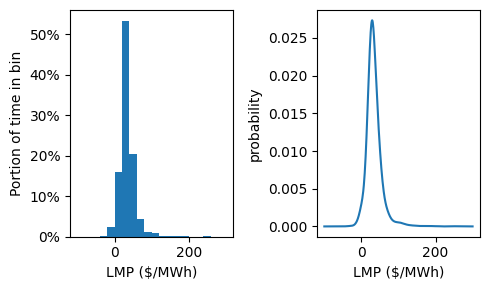

LMP Range ($/MWh) = (-43.3701, 1013.6738)
LMP Median ($/MWh) = 30.84
LMP number of data = 8760
LMP Mean ($/MWh) = 35.59
LMP Variance = 1432.48
LMP Skew = 13.818649718250933
LMP Kurtosis = 281.81010215794083
Bimodality Coefficient = 0.6739732399921239
Natural Gas Price ($/million BTU) = 3.87

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -182.13  -20.02  -37.29 -54.34
Fuel Cost (Million $/yr)       90.88  107.74  137.42    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      47.43   53.19   64.57    NaN
Hydrogen Capacity Factor (%)     1.6   23.23    29.5  22.64
Power (Million MWh/yr)           2.7    3.03    4.03  -1.42
Hydrogen (Million kg/yr)        2.52   36.63   46.52  35.69
Power only mode (%)            55.72   76.77   68.45    0.0
Hydrogen only mode (%)           0.0   23.23     0.0  31.22
Hydrogen + power mode (%)       2.12     0.0   31.55    0.0
Off mode (%)                   42.16     0.0     0.0  68.78


H2 Price ($/kg) = 1.5


model3 model4  model5  model6
Profit (Million $/yr)        -150.66   5.31    2.29  -16.43
Fuel Cost (Million $/yr)      180.21  86.66  137.84     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      27.07  12.55   27.22     NaN
Hydrogen Capacity Factor (%)   67.18   43.4   66.93   69.67
Power (Million MWh/yr)          1.54   0.71     1.7   -4.38
Hydrogen (Million kg/yr)      105.92  68.44  105.53  109.86
Power only mode (%)            29.45   56.6   32.03     0.0
Hydrogen only mode (%)           0.0   43.4     0.0   90.97
Hydrogen + power mode (%)      70.55    0.0   67.97     0.0
Off mode (%)                     0.0    0.0     0.0    9.03


H2 Price ($/kg) = 2.0


model0  model1  model3 model4  model5  model6
Profit (Million $/yr)        -124.37  -30.26  -88.69  48.05   63.81   46.79
Fuel Cost (Million $/yr)       76.45  109.28  180.36  65.81  138.05     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0     0.0     0.0
Power Capacity Factor (%)      42.37   82.87    6.01 -27.63    8.12     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   86.59  63.34   86.07   86.34
Power (Million MWh/yr)          2.41    4.72    0.34  -1.57    0.51   -5.44
Hydrogen (Million kg/yr)         0.0     0.0  136.54  99.88  135.71  136.14
Power only mode (%)            42.37   94.94   12.73  36.66    13.3     0.0
Hydrogen only mode (%)           0.0     0.0     0.0  63.34     0.0   94.34
Hydrogen + power mode (%)        0.0     0.0   87.27    0.0    86.7     0.0
Off mode (%)                   57.63    5.06     0.0    0.0     0.0    5.66


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         -17.08  103.55  135.21  118.29
Fuel Cost (Million $/yr)      180.43   51.89  138.15     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -1.59  -54.45     0.7     NaN
Hydrogen Capacity Factor (%)   93.59   76.66   93.51   93.57
Power (Million MWh/yr)         -0.09    -3.1    0.04    -5.9
Hydrogen (Million kg/yr)      147.58  120.87  147.44  147.55
Power only mode (%)             6.16   23.34    6.35     0.0
Hydrogen only mode (%)           0.0   76.66     0.0   97.32
Hydrogen + power mode (%)      93.84     0.0   93.65     0.0
Off mode (%)                     0.0     0.0     0.0    2.68


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          57.99  167.81  210.19  193.49
Fuel Cost (Million $/yr)      180.45    42.6  138.18     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -4.65  -72.36   -2.13     NaN
Hydrogen Capacity Factor (%)   96.42   85.55   96.35   96.77
Power (Million MWh/yr)         -0.26   -4.12   -0.13    -6.1
Hydrogen (Million kg/yr)      152.03  134.89  151.92  152.59
Power only mode (%)             3.44   14.45    3.53     0.0
Hydrogen only mode (%)           0.0   85.55     0.0    99.0
Hydrogen + power mode (%)      96.56     0.0   96.47     0.0
Off mode (%)                     0.0     0.0     0.0     1.0

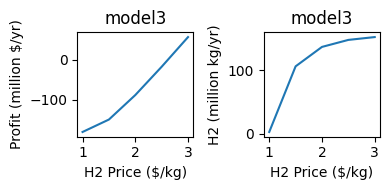

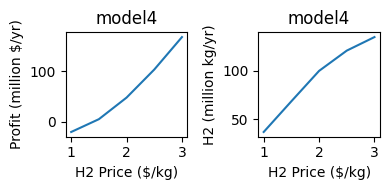

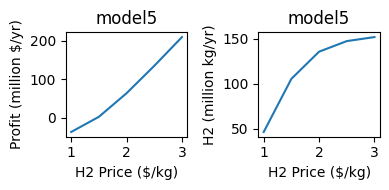

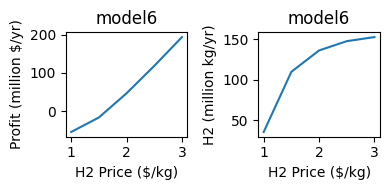

CAISO_NP15_2022


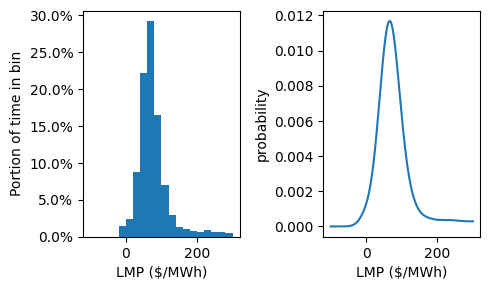

LMP Range ($/MWh) = (-16.3892, 1971.8911)
LMP Median ($/MWh) = 69.98
LMP number of data = 8760
LMP Mean ($/MWh) = 89.63
LMP Variance = 11331.61
LMP Skew = 9.240251014191262
LMP Kurtosis = 129.20363144511515
Bimodality Coefficient = 0.6533978401829227
Natural Gas Price ($/million BTU) = 7.47

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -22.82  171.47   172.3 -66.92
Fuel Cost (Million $/yr)      124.07  118.35  133.27    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      67.93   84.15   88.62    NaN
Hydrogen Capacity Factor (%)    0.04    4.52    3.14    0.7
Power (Million MWh/yr)          3.87    4.79    5.53  -0.04
Hydrogen (Million kg/yr)        0.07    7.12    4.95   1.11
Power only mode (%)            73.84   92.37   96.22    0.0
Hydrogen only mode (%)           0.0    7.63     0.0   1.05
Hydrogen + power mode (%)       0.06     0.0    3.78    0.0
Off mode (%)                   26.11     0.0     0.0  98.95


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)         -22.32  176.46  176.34 -64.03
Fuel Cost (Million $/yr)      125.21   118.5  137.15    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      67.38   78.98    85.3    NaN
Hydrogen Capacity Factor (%)    1.19    8.83    8.99   8.84
Power (Million MWh/yr)          3.84     4.5    5.32  -0.55
Hydrogen (Million kg/yr)        1.87   13.92   14.17  13.93
Power only mode (%)            72.32   89.79   87.66    0.0
Hydrogen only mode (%)           0.0   10.21     0.0  17.69
Hydrogen + power mode (%)       1.58     0.0   12.34    0.0
Off mode (%)                   26.11     0.0     0.0  82.31


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5 model6
Profit (Million $/yr)           36.6  170.81  -19.84  185.96  189.28 -51.58
Fuel Cost (Million $/yr)      120.55  120.15  135.83  115.96  140.22    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0    0.0
Power Capacity Factor (%)      66.82   91.08   66.28   69.02   73.01    NaN
Hydrogen Capacity Factor (%)     NaN     NaN    8.23   15.38    23.3  24.19
Power (Million MWh/yr)           3.8    5.19    3.77    3.93    4.55  -1.52
Hydrogen (Million kg/yr)         0.0     0.0   12.97   24.25   36.74  38.15
Power only mode (%)            66.82   100.0   65.98   84.62    75.3    0.0
Hydrogen only mode (%)           0.0     0.0     0.0   15.38     0.0  39.28
Hydrogen + power mode (%)        0.0     0.0    9.78     0.0    24.7    0.0
Off mode (%)                   33.18     0.0   24.24     0.0     0.0  60.72


H2 Price ($/kg) = 2.5


model3  model4  model5 model6
Profit (Million $/yr)           1.92  201.44  213.52 -26.92
Fuel Cost (Million $/yr)      180.19  107.18  140.33    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)       56.6   52.11   58.47    NaN
Hydrogen Capacity Factor (%)   39.98   23.77   37.87  39.19
Power (Million MWh/yr)          3.22    2.97    3.65  -2.46
Hydrogen (Million kg/yr)       63.04   37.48   59.71   61.8
Power only mode (%)            58.57   76.23   59.74    0.0
Hydrogen only mode (%)           0.0   23.77     0.0  56.06
Hydrogen + power mode (%)      41.43     0.0   40.26    0.0
Off mode (%)                     0.0     0.0     0.0  43.94


H2 Price ($/kg) = 3.0


model3  model4  model5 model6
Profit (Million $/yr)         41.22  222.98  251.93  11.79
Fuel Cost (Million $/yr)      180.2   99.79  140.53    0.0
CO2 Tax (Million $/yr)          0.0     0.0     0.0    0.0
Power Capacity Factor (%)     36.53   37.85   39.57    NaN
Hydrogen Capacity Factor (%)  58.48   30.84   56.81  57.78
Power (Million MWh/yr)         2.08    2.16    2.47  -3.64
Hydrogen (Million kg/yr)      92.22   48.64   89.57  91.11
Power only mode (%)           37.84   69.16   40.83    0.0
Hydrogen only mode (%)          0.0   30.84     0.0  72.02
Hydrogen + power mode (%)     62.16     0.0   59.17    0.0
Off mode (%)                    0.0     0.0     0.0  27.98

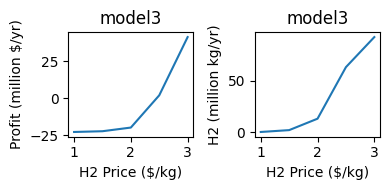

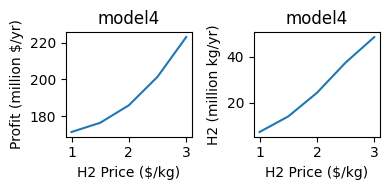

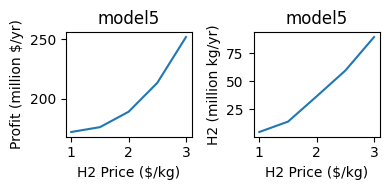

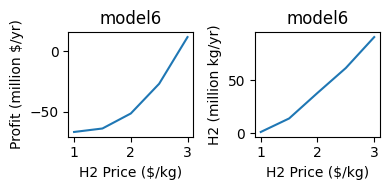

CAISO_ZP26_2019


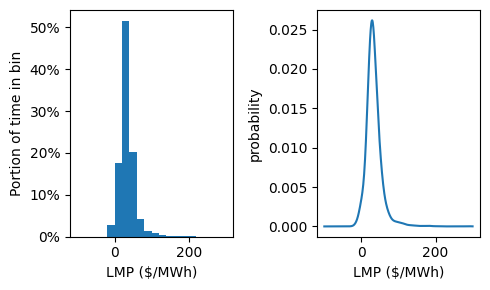

LMP Range ($/MWh) = (-40.6231, 1065.9115)
LMP Median ($/MWh) = 30.68
LMP number of data = 8760
LMP Mean ($/MWh) = 35.32
LMP Variance = 1509.69
LMP Skew = 14.040291551232137
LMP Kurtosis = 289.2081305451167
Bimodality Coefficient = 0.6780409894528333
Natural Gas Price ($/million BTU) = 3.87

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -182.25  -19.14  -36.97 -54.41
Fuel Cost (Million $/yr)       90.95  105.67  136.63    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      46.39   49.19   61.73    NaN
Hydrogen Capacity Factor (%)    2.49   25.22   31.71   22.5
Power (Million MWh/yr)          2.64     2.8    3.85  -1.41
Hydrogen (Million kg/yr)        3.93   39.76    50.0  35.47
Power only mode (%)            55.09   74.78   64.52    0.0
Hydrogen only mode (%)           0.0   25.22     0.0  31.43
Hydrogen + power mode (%)       3.31     0.0   35.48    0.0
Off mode (%)                    41.6     0.0     0.0  68.57


H2 Price ($/kg) = 1.5


model3 model4  model5  model6
Profit (Million $/yr)        -149.98   7.53    3.19  -14.76
Fuel Cost (Million $/yr)      180.21  85.49  137.04     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)       27.0   10.3   26.05     NaN
Hydrogen Capacity Factor (%)   67.24  44.52   67.47   69.48
Power (Million MWh/yr)          1.54   0.59    1.62   -4.37
Hydrogen (Million kg/yr)      106.03   70.2  106.39  109.56
Power only mode (%)            29.38  55.48   29.93     0.0
Hydrogen only mode (%)           0.0  44.52     0.0   90.98
Hydrogen + power mode (%)      70.62    0.0   70.07     0.0
Off mode (%)                     0.0    0.0     0.0    9.02


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -123.96 -31.03  -88.06   50.62   64.63   48.64
Fuel Cost (Million $/yr)        76.6  107.5  180.35   65.38  137.31     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      42.46  81.53    6.25  -28.46    7.98     NaN
Hydrogen Capacity Factor (%)     NaN    NaN   86.36   63.76   85.58   86.18
Power (Million MWh/yr)          2.42   4.64    0.36   -1.62     0.5   -5.43
Hydrogen (Million kg/yr)         0.0    0.0  136.17  100.53  134.94  135.89
Power only mode (%)            42.47  94.93   12.89   36.24   13.87     0.0
Hydrogen only mode (%)           0.0    0.0     0.0   63.76     0.0   94.87
Hydrogen + power mode (%)        0.0    0.0   87.11     0.0   86.13     0.0
Off mode (%)                   57.53   5.07     0.0     0.0     0.0    5.13


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         -16.59  106.23  135.89  120.25
Fuel Cost (Million $/yr)      180.43   51.92   137.4     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -1.56   -54.4    0.17     NaN
Hydrogen Capacity Factor (%)   93.56   76.63    93.4   93.42
Power (Million MWh/yr)         -0.09    -3.1    0.01   -5.89
Hydrogen (Million kg/yr)      147.53  120.83  147.28   147.3
Power only mode (%)             6.11   23.37     6.5     0.0
Hydrogen only mode (%)           0.0   76.63     0.0   97.32
Hydrogen + power mode (%)      93.89     0.0    93.5     0.0
Off mode (%)                     0.0     0.0     0.0    2.68


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          58.45  170.37  210.83  195.41
Fuel Cost (Million $/yr)      180.45   43.03  137.43     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -4.65  -71.54   -2.74     NaN
Hydrogen Capacity Factor (%)   96.41   85.14   96.32   96.73
Power (Million MWh/yr)         -0.26   -4.07   -0.17    -6.1
Hydrogen (Million kg/yr)      152.02  134.24  151.87  152.52
Power only mode (%)             3.42   14.86    3.57     0.0
Hydrogen only mode (%)           0.0   85.14     0.0    99.0
Hydrogen + power mode (%)      96.58     0.0   96.43     0.0
Off mode (%)                     0.0     0.0     0.0     1.0

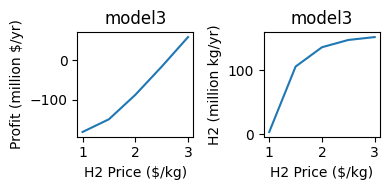

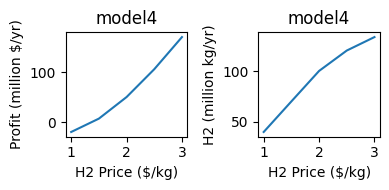

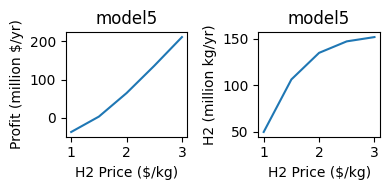

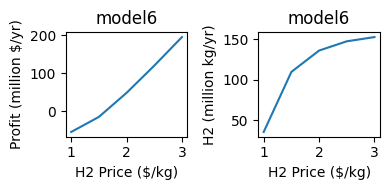

CAISO_ZP26_2022


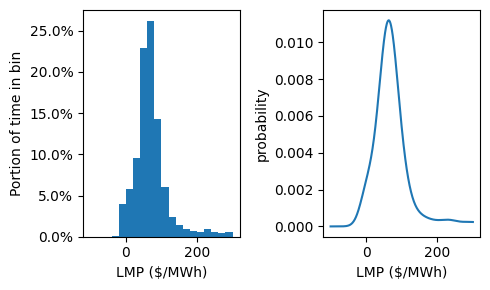

LMP Range ($/MWh) = (-35.0853, 1976.5301)
LMP Median ($/MWh) = 65.31
LMP number of data = 8760
LMP Mean ($/MWh) = 81.30
LMP Variance = 10348.89
LMP Skew = 9.084898968547215
LMP Kurtosis = 130.0615991853026
Bimodality Coefficient = 0.6277900201478326
Natural Gas Price ($/million BTU) = 7.47

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -53.29  143.02  133.86 -64.67
Fuel Cost (Million $/yr)      110.16  110.82   128.8    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      59.97   71.12   79.91    NaN
Hydrogen Capacity Factor (%)    0.03   10.51    8.03   7.41
Power (Million MWh/yr)          3.41    4.05    4.98  -0.46
Hydrogen (Million kg/yr)        0.05   16.57   12.66  11.68
Power only mode (%)            67.79   85.55   90.78    0.0
Hydrogen only mode (%)           0.0   14.45     0.0  15.13
Hydrogen + power mode (%)       0.05     0.0    9.22    0.0
Off mode (%)                   32.17     0.0     0.0  84.87


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)         -52.13  153.17  142.71 -54.87
Fuel Cost (Million $/yr)      117.37  111.12  133.83    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      60.56   65.15   75.44    NaN
Hydrogen Capacity Factor (%)    3.15   15.56   15.71  15.98
Power (Million MWh/yr)          3.45    3.71    4.71   -1.0
Hydrogen (Million kg/yr)        4.96   24.54   24.76   25.2
Power only mode (%)            67.25   82.82   81.02    0.0
Hydrogen only mode (%)           0.0   17.18     0.0   31.0
Hydrogen + power mode (%)       4.18     0.0   18.98    0.0
Off mode (%)                   28.57     0.0     0.0   69.0


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5 model6
Profit (Million $/yr)          10.37  132.76  -47.23  168.24  161.32 -35.21
Fuel Cost (Million $/yr)      106.79   113.7  134.59  108.25  137.05    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0    0.0
Power Capacity Factor (%)      59.19   86.23   59.83   54.16   63.31    NaN
Hydrogen Capacity Factor (%)     NaN     NaN   13.38   22.75   29.96  32.53
Power (Million MWh/yr)          3.37    4.91    3.41    3.08    3.95  -2.04
Hydrogen (Million kg/yr)         0.0     0.0   21.09   35.87   47.25   51.3
Power only mode (%)            59.19   100.0   60.08   77.25   68.12    0.0
Hydrogen only mode (%)           0.0     0.0     0.0   22.75     0.0  53.98
Hydrogen + power mode (%)        0.0     0.0   15.68     0.0   31.88    0.0
Off mode (%)                   40.81     0.0   24.24     0.0     0.0  46.02


H2 Price ($/kg) = 2.5


model3  model4  model5 model6
Profit (Million $/yr)         -20.34  189.49   191.3  -3.36
Fuel Cost (Million $/yr)      180.17   99.77  137.19    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      48.91   37.83   48.09    NaN
Hydrogen Capacity Factor (%)   47.05   30.86   45.22   48.4
Power (Million MWh/yr)          2.79    2.15     3.0  -3.04
Hydrogen (Million kg/yr)       74.19   48.65    71.3  76.32
Power only mode (%)            49.57   69.14    52.5    0.0
Hydrogen only mode (%)           0.0   30.86     0.0  69.68
Hydrogen + power mode (%)      50.43     0.0    47.5    0.0
Off mode (%)                     0.0     0.0     0.0  30.32


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          24.17  216.63  235.05    42.0
Fuel Cost (Million $/yr)      180.22   92.12  137.38     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      30.58   23.09   31.02     NaN
Hydrogen Capacity Factor (%)   63.95   38.17   62.32    66.8
Power (Million MWh/yr)          1.74    1.31    1.93    -4.2
Hydrogen (Million kg/yr)      100.83   60.19   98.26  105.34
Power only mode (%)            33.03   61.83   35.75     0.0
Hydrogen only mode (%)           0.0   38.17     0.0    85.3
Hydrogen + power mode (%)      66.97     0.0   64.25     0.0
Off mode (%)                     0.0     0.0     0.0    14.7

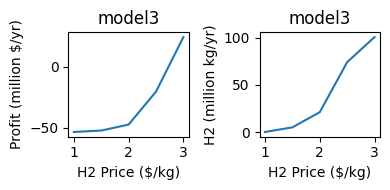

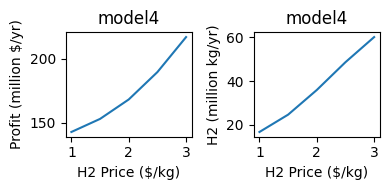

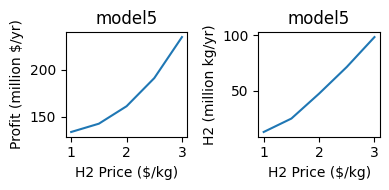

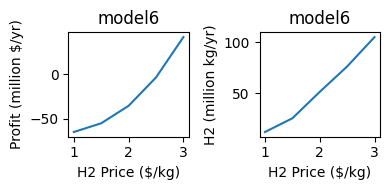

CAISO_SP15_2019


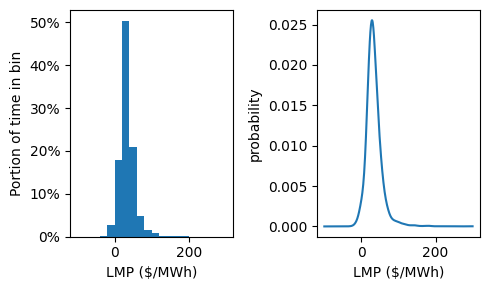

LMP Range ($/MWh) = (-36.4988, 980.3147)
LMP Median ($/MWh) = 30.81
LMP number of data = 8760
LMP Mean ($/MWh) = 35.76
LMP Variance = 1548.56
LMP Skew = 13.052360947877611
LMP Kurtosis = 246.77741160297887
Bimodality Coefficient = 0.6860645247494984
Natural Gas Price ($/million BTU) = 3.87

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -180.04  -16.97  -34.44 -54.84
Fuel Cost (Million $/yr)       96.88  105.55  136.69    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      49.23   48.96   61.46    NaN
Hydrogen Capacity Factor (%)    2.71   25.33   32.03  24.49
Power (Million MWh/yr)           2.8    2.79    3.83  -1.54
Hydrogen (Million kg/yr)        4.27   39.94   50.51  38.62
Power only mode (%)            59.44   74.67   64.86    0.0
Hydrogen only mode (%)           0.0   25.33     0.0  35.88
Hydrogen + power mode (%)        3.6     0.0   35.14    0.0
Off mode (%)                   36.96     0.0     0.0  64.12


H2 Price ($/kg) = 1.5


model3 model4  model5  model6
Profit (Million $/yr)        -148.01   9.73    5.36  -16.11
Fuel Cost (Million $/yr)      180.21   86.0  137.05     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      27.95  11.29   27.21     NaN
Hydrogen Capacity Factor (%)   66.36  44.03   66.36   69.42
Power (Million MWh/yr)          1.59   0.64     1.7   -4.37
Hydrogen (Million kg/yr)      104.63  69.43  104.63  109.46
Power only mode (%)            30.38  55.97   30.97     0.0
Hydrogen only mode (%)           0.0  44.03     0.0   93.54
Hydrogen + power mode (%)      69.62    0.0   69.03     0.0
Off mode (%)                     0.0    0.0     0.0    6.46


H2 Price ($/kg) = 2.0


model0  model1  model3 model4  model5  model6
Profit (Million $/yr)        -121.72  -28.69  -86.92  52.33   65.96   46.79
Fuel Cost (Million $/yr)       77.85  107.12  180.34   66.3  137.32     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0     0.0     0.0
Power Capacity Factor (%)      43.15   81.25    7.22 -26.69    8.78     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   85.47  62.88   84.83   85.46
Power (Million MWh/yr)          2.46    4.63    0.41  -1.52    0.55   -5.38
Hydrogen (Million kg/yr)         0.0     0.0  134.77  99.14  133.76  134.75
Power only mode (%)            43.15   94.93    13.3  37.12    14.6     0.0
Hydrogen only mode (%)           0.0     0.0     0.0  62.88     0.0   95.23
Hydrogen + power mode (%)        0.0     0.0    86.7    0.0    85.4     0.0
Off mode (%)                   56.85    5.07     0.0    0.0     0.0    4.77


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          -15.9  107.12  136.75  118.05
Fuel Cost (Million $/yr)      180.42   53.09  137.41     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -1.16  -52.15     0.5     NaN
Hydrogen Capacity Factor (%)   93.19   75.51   93.13   93.19
Power (Million MWh/yr)         -0.07   -2.97    0.03   -5.87
Hydrogen (Million kg/yr)      146.94  119.07  146.84  146.94
Power only mode (%)             6.24   24.49    6.44     0.0
Hydrogen only mode (%)           0.0   75.51     0.0   97.72
Hydrogen + power mode (%)      93.76     0.0   93.56     0.0
Off mode (%)                     0.0     0.0     0.0    2.28


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          59.03  170.43  211.58  193.21
Fuel Cost (Million $/yr)      180.45   43.91  137.46     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -4.53  -69.83   -2.66     NaN
Hydrogen Capacity Factor (%)    96.3   84.29   96.29   96.66
Power (Million MWh/yr)         -0.26   -3.98   -0.17   -6.09
Hydrogen (Million kg/yr)      151.84  132.91  151.83  152.41
Power only mode (%)             3.49   15.71    3.58     0.0
Hydrogen only mode (%)           0.0   84.29     0.0    99.0
Hydrogen + power mode (%)      96.51     0.0   96.42     0.0
Off mode (%)                     0.0     0.0     0.0     1.0

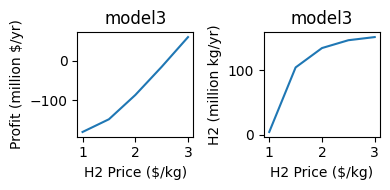

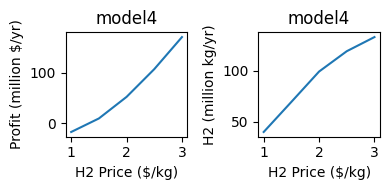

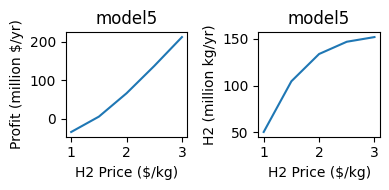

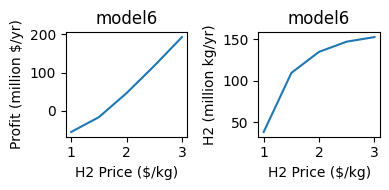

CAISO_SP15_2022


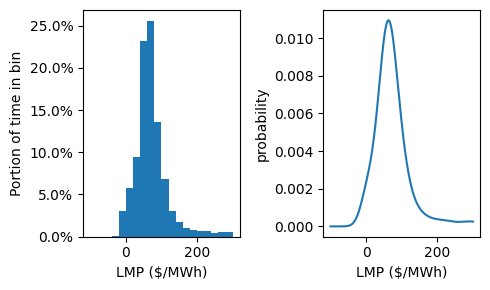

LMP Range ($/MWh) = (-27.4744, 1994.734)
LMP Median ($/MWh) = 65.97
LMP number of data = 8760
LMP Mean ($/MWh) = 84.30
LMP Variance = 10969.07
LMP Skew = 8.682930521490908
LMP Kurtosis = 119.64114018743003
Bimodality Coefficient = 0.6228957274803517
Natural Gas Price ($/million BTU) = 7.47

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -39.45  155.76  149.35 -65.68
Fuel Cost (Million $/yr)      114.73  112.04  129.52    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)       62.5   73.26   81.41    NaN
Hydrogen Capacity Factor (%)    0.02    9.51    7.19   6.51
Power (Million MWh/yr)          3.56    4.17    5.08  -0.41
Hydrogen (Million kg/yr)        0.03    15.0   11.34  10.27
Power only mode (%)            70.54   86.63    91.6    0.0
Hydrogen only mode (%)           0.0   13.37     0.0  13.76
Hydrogen + power mode (%)       0.02     0.0     8.4    0.0
Off mode (%)                   29.44     0.0     0.0  86.24


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)         -38.56  165.09  157.42 -56.82
Fuel Cost (Million $/yr)      119.05  112.32  134.43    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      62.19    67.3   77.05    NaN
Hydrogen Capacity Factor (%)    2.53   14.55   14.69  14.54
Power (Million MWh/yr)          3.54    3.83    4.81  -0.91
Hydrogen (Million kg/yr)        3.99   22.94   23.16  22.92
Power only mode (%)            68.89   83.86   81.94    0.0
Hydrogen only mode (%)           0.0   16.14     0.0  27.53
Hydrogen + power mode (%)       3.36     0.0   18.06    0.0
Off mode (%)                   27.75     0.0     0.0  72.47


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5 model6
Profit (Million $/yr)          23.55  147.88  -34.03  179.24   175.1 -38.35
Fuel Cost (Million $/yr)      108.23  114.76  137.52  109.45  137.54    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0    0.0
Power Capacity Factor (%)      59.99   87.03   61.16   56.48   64.74    NaN
Hydrogen Capacity Factor (%)     NaN     NaN   13.68    21.6   29.08  30.55
Power (Million MWh/yr)          3.42    4.96    3.48    3.22    4.04  -1.92
Hydrogen (Million kg/yr)         0.0     0.0   21.56   34.06   45.85  48.18
Power only mode (%)            59.99   100.0   61.14    78.4   68.22    0.0
Hydrogen only mode (%)           0.0     0.0     0.0    21.6     0.0  50.31
Hydrogen + power mode (%)        0.0     0.0   16.16     0.0   31.78    0.0
Off mode (%)                   40.01     0.0   22.69     0.0     0.0  49.69


H2 Price ($/kg) = 2.5


model3  model4  model5 model6
Profit (Million $/yr)          -7.79  199.52  204.45   -7.8
Fuel Cost (Million $/yr)      180.18  100.89  137.66    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      50.09   39.99   49.06    NaN
Hydrogen Capacity Factor (%)   45.97   29.78   44.78  48.01
Power (Million MWh/yr)          2.85    2.28    3.06  -3.02
Hydrogen (Million kg/yr)       72.48   46.96   70.62   75.7
Power only mode (%)            51.55   70.22   51.43    0.0
Hydrogen only mode (%)           0.0   29.78     0.0  69.76
Hydrogen + power mode (%)      48.45     0.0   48.57    0.0
Off mode (%)                     0.0     0.0     0.0  30.24


H2 Price ($/kg) = 3.0


model3  model4  model5 model6
Profit (Million $/yr)          35.75  225.92  247.19  36.05
Fuel Cost (Million $/yr)      180.23   92.84  137.91    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      32.09   24.47   32.59    NaN
Hydrogen Capacity Factor (%)   62.56   37.49   61.29  62.33
Power (Million MWh/yr)          1.83    1.39    2.03  -3.92
Hydrogen (Million kg/yr)       98.65   59.11   96.65  98.28
Power only mode (%)            34.49   62.51   37.09    0.0
Hydrogen only mode (%)           0.0   37.49     0.0  77.18
Hydrogen + power mode (%)      65.51     0.0   62.91    0.0
Off mode (%)                     0.0     0.0     0.0  22.82

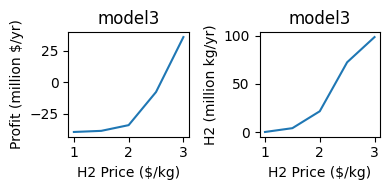

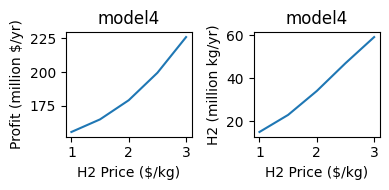

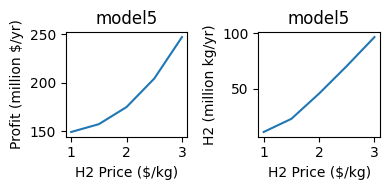

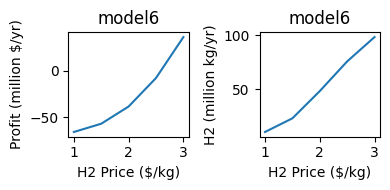

ERCOT_NORTH_2019


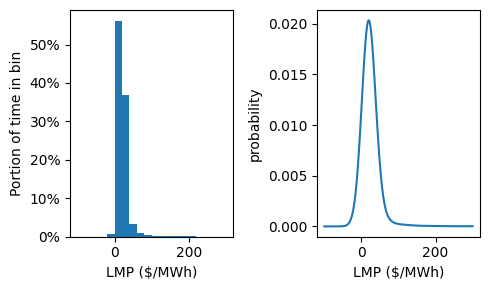

LMP Range ($/MWh) = (-10.4186, 4696.8861)
LMP Median ($/MWh) = 19.12
LMP number of data = 8760
LMP Mean ($/MWh) = 27.53
LMP Variance = 11427.40
LMP Skew = 32.00297149848155
LMP Kurtosis = 1178.9814980645724
Bimodality Coefficient = 0.8673480041448545
Natural Gas Price ($/million BTU) = 2.39

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -156.61 -22.32  -22.14   -38.1
Fuel Cost (Million $/yr)      180.27  80.89  141.71     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      17.12   1.44   21.47     NaN
Hydrogen Capacity Factor (%)   76.37  48.92   75.89   75.45
Power (Million MWh/yr)          0.97   0.08    1.34   -4.75
Hydrogen (Million kg/yr)      120.42  77.13  119.66  118.97
Power only mode (%)            20.95  51.08   22.74     0.0
Hydrogen only mode (%)           0.0  48.92     0.0   94.82
Hydrogen + power mode (%)      79.05    0.0   77.26     0.0
Off mode (%)                     0.0    0.0     0.0    5.18


H2 Price ($/kg) = 1.5


model3 model4  model5  model6
Profit (Million $/yr)         -87.94  30.75   46.29   31.83
Fuel Cost (Million $/yr)      180.45  49.95  141.92     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      -0.65  -58.2    4.74     NaN
Hydrogen Capacity Factor (%)   92.75  78.52   92.65   92.65
Power (Million MWh/yr)         -0.04  -3.31     0.3   -5.84
Hydrogen (Million kg/yr)      146.24  123.8   146.1  146.09
Power only mode (%)              6.8  21.48    7.05     0.0
Hydrogen only mode (%)           0.0  78.52     0.0   98.69
Hydrogen + power mode (%)       93.2    0.0   92.95     0.0
Off mode (%)                     0.0    0.0     0.0    1.31


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -122.15  -37.58  -13.32   97.65  120.85  106.47
Fuel Cost (Million $/yr)       53.91  121.94  180.48    38.6  141.96     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      29.88   92.43   -4.08  -80.07    1.56     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   95.91   89.37   95.84   95.57
Power (Million MWh/yr)           1.7    5.26   -0.23   -4.56     0.1   -6.03
Hydrogen (Million kg/yr)         0.0     0.0  151.23  140.92  151.12  150.69
Power only mode (%)             29.9   100.0     3.9   10.63    4.09     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   89.37     0.0    98.7
Hydrogen + power mode (%)        0.0     0.0    96.1     0.0   95.91     0.0
Off mode (%)                    70.1     0.0     0.0     0.0     0.0     1.3


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          62.86  169.97   197.0  182.52
Fuel Cost (Million $/yr)      180.49   34.34  141.98     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -5.33  -88.28    0.35     NaN
Hydrogen Capacity Factor (%)   97.07   93.45   97.06   97.14
Power (Million MWh/yr)          -0.3   -5.03    0.02   -6.12
Hydrogen (Million kg/yr)      153.05  147.35  153.05  153.17
Power only mode (%)             2.88    6.55    2.91     0.0
Hydrogen only mode (%)           0.0   93.45     0.0   99.39
Hydrogen + power mode (%)      97.12     0.0   97.09     0.0
Off mode (%)                     0.0     0.0     0.0    0.61


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         139.68  244.43  273.79  259.32
Fuel Cost (Million $/yr)      180.49   32.39  141.99     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.09  -92.03   -0.35     NaN
Hydrogen Capacity Factor (%)   97.77   95.31   97.76   97.69
Power (Million MWh/yr)         -0.35   -5.24   -0.02   -6.16
Hydrogen (Million kg/yr)      154.16  150.28  154.15  154.04
Power only mode (%)             2.18    4.69    2.21     0.0
Hydrogen only mode (%)           0.0   95.31     0.0   99.39
Hydrogen + power mode (%)      97.82     0.0   97.79     0.0
Off mode (%)                     0.0     0.0     0.0    0.61

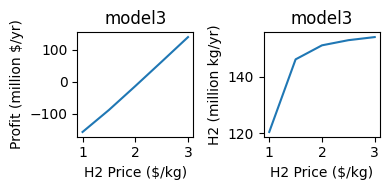

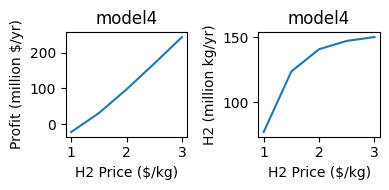

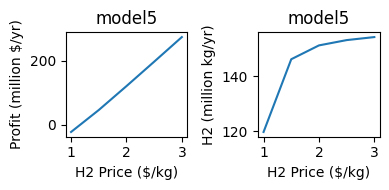

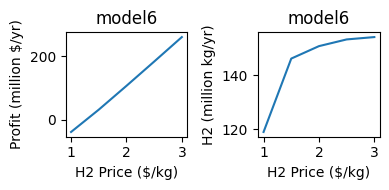

ERCOT_NORTH_2022


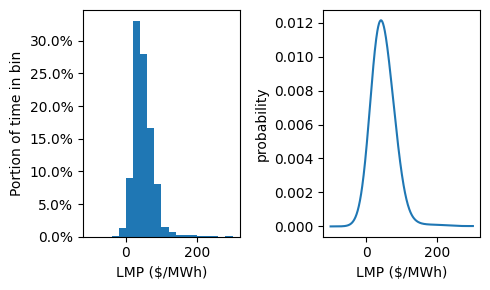

LMP Range ($/MWh) = (-464.7304, 5073.4436)
LMP Median ($/MWh) = 44.23
LMP number of data = 8760
LMP Mean ($/MWh) = 55.06
LMP Variance = 17133.64
LMP Skew = 25.91013507031294
LMP Kurtosis = 820.095329362003
Bimodality Coefficient = 0.8168364414703031
Natural Gas Price ($/million BTU) = 7.05

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -154.63   9.13  -12.23 -62.25
Fuel Cost (Million $/yr)       66.31  87.09  100.82    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      35.76  49.21   64.01    NaN
Hydrogen Capacity Factor (%)    0.01  13.76     5.3  13.32
Power (Million MWh/yr)          2.04    2.8    3.99  -0.84
Hydrogen (Million kg/yr)        0.01  21.69    8.35  21.01
Power only mode (%)            43.07  71.71   81.94    0.0
Hydrogen only mode (%)           0.0  28.29     0.0  22.77
Hydrogen + power mode (%)       0.01    0.0    8.07    0.0
Off mode (%)                   56.92    0.0    9.99  77.23


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -154.42  27.57    2.75 -40.33
Fuel Cost (Million $/yr)       67.81  89.22  126.59    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      35.76  26.87    49.7    NaN
Hydrogen Capacity Factor (%)    0.77  33.32   36.33  36.88
Power (Million MWh/yr)          2.04   1.53     3.1  -2.32
Hydrogen (Million kg/yr)        1.22  52.53   57.29  58.15
Power only mode (%)            42.76  63.61   61.72    0.0
Hydrogen only mode (%)           0.0  36.39     0.0  50.71
Hydrogen + power mode (%)       1.03    0.0   38.28    0.0
Off mode (%)                   56.21    0.0     0.0  49.29


H2 Price ($/kg) = 2.0


model0 model1  model3 model4  model5 model6
Profit (Million $/yr)        -91.38   3.22 -149.75  60.12   41.76  -2.51
Fuel Cost (Million $/yr)      58.45  85.57  100.47  82.72  130.69    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0     0.0    0.0
Power Capacity Factor (%)      32.4  64.95   34.35   4.96   30.96    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   19.72  47.17   57.82  55.46
Power (Million MWh/yr)         1.84    3.7    1.96   0.28    1.93  -3.49
Hydrogen (Million kg/yr)        0.0    0.0   31.09  74.38   91.16  87.45
Power only mode (%)            32.4  81.46   32.99  52.83   40.23    0.0
Hydrogen only mode (%)          0.0    0.0     0.0  47.17     0.0  69.01
Hydrogen + power mode (%)       0.0    0.0   22.81    0.0   59.77    0.0
Off mode (%)                   67.6  18.54    44.2    0.0     0.0  30.99


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         -99.29  101.34   94.69   50.37
Fuel Cost (Million $/yr)      180.22   72.17  130.89     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      19.43  -15.37   15.46     NaN
Hydrogen Capacity Factor (%)   74.17   57.26   73.34   74.05
Power (Million MWh/yr)          1.11   -0.88    0.96   -4.66
Hydrogen (Million kg/yr)      116.95   90.29  115.65  116.77
Power only mode (%)            24.21   42.74   25.72     0.0
Hydrogen only mode (%)           0.0   57.26     0.0   87.57
Hydrogen + power mode (%)      75.79     0.0   74.28     0.0
Off mode (%)                     0.0     0.0     0.0   12.43


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         -36.48  150.61  157.01  113.37
Fuel Cost (Million $/yr)      180.25   61.84  130.99     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       7.83  -35.29    4.95     NaN
Hydrogen Capacity Factor (%)   84.86   67.15   83.88   85.78
Power (Million MWh/yr)          0.45   -2.01    0.31    -5.4
Hydrogen (Million kg/yr)      133.81  105.88  132.26  135.26
Power only mode (%)             12.9   32.85   14.85     0.0
Hydrogen only mode (%)           0.0   67.15     0.0   97.52
Hydrogen + power mode (%)       87.1     0.0   85.15     0.0
Off mode (%)                     0.0     0.0     0.0    2.48

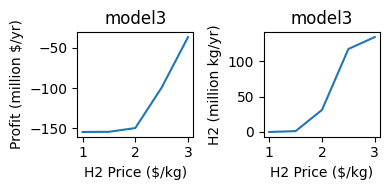

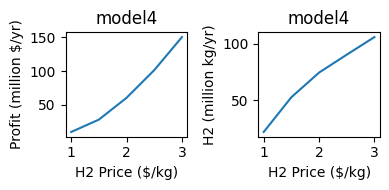

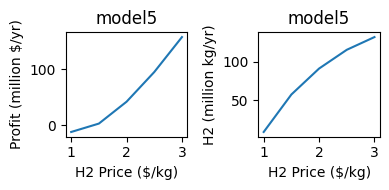

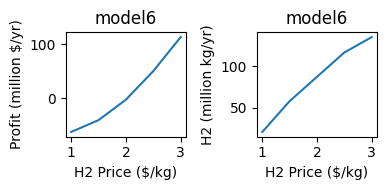

ERCOT_SOUTH_2019


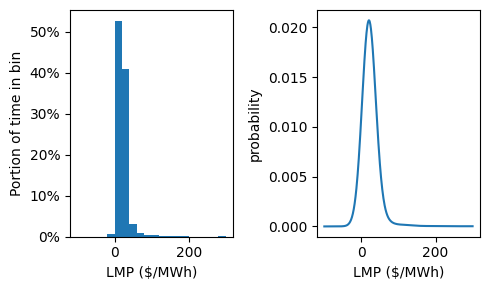

LMP Range ($/MWh) = (-50.289, 4694.8095)
LMP Median ($/MWh) = 19.59
LMP number of data = 8760
LMP Mean ($/MWh) = 27.57
LMP Variance = 11182.41
LMP Skew = 32.53686736403417
LMP Kurtosis = 1211.538185372403
Bimodality Coefficient = 0.872468938328551
Natural Gas Price ($/million BTU) = 2.39

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -159.16 -25.58  -24.75  -40.49
Fuel Cost (Million $/yr)      180.25   85.3  142.54     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      17.98   9.93   22.64     NaN
Hydrogen Capacity Factor (%)   75.58   44.7   75.31   75.82
Power (Million MWh/yr)          1.02   0.57    1.41   -4.77
Hydrogen (Million kg/yr)      119.18  70.49  118.75  119.55
Power only mode (%)            21.28   55.3   23.33     0.0
Hydrogen only mode (%)           0.0   44.7     0.0   97.58
Hydrogen + power mode (%)      78.72    0.0   76.67     0.0
Off mode (%)                     0.0    0.0     0.0    2.42


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)         -90.28   25.78    43.9   29.63
Fuel Cost (Million $/yr)      180.47   50.33  142.77     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -1.11  -57.46    4.94     NaN
Hydrogen Capacity Factor (%)   93.19   78.15   93.05   93.04
Power (Million MWh/yr)         -0.06   -3.27    0.31   -5.86
Hydrogen (Million kg/yr)      146.94  123.23  146.72  146.71
Power only mode (%)             6.34   21.85    6.71     0.0
Hydrogen only mode (%)           0.0   78.15     0.0   98.69
Hydrogen + power mode (%)      93.66     0.0   93.29     0.0
Off mode (%)                     0.0     0.0     0.0    1.31


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -124.39  -37.61  -15.28   92.84  118.83  104.56
Fuel Cost (Million $/yr)       57.35  124.57   180.5   38.05  142.81     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      31.78    94.4    -4.5  -81.13    1.74     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   96.31    89.9   96.26    95.9
Power (Million MWh/yr)          1.81    5.38   -0.26   -4.62    0.11   -6.05
Hydrogen (Million kg/yr)         0.0     0.0  151.86  141.75  151.78  151.22
Power only mode (%)            31.83   100.0    3.57    10.1    3.64     0.0
Hydrogen only mode (%)           0.0     0.0     0.0    89.9     0.0    98.7
Hydrogen + power mode (%)        0.0     0.0   96.43     0.0   96.36     0.0
Off mode (%)                   68.17     0.0     0.0     0.0     0.0     1.3


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          61.12  165.56   195.2  180.83
Fuel Cost (Million $/yr)       180.5   33.83  142.82     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -5.65  -89.27    0.65     NaN
Hydrogen Capacity Factor (%)   97.37   93.94   97.35   97.35
Power (Million MWh/yr)         -0.32   -5.08    0.04   -6.14
Hydrogen (Million kg/yr)      153.53  148.12   153.5   153.5
Power only mode (%)             2.58    6.06    2.61     0.0
Hydrogen only mode (%)           0.0   93.94     0.0   99.39
Hydrogen + power mode (%)      97.42     0.0   97.39     0.0
Off mode (%)                     0.0     0.0     0.0    0.61


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         138.18   240.4  272.24  257.82
Fuel Cost (Million $/yr)      180.51   31.93  142.83     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.38  -92.93   -0.03     NaN
Hydrogen Capacity Factor (%)   98.04   95.75   98.03   97.92
Power (Million MWh/yr)         -0.36   -5.29    -0.0   -6.17
Hydrogen (Million kg/yr)      154.59  150.98  154.57  154.39
Power only mode (%)             1.93    4.25    1.93     0.0
Hydrogen only mode (%)           0.0   95.75     0.0   99.39
Hydrogen + power mode (%)      98.07     0.0   98.07     0.0
Off mode (%)                     0.0     0.0     0.0    0.61

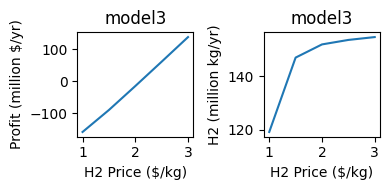

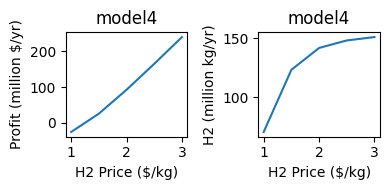

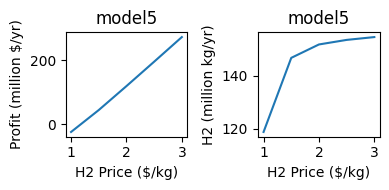

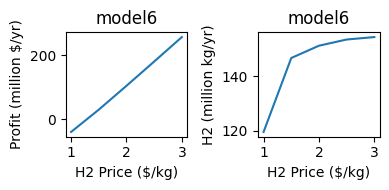

ERCOT_SOUTH_2022


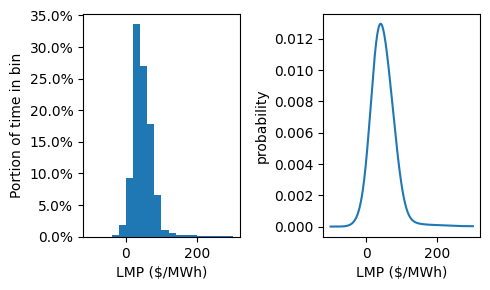

LMP Range ($/MWh) = (-31.1793, 4680.6634)
LMP Median ($/MWh) = 43.38
LMP number of data = 8760
LMP Mean ($/MWh) = 53.51
LMP Variance = 13012.28
LMP Skew = 25.24059983939374
LMP Kurtosis = 817.6628053947794
Bimodality Coefficient = 0.7775265028768712
Natural Gas Price ($/million BTU) = 7.05

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -159.31   3.32  -19.52 -60.72
Fuel Cost (Million $/yr)       64.26  86.16  102.28    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      34.68  47.59   62.75    NaN
Hydrogen Capacity Factor (%)    0.03  14.52    7.25  14.99
Power (Million MWh/yr)          1.97   2.71    3.91  -0.94
Hydrogen (Million kg/yr)        0.04  22.89   11.43  23.64
Power only mode (%)            41.47  71.76   82.84    0.0
Hydrogen only mode (%)           0.0  28.24     0.0  26.23
Hydrogen + power mode (%)       0.03    0.0   10.25    0.0
Off mode (%)                   58.49    0.0    6.91  73.77


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -159.09  22.12   -4.11 -38.07
Fuel Cost (Million $/yr)       65.75  87.89  127.91    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      34.65  24.79   47.08    NaN
Hydrogen Capacity Factor (%)    0.81  34.19    39.7  38.11
Power (Million MWh/yr)          1.97   1.41    2.94   -2.4
Hydrogen (Million kg/yr)        1.27  53.92    62.6  60.09
Power only mode (%)            41.11  62.55   58.52    0.0
Hydrogen only mode (%)           0.0  37.45     0.0  50.74
Hydrogen + power mode (%)       1.07    0.0   41.48    0.0
Off mode (%)                   57.82    0.0     0.0  49.26


H2 Price ($/kg) = 2.0


model0 model1  model3 model4 model5 model6
Profit (Million $/yr)        -97.15  -3.89 -155.01  55.68  35.87   0.44
Fuel Cost (Million $/yr)      57.17  81.02   89.22  80.97  130.3    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0    0.0    0.0
Power Capacity Factor (%)     31.69  61.49    32.5   1.58  29.36    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   15.68  48.85  58.99  57.67
Power (Million MWh/yr)          1.8    3.5    1.85   0.09   1.83  -3.63
Hydrogen (Million kg/yr)        0.0    0.0   24.72  77.02  93.02  90.94
Power only mode (%)           31.69  75.75   31.26  51.15  39.17    0.0
Hydrogen only mode (%)          0.0    0.0     0.0  48.85    0.0  71.69
Hydrogen + power mode (%)       0.0    0.0   18.31    0.0  60.83    0.0
Off mode (%)                  68.31  24.25   50.43    0.0    0.0  28.31


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)        -104.51  97.99   89.38   53.42
Fuel Cost (Million $/yr)      180.21  71.01  130.48     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      18.25  -17.6   14.51     NaN
Hydrogen Capacity Factor (%)   75.26  58.37   73.88   74.55
Power (Million MWh/yr)          1.04   -1.0     0.9   -4.69
Hydrogen (Million kg/yr)      118.66  92.03  116.49  117.55
Power only mode (%)            23.38  41.63   24.84     0.0
Hydrogen only mode (%)           0.0  58.37     0.0   88.14
Hydrogen + power mode (%)      76.62    0.0   75.16     0.0
Off mode (%)                     0.0    0.0     0.0   11.86


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         -40.46   147.9   152.9  117.36
Fuel Cost (Million $/yr)      180.25   61.12  130.59     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       5.55  -36.67    2.87     NaN
Hydrogen Capacity Factor (%)   86.96   67.83   85.53   87.25
Power (Million MWh/yr)          0.32   -2.09    0.18    -5.5
Hydrogen (Million kg/yr)      137.13  106.96  134.87  137.57
Power only mode (%)            11.58   32.17   13.15     0.0
Hydrogen only mode (%)           0.0   67.83     0.0   97.52
Hydrogen + power mode (%)      88.42     0.0   86.85     0.0
Off mode (%)                     0.0     0.0     0.0    2.48

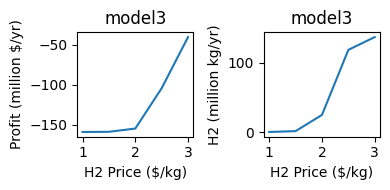

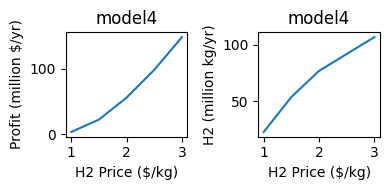

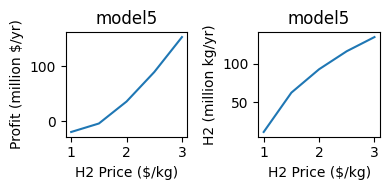

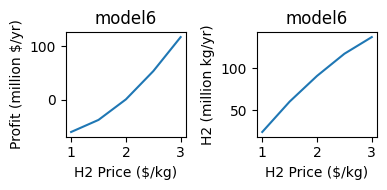

ERCOT_WEST_2019


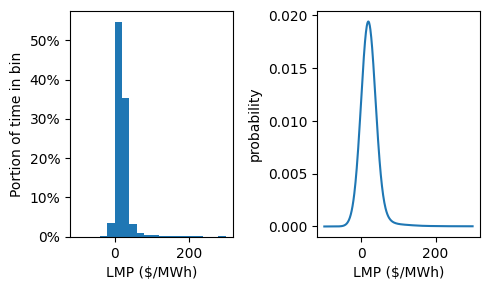

LMP Range ($/MWh) = (-24.6412, 4697.196)
LMP Median ($/MWh) = 18.79
LMP number of data = 8760
LMP Mean ($/MWh) = 26.20
LMP Variance = 11575.70
LMP Skew = 31.67206637007251
LMP Kurtosis = 1161.3094741624016
Bimodality Coefficient = 0.8624158130223191
Natural Gas Price ($/million BTU) = 2.39

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -155.03 -13.31   -19.2 -28.94
Fuel Cost (Million $/yr)      180.25  78.38  137.42    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      17.26  -3.41   17.67    NaN
Hydrogen Capacity Factor (%)   76.21  51.32   75.79   75.6
Power (Million MWh/yr)          0.98  -0.19     1.1  -4.76
Hydrogen (Million kg/yr)      120.17  80.93   119.5  119.2
Power only mode (%)            21.24  48.68   23.44    0.0
Hydrogen only mode (%)           0.0  51.32     0.0  95.06
Hydrogen + power mode (%)      78.76    0.0   76.56    0.0
Off mode (%)                     0.0    0.0     0.0   4.94


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)         -86.57   40.13   49.03   40.79
Fuel Cost (Million $/yr)      180.42   50.18  137.62     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -0.53  -57.76    0.99     NaN
Hydrogen Capacity Factor (%)   92.61    78.3   92.51    92.5
Power (Million MWh/yr)         -0.03   -3.29    0.06   -5.83
Hydrogen (Million kg/yr)      146.02  123.46  145.86  145.86
Power only mode (%)             7.05    21.7    7.28     0.0
Hydrogen only mode (%)           0.0    78.3     0.0   98.69
Hydrogen + power mode (%)      92.95     0.0   92.72     0.0
Off mode (%)                     0.0     0.0     0.0    1.31


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -121.29 -41.01  -11.98  106.77  123.55  115.41
Fuel Cost (Million $/yr)       53.47  112.6  180.45   38.96  137.66     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      29.63  85.41   -3.99  -79.38   -2.25     NaN
Hydrogen Capacity Factor (%)     NaN    NaN    95.8   89.03   95.75   95.53
Power (Million MWh/yr)          1.69   4.86   -0.23   -4.52   -0.14   -6.02
Hydrogen (Million kg/yr)         0.0    0.0  151.06  140.38  150.98  150.63
Power only mode (%)            29.67  100.0    4.04   10.97     4.2     0.0
Hydrogen only mode (%)           0.0    0.0     0.0   89.03     0.0    98.7
Hydrogen + power mode (%)        0.0    0.0   95.96     0.0    95.8     0.0
Off mode (%)                   70.33    0.0     0.0     0.0     0.0     1.3


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          64.14  178.98  199.64  191.43
Fuel Cost (Million $/yr)      180.46   34.38  137.67     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -5.31  -88.21    -3.5     NaN
Hydrogen Capacity Factor (%)   97.02   93.41    97.0   97.08
Power (Million MWh/yr)          -0.3   -5.02   -0.22   -6.12
Hydrogen (Million kg/yr)      152.98  147.29  152.95  153.07
Power only mode (%)             2.92    6.59    2.96     0.0
Hydrogen only mode (%)           0.0   93.41     0.0   99.39
Hydrogen + power mode (%)      97.08     0.0   97.04     0.0
Off mode (%)                     0.0     0.0     0.0    0.61


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         140.94  253.41  276.41  268.21
Fuel Cost (Million $/yr)      180.46    32.5  137.68     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.11  -91.82   -4.23     NaN
Hydrogen Capacity Factor (%)   97.75   95.21   97.73   97.66
Power (Million MWh/yr)         -0.35   -5.23   -0.26   -6.16
Hydrogen (Million kg/yr)      154.14  150.12  154.11  153.98
Power only mode (%)             2.17    4.79     2.2     0.0
Hydrogen only mode (%)           0.0   95.21     0.0   99.39
Hydrogen + power mode (%)      97.83     0.0    97.8     0.0
Off mode (%)                     0.0     0.0     0.0    0.61

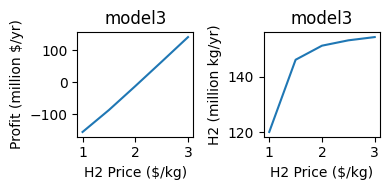

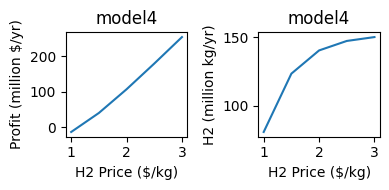

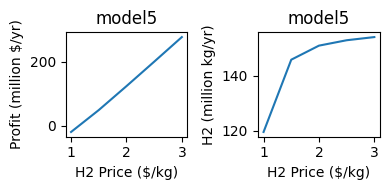

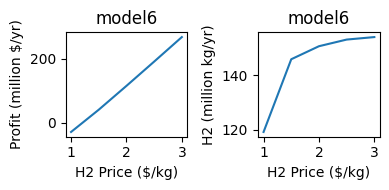

ERCOT_WEST_2022


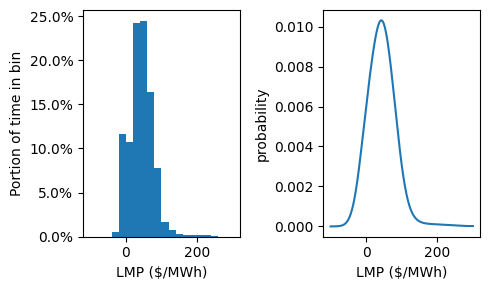

LMP Range ($/MWh) = (-47.6123, 5143.3014)
LMP Median ($/MWh) = 42.13
LMP number of data = 8760
LMP Mean ($/MWh) = 50.38
LMP Variance = 17472.47
LMP Skew = 25.506724529281396
LMP Kurtosis = 808.0041247901077
Bimodality Coefficient = 0.8034387872148725
Natural Gas Price ($/million BTU) = 7.05

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -156.96  26.55  -10.63 -43.48
Fuel Cost (Million $/yr)       62.72  84.03  110.24    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      33.72  33.04   52.44    NaN
Hydrogen Capacity Factor (%)    0.01  25.07   20.76  27.66
Power (Million MWh/yr)          1.92   1.88    3.27  -1.74
Hydrogen (Million kg/yr)        0.01  39.53   32.73  43.61
Power only mode (%)            41.47  65.42   76.13    0.0
Hydrogen only mode (%)           0.0  34.58     0.0  43.34
Hydrogen + power mode (%)       0.01    0.0   22.98    0.0
Off mode (%)                   58.52    0.0    0.89  56.66


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -156.3  51.23   12.03 -14.57
Fuel Cost (Million $/yr)      69.04  85.13  125.37    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0
Power Capacity Factor (%)     34.44  17.32   40.51    NaN
Hydrogen Capacity Factor (%)   2.47  38.59   42.54  42.42
Power (Million MWh/yr)         1.96   0.99    2.53  -2.67
Hydrogen (Million kg/yr)       3.89  60.84   67.07  66.88
Power only mode (%)           41.95  58.89   55.86    0.0
Hydrogen only mode (%)          0.0  41.11     0.0   57.6
Hydrogen + power mode (%)      3.28    0.0   44.14    0.0
Off mode (%)                  54.77    0.0     0.0   42.4


H2 Price ($/kg) = 2.0


model0 model1  model3 model4  model5 model6
Profit (Million $/yr)        -90.42   -2.5  -148.3  86.86    53.0  26.82
Fuel Cost (Million $/yr)      57.63  78.23  137.03  79.49  127.48    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0     0.0    0.0
Power Capacity Factor (%)     31.94  59.38   35.05  -1.27    25.3    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   37.61  50.26   59.13  61.39
Power (Million MWh/yr)         1.82   3.38     2.0  -0.07    1.58  -3.86
Hydrogen (Million kg/yr)        0.0    0.0   59.31  79.25   93.24   96.8
Power only mode (%)           31.94  73.97   35.14  49.74   39.37    0.0
Hydrogen only mode (%)          0.0    0.0     0.0  50.26     0.0  81.29
Hydrogen + power mode (%)       0.0    0.0   41.52    0.0   60.63    0.0
Off mode (%)                  68.06  26.03   23.34    0.0     0.0  18.71


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         -95.71  129.74   106.4   80.82
Fuel Cost (Million $/yr)      180.21   70.62  127.64     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       19.0  -18.36   10.89     NaN
Hydrogen Capacity Factor (%)   74.56   58.74   73.57   74.66
Power (Million MWh/yr)          1.08   -1.05    0.68    -4.7
Hydrogen (Million kg/yr)      117.56   92.63  116.01  117.72
Power only mode (%)            24.11   41.26   25.32     0.0
Hydrogen only mode (%)           0.0   58.74     0.0   88.21
Hydrogen + power mode (%)      75.89     0.0   74.68     0.0
Off mode (%)                     0.0     0.0     0.0   11.79


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         -32.85  179.71  168.77  143.89
Fuel Cost (Million $/yr)      180.24   61.33  127.74     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)        8.0  -36.25    0.88     NaN
Hydrogen Capacity Factor (%)    84.7   67.63    83.6    85.7
Power (Million MWh/yr)          0.46   -2.06    0.05    -5.4
Hydrogen (Million kg/yr)      133.55  106.63  131.82  135.14
Power only mode (%)            13.17   32.37   15.13     0.0
Hydrogen only mode (%)           0.0   67.63     0.0   97.52
Hydrogen + power mode (%)      86.83     0.0   84.87     0.0
Off mode (%)                     0.0     0.0     0.0    2.48

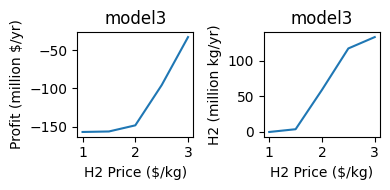

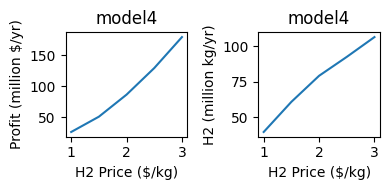

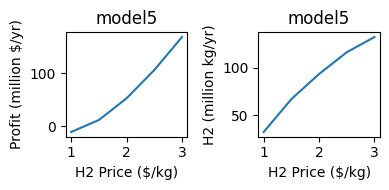

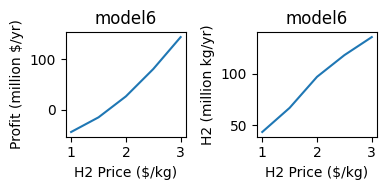

ERCOT_HOUSTON_2019


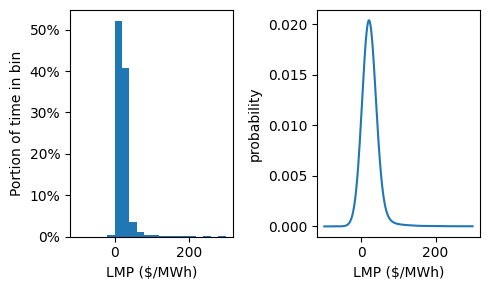

LMP Range ($/MWh) = (-71.9689, 4694.6368)
LMP Median ($/MWh) = 19.63
LMP number of data = 8760
LMP Mean ($/MWh) = 28.20
LMP Variance = 11462.40
LMP Skew = 31.601487687153217
LMP Kurtosis = 1157.1380649987436
Bimodality Coefficient = 0.861667389933178
Natural Gas Price ($/million BTU) = 2.39

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -156.09 -22.69  -21.34  -41.54
Fuel Cost (Million $/yr)      180.25  85.52  142.66     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      18.52  10.37   22.98     NaN
Hydrogen Capacity Factor (%)   75.08  44.49   75.13   74.82
Power (Million MWh/yr)          1.05   0.59    1.43   -4.71
Hydrogen (Million kg/yr)      118.39  70.15  118.47  117.98
Power only mode (%)            21.66  55.51   21.67     0.0
Hydrogen only mode (%)           0.0  44.49     0.0   96.77
Hydrogen + power mode (%)      78.34    0.0   78.33     0.0
Off mode (%)                     0.0    0.0     0.0    3.23


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)          -87.8   28.37   46.69   27.98
Fuel Cost (Million $/yr)      180.46   50.82  142.96     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -0.35  -56.52    5.64     NaN
Hydrogen Capacity Factor (%)   92.48   77.68   92.51   92.43
Power (Million MWh/yr)         -0.02   -3.22    0.35   -5.83
Hydrogen (Million kg/yr)      145.83  122.49  145.87  145.75
Power only mode (%)             7.08   22.32     7.4     0.0
Hydrogen only mode (%)           0.0   77.68     0.0   98.69
Hydrogen + power mode (%)      92.92     0.0    92.6     0.0
Off mode (%)                     0.0     0.0     0.0    1.31


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -121.2  -34.13  -13.26   94.87  121.16  102.54
Fuel Cost (Million $/yr)      58.79  125.01  180.49   38.96   143.0     0.0
CO2 Tax (Million $/yr)          0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)     32.59   94.73    -4.1  -79.38    2.27     NaN
Hydrogen Capacity Factor (%)    NaN     NaN   95.94   89.03   95.89   95.53
Power (Million MWh/yr)         1.86    5.39   -0.23   -4.52    0.14   -6.02
Hydrogen (Million kg/yr)        0.0     0.0  151.28  140.38   151.2  150.63
Power only mode (%)            32.6   100.0    3.92   10.97    4.03     0.0
Hydrogen only mode (%)          0.0     0.0     0.0   89.03     0.0    98.7
Hydrogen + power mode (%)       0.0     0.0   96.08     0.0   95.97     0.0
Off mode (%)                   67.4     0.0     0.0     0.0     0.0     1.3


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          62.92  166.95  197.31  178.62
Fuel Cost (Million $/yr)      180.51   34.54  143.01     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       -5.4  -87.89    1.02     NaN
Hydrogen Capacity Factor (%)   97.14   93.25   97.14   97.18
Power (Million MWh/yr)         -0.31    -5.0    0.06   -6.13
Hydrogen (Million kg/yr)      153.18  147.04  153.17  153.24
Power only mode (%)             2.79    6.75    2.82     0.0
Hydrogen only mode (%)           0.0   93.25     0.0   99.39
Hydrogen + power mode (%)      97.21     0.0   97.18     0.0
Off mode (%)                     0.0     0.0     0.0    0.61


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         139.84  241.31  274.21  255.49
Fuel Cost (Million $/yr)      180.51   32.56  143.02     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.22  -91.71    0.28     NaN
Hydrogen Capacity Factor (%)   97.89   95.15   97.88   97.78
Power (Million MWh/yr)         -0.35   -5.22    0.02   -6.17
Hydrogen (Million kg/yr)      154.36  150.03  154.34  154.18
Power only mode (%)             2.07    4.85     2.1     0.0
Hydrogen only mode (%)           0.0   95.15     0.0   99.39
Hydrogen + power mode (%)      97.93     0.0    97.9     0.0
Off mode (%)                     0.0     0.0     0.0    0.61

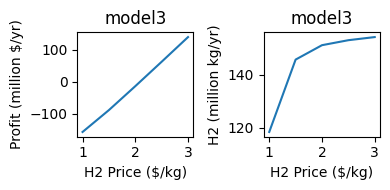

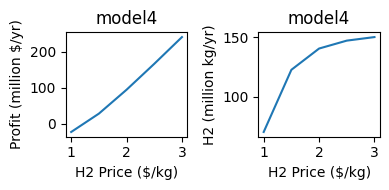

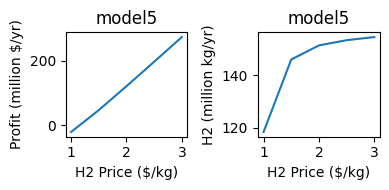

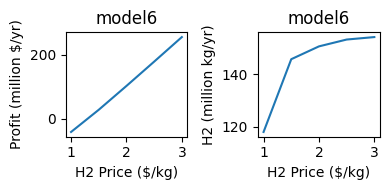

ERCOT_HOUSTON_2022


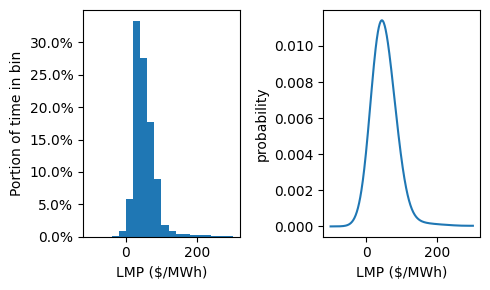

LMP Range ($/MWh) = (-28.7943, 4835.4304)
LMP Median ($/MWh) = 46.52
LMP number of data = 8760
LMP Mean ($/MWh) = 61.98
LMP Variance = 21426.19
LMP Skew = 20.398642186374584
LMP Kurtosis = 525.4749041202547
Bimodality Coefficient = 0.7892594115712327
Natural Gas Price ($/million BTU) = 7.05

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -124.85  39.74   24.77 -65.04
Fuel Cost (Million $/yr)       73.51   90.8  103.12    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      39.79  56.48   67.69    NaN
Hydrogen Capacity Factor (%)    0.01  10.11     3.4   7.93
Power (Million MWh/yr)          2.27   3.22    4.22   -0.5
Hydrogen (Million kg/yr)        0.01  15.95    5.36  12.51
Power only mode (%)            46.83  76.11   84.55    0.0
Hydrogen only mode (%)           0.0  23.89     0.0  14.46
Hydrogen + power mode (%)       0.01    0.0    5.45    0.0
Off mode (%)                   53.16    0.0    10.0  85.54


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -124.63  54.97   36.92 -47.06
Fuel Cost (Million $/yr)       74.15  92.55  129.87    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      39.49  33.73   53.65    NaN
Hydrogen Capacity Factor (%)    0.64  29.76   35.02  32.66
Power (Million MWh/yr)          2.25   1.92    3.35  -2.05
Hydrogen (Million kg/yr)        1.02  46.93   55.21  51.49
Power only mode (%)            45.98  66.97   63.04    0.0
Hydrogen only mode (%)           0.0  33.03     0.0   44.7
Hydrogen + power mode (%)       0.86    0.0   36.96    0.0
Off mode (%)                   53.16    0.0     0.0   55.3


H2 Price ($/kg) = 2.0


model0 model1  model3 model4  model5 model6
Profit (Million $/yr)        -61.97  37.26 -120.15  84.88   73.21 -12.74
Fuel Cost (Million $/yr)      64.55   90.5  108.17   86.2  132.32    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0     0.0    0.0
Power Capacity Factor (%)     35.78  68.68   38.23  11.68   36.15    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   20.08  43.84   54.13  52.25
Power (Million MWh/yr)         2.04   3.91    2.18   0.66    2.25  -3.29
Hydrogen (Million kg/yr)        0.0    0.0   31.66  69.12   85.35  82.39
Power only mode (%)           35.78  85.45   37.23  56.16   43.49    0.0
Hydrogen only mode (%)          0.0    0.0     0.0  43.84     0.0   65.5
Hydrogen + power mode (%)       0.0    0.0   22.84    0.0   56.51    0.0
Off mode (%)                  64.22  14.55   39.93    0.0     0.0   34.5


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         -72.29  123.46  123.39   35.43
Fuel Cost (Million $/yr)      180.24   75.71  132.53     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      23.31   -8.54   20.61     NaN
Hydrogen Capacity Factor (%)   70.61   53.87   69.71   70.34
Power (Million MWh/yr)          1.33   -0.49    1.29   -4.43
Hydrogen (Million kg/yr)      111.34   84.94  109.92  110.91
Power only mode (%)            28.07   46.13   29.18     0.0
Hydrogen only mode (%)           0.0   53.87     0.0   85.02
Hydrogen + power mode (%)      71.93     0.0   70.82     0.0
Off mode (%)                     0.0     0.0     0.0   14.98


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         -12.04  170.02  183.11   95.42
Fuel Cost (Million $/yr)      180.25    65.4  132.63     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      10.95  -28.41    9.58     NaN
Hydrogen Capacity Factor (%)    82.0   63.73   80.75    82.3
Power (Million MWh/yr)          0.62   -1.62     0.6   -5.18
Hydrogen (Million kg/yr)       129.3  100.49  127.33  129.77
Power only mode (%)            15.62   36.27   17.83     0.0
Hydrogen only mode (%)           0.0   63.73     0.0   95.41
Hydrogen + power mode (%)      84.38     0.0   82.17     0.0
Off mode (%)                     0.0     0.0     0.0    4.59

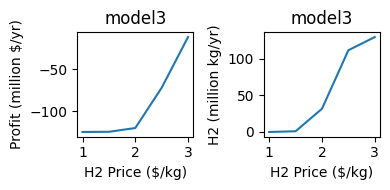

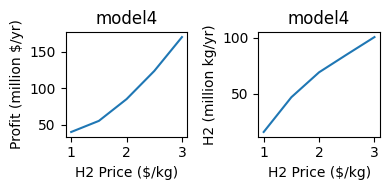

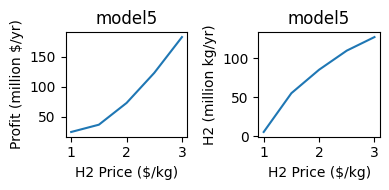

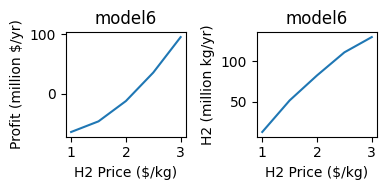

ISO_NE_2019


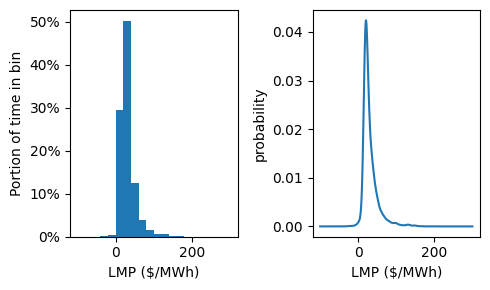

LMP Range ($/MWh) = (-56.16, 261.35)
LMP Median ($/MWh) = 24.55
LMP number of data = 8760
LMP Mean ($/MWh) = 30.68
LMP Variance = 422.83
LMP Skew = 2.806386928658132
LMP Kurtosis = 13.052608498794555
Bimodality Coefficient = 0.5528845574041773
Natural Gas Price ($/million BTU) = 4.50

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -201.32 -59.83  -83.74  -52.0
Fuel Cost (Million $/yr)       31.75  78.99  128.91    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)       17.0   7.91   35.91    NaN
Hydrogen Capacity Factor (%)    0.19  42.48    52.2  49.31
Power (Million MWh/yr)          0.97   0.45    2.24   -3.1
Hydrogen (Million kg/yr)         0.3  66.99   82.31  77.76
Power only mode (%)            19.85  54.27   46.62    0.0
Hydrogen only mode (%)           0.0  45.73     0.0   72.0
Hydrogen + power mode (%)       0.25    0.0   53.38    0.0
Off mode (%)                    79.9    0.0     0.0   28.0


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -187.69   -15.3  -31.33    2.44
Fuel Cost (Million $/yr)      180.19   63.58  129.33     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       16.6  -31.93   10.83     NaN
Hydrogen Capacity Factor (%)   76.74   65.48   77.43   78.01
Power (Million MWh/yr)          0.95   -1.82    0.68   -4.91
Hydrogen (Million kg/yr)      121.01  103.25  122.09  123.01
Power only mode (%)             20.5   34.52   22.12     0.0
Hydrogen only mode (%)           0.0   65.48     0.0   89.65
Hydrogen + power mode (%)       79.5     0.0   77.88     0.0
Off mode (%)                     0.0     0.0     0.0   10.35


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -146.04 -71.52 -121.33   40.93   34.74   69.37
Fuel Cost (Million $/yr)       38.35  76.79  180.29   51.88  129.44     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      21.26  58.37    3.33  -54.47   -0.35     NaN
Hydrogen Capacity Factor (%)     NaN    NaN   88.99   76.67   88.62   89.25
Power (Million MWh/yr)          1.21   3.32    0.19    -3.1   -0.02   -5.63
Hydrogen (Million kg/yr)         0.0    0.0  140.32  120.89  139.74  140.73
Power only mode (%)            21.26  83.82   10.55   23.33   10.72     0.0
Hydrogen only mode (%)           0.0    0.0     0.0   76.67     0.0   95.66
Hydrogen + power mode (%)        0.0    0.0   89.45     0.0   89.28     0.0
Off mode (%)                   78.74  16.18     0.0     0.0     0.0    4.34


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         -48.99  104.58  106.93  142.04
Fuel Cost (Million $/yr)      180.34   43.97  129.51     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -1.91  -69.72   -5.35     NaN
Hydrogen Capacity Factor (%)   93.81   84.24   93.64   94.51
Power (Million MWh/yr)         -0.11   -3.97   -0.33   -5.96
Hydrogen (Million kg/yr)      147.92  132.82  147.66  149.02
Power only mode (%)             5.98   15.76    6.18     0.0
Hydrogen only mode (%)           0.0   84.24     0.0   98.38
Hydrogen + power mode (%)      94.02     0.0   93.82     0.0
Off mode (%)                     0.0     0.0     0.0    1.62


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          26.06  173.01  181.89  217.44
Fuel Cost (Million $/yr)      180.36   38.97  129.54     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -4.52  -79.36   -7.85     NaN
Hydrogen Capacity Factor (%)   96.22   89.02   96.14   96.48
Power (Million MWh/yr)         -0.26   -4.52   -0.49   -6.08
Hydrogen (Million kg/yr)      151.71  140.36  151.59  152.13
Power only mode (%)              3.6   10.98    3.69     0.0
Hydrogen only mode (%)           0.0   89.02     0.0   98.47
Hydrogen + power mode (%)       96.4     0.0   96.31     0.0
Off mode (%)                     0.0     0.0     0.0    1.53

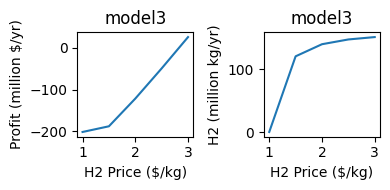

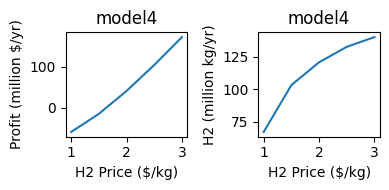

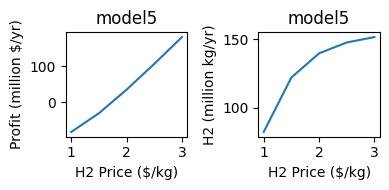

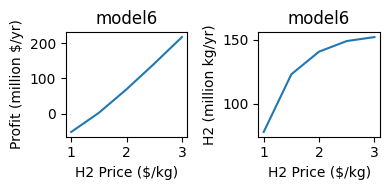

ISO_NE_2022


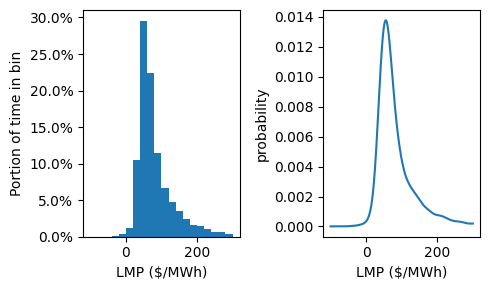

LMP Range ($/MWh) = (-150.91, 2254.35)
LMP Median ($/MWh) = 65.87
LMP number of data = 8760
LMP Mean ($/MWh) = 84.92
LMP Variance = 4215.65
LMP Skew = 6.742168394658317
LMP Kurtosis = 157.5875868435003
Bimodality Coefficient = 0.2892909610586847
Natural Gas Price ($/million BTU) = 10.76

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -114.89  58.87   40.72 -67.16
Fuel Cost (Million $/yr)       58.57  88.37  107.32    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      32.08  64.59   68.67    NaN
Hydrogen Capacity Factor (%)    0.01   2.01    5.85   0.25
Power (Million MWh/yr)          1.83   3.68    4.28  -0.02
Hydrogen (Million kg/yr)        0.01   3.18    9.23    0.4
Power only mode (%)            34.89  80.88   74.26    0.0
Hydrogen only mode (%)           0.0   6.26     0.0   0.62
Hydrogen + power mode (%)       0.01    0.0   25.74    0.0
Off mode (%)                    65.1  12.87     0.0  99.38


H2 Price ($/kg) = 1.5


model3 model4 model5 model6
Profit (Million $/yr)        -114.88  62.42  51.35 -65.44
Fuel Cost (Million $/yr)       58.58  91.17  97.86    0.0
CO2 Tax (Million $/yr)           0.0    0.0    0.0    0.0
Power Capacity Factor (%)      32.08  60.82  66.55    NaN
Hydrogen Capacity Factor (%)    0.02   6.83   1.12   5.49
Power (Million MWh/yr)          1.83   3.46   4.15  -0.35
Hydrogen (Million kg/yr)        0.03  10.76   1.77   8.66
Power only mode (%)            34.87   80.5  82.41    0.0
Hydrogen only mode (%)           0.0   19.5    0.0   7.97
Hydrogen + power mode (%)       0.02    0.0    1.5    0.0
Off mode (%)                    65.1    0.0   16.1  92.03


H2 Price ($/kg) = 2.0


model0 model1  model3 model4  model5 model6
Profit (Million $/yr)        -52.38   61.8 -114.84  71.34   54.47 -54.03
Fuel Cost (Million $/yr)      60.86  86.82   58.64   91.3  112.89    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0     0.0    0.0
Power Capacity Factor (%)     33.73  65.89   32.05  46.67   66.55    NaN
Hydrogen Capacity Factor (%)    NaN    NaN    0.08  18.45   11.09  22.22
Power (Million MWh/yr)         1.92   3.75    1.82   2.66    4.15   -1.4
Hydrogen (Million kg/yr)        0.0    0.0    0.12  29.09   17.48  35.04
Power only mode (%)           33.73  79.92   34.79  72.84   86.32    0.0
Hydrogen only mode (%)          0.0    0.0     0.0  27.16     0.0  29.37
Hydrogen + power mode (%)       0.0    0.0     0.1    0.0   13.68    0.0
Off mode (%)                  66.27  20.08    65.1    0.0     0.0  70.63


H2 Price ($/kg) = 2.5


model3 model4  model5 model6
Profit (Million $/yr)        -114.72  92.43   80.13  -27.9
Fuel Cost (Million $/yr)       58.98  92.57  132.75    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      31.89  26.29   45.69    NaN
Hydrogen Capacity Factor (%)    0.41  35.85   45.35  43.75
Power (Million MWh/yr)          1.82    1.5    2.85  -2.75
Hydrogen (Million kg/yr)        0.65  56.53   71.51  68.99
Power only mode (%)            34.35   64.1   49.97    0.0
Hydrogen only mode (%)           0.0   35.9     0.0  56.44
Hydrogen + power mode (%)       0.55    0.0   50.03    0.0
Off mode (%)                    65.1    0.0     0.0  43.56


H2 Price ($/kg) = 3.0


model3  model4  model5 model6
Profit (Million $/yr)        -110.56  125.53  122.26  13.55
Fuel Cost (Million $/yr)       92.45   82.55  133.02    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      32.66    4.64   32.12    NaN
Hydrogen Capacity Factor (%)   17.17   47.33   58.97  60.88
Power (Million MWh/yr)          1.86    0.26     2.0  -3.83
Hydrogen (Million kg/yr)       27.08   74.63   92.99  95.99
Power only mode (%)            32.58   52.67   38.84    0.0
Hydrogen only mode (%)           0.0   47.33     0.0  73.76
Hydrogen + power mode (%)      18.74     0.0   61.16    0.0
Off mode (%)                   48.68     0.0     0.0  26.24

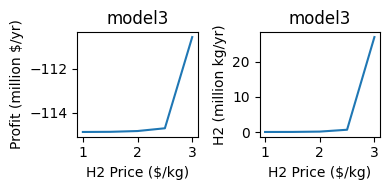

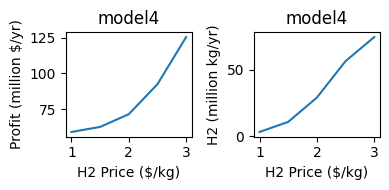

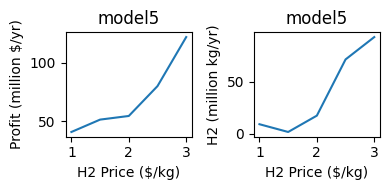

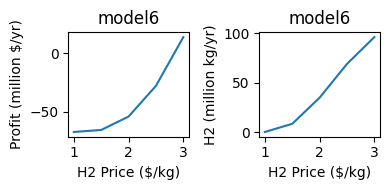

NYISO_2019


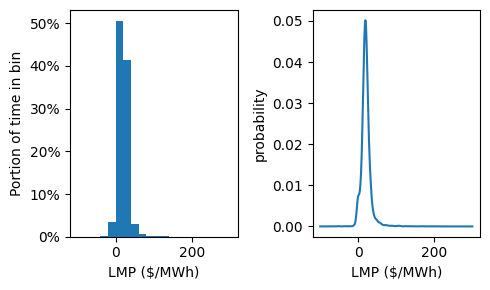

LMP Range ($/MWh) = (-186.74, 356.71)
LMP Median ($/MWh) = 19.18
LMP number of data = 8760
LMP Mean ($/MWh) = 20.09
LMP Variance = 220.14
LMP Skew = 3.2002862895338393
LMP Kurtosis = 76.71237435137776
Bimodality Coefficient = 0.14102813370420847
Natural Gas Price ($/million BTU) = 3.05

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -215.02 -57.54  -76.76  -24.86
Fuel Cost (Million $/yr)       84.57  72.92  131.97     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)       16.3 -13.92   13.24     NaN
Hydrogen Capacity Factor (%)   28.24  56.54   76.26   76.43
Power (Million MWh/yr)          0.93  -0.79    0.83   -4.81
Hydrogen (Million kg/yr)       44.54  89.15  120.24  120.52
Power only mode (%)            15.66  43.46   20.22     0.0
Hydrogen only mode (%)           0.0  56.54     0.0   96.83
Hydrogen + power mode (%)      31.36    0.0   79.78     0.0
Off mode (%)                   52.98    0.0     0.0    3.17


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -146.55   -1.27   -7.11   46.84
Fuel Cost (Million $/yr)      180.34   45.58  132.29     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -2.98  -66.61   -5.26     NaN
Hydrogen Capacity Factor (%)   94.81   82.69    94.8   95.42
Power (Million MWh/yr)         -0.17   -3.79   -0.33   -6.02
Hydrogen (Million kg/yr)       149.5  130.39  149.48  150.45
Power only mode (%)             4.86   17.31     5.1     0.0
Hydrogen only mode (%)           0.0   82.69     0.0   100.0
Hydrogen + power mode (%)      95.14     0.0    94.9     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0 model1  model3 model4  model5  model6
Profit (Million $/yr)        -162.1 -90.78  -70.37  68.44   69.02   123.5
Fuel Cost (Million $/yr)      28.99  93.98  180.39  35.23  132.33     0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0     0.0     0.0
Power Capacity Factor (%)     16.06  71.38   -6.22 -86.56   -8.25     NaN
Hydrogen Capacity Factor (%)    NaN    NaN   97.81  92.59    97.8   98.08
Power (Million MWh/yr)         0.91   4.06   -0.35  -4.93   -0.51   -6.18
Hydrogen (Million kg/yr)        0.0    0.0  154.23  146.0  154.21  154.66
Power only mode (%)           16.14  95.78    2.02   7.41    2.15     0.0
Hydrogen only mode (%)          0.0    0.0     0.0  92.59     0.0   100.0
Hydrogen + power mode (%)       0.0    0.0   97.98    0.0   97.85     0.0
Off mode (%)                  83.86   4.22     0.0    0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)           7.24  143.05  146.56  201.31
Fuel Cost (Million $/yr)       180.4    31.7  132.33     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.38  -93.36   -9.15     NaN
Hydrogen Capacity Factor (%)   98.88   95.97    98.7   99.06
Power (Million MWh/yr)         -0.42   -5.32   -0.57   -6.25
Hydrogen (Million kg/yr)      155.92  151.33  155.62   156.2
Power only mode (%)             1.04    4.03     1.1     0.0
Hydrogen only mode (%)           0.0   95.97     0.0   100.0
Hydrogen + power mode (%)      98.96     0.0    98.9     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          85.38  219.31  224.72  279.56
Fuel Cost (Million $/yr)      180.41   30.22  132.34     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.82  -96.22   -9.74     NaN
Hydrogen Capacity Factor (%)   99.28   97.39   99.29   99.41
Power (Million MWh/yr)         -0.44   -5.48   -0.61   -6.27
Hydrogen (Million kg/yr)      156.54  153.56  156.55  156.74
Power only mode (%)              0.7    2.61     0.7     0.0
Hydrogen only mode (%)           0.0   97.39     0.0   100.0
Hydrogen + power mode (%)       99.3     0.0    99.3     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

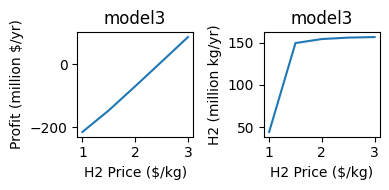

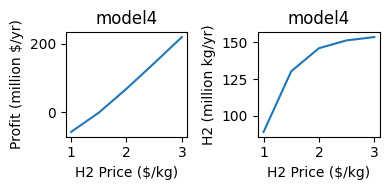

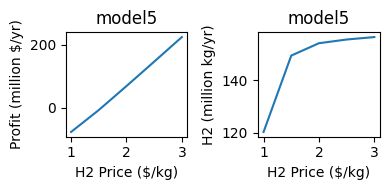

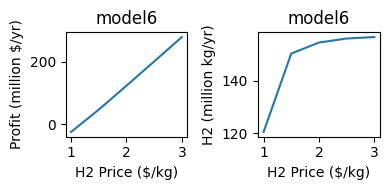

NYISO_2022


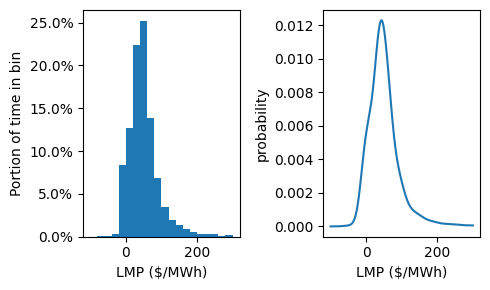

LMP Range ($/MWh) = (-410.7, 2829.46)
LMP Median ($/MWh) = 43.98
LMP number of data = 8760
LMP Mean ($/MWh) = 53.64
LMP Variance = 5440.09
LMP Skew = 15.115166135268415
LMP Kurtosis = 457.9037813395232
Bimodality Coefficient = 0.49786472771019336
Natural Gas Price ($/million BTU) = 7.57

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -152.7  26.86   -9.02 -47.05
Fuel Cost (Million $/yr)      63.49  84.09  106.23    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0
Power Capacity Factor (%)     34.07  35.51   55.17    NaN
Hydrogen Capacity Factor (%)   0.19  23.11    16.0  22.79
Power (Million MWh/yr)         1.94   2.02    3.44  -1.43
Hydrogen (Million kg/yr)        0.3  36.44   25.22  35.94
Power only mode (%)           40.82  68.45   78.93    0.0
Hydrogen only mode (%)          0.0  31.55     0.0  33.92
Hydrogen + power mode (%)      0.25    0.0   18.42    0.0
Off mode (%)                  58.93    0.0    2.65  66.08


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -152.12  48.92     9.9 -22.82
Fuel Cost (Million $/yr)        65.1  84.12  118.95    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      33.62   22.0   45.13    NaN
Hydrogen Capacity Factor (%)    1.48  34.15   34.02   38.5
Power (Million MWh/yr)          1.91   1.25    2.81  -2.42
Hydrogen (Million kg/yr)        2.33  53.85   53.65  60.71
Power only mode (%)            39.36  60.95   57.01    0.0
Hydrogen only mode (%)           0.0  39.05     0.0  54.81
Hydrogen + power mode (%)       1.96    0.0   42.99    0.0
Off mode (%)                   58.68    0.0     0.0  45.19


H2 Price ($/kg) = 2.0


model0 model1  model3 model4  model5 model6
Profit (Million $/yr)        -87.57   1.92 -148.74  82.33   48.14  16.32
Fuel Cost (Million $/yr)      55.44  77.74   88.61  80.56  127.67    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0     0.0    0.0
Power Capacity Factor (%)     30.73  59.02   34.18    0.8   28.21    NaN
Hydrogen Capacity Factor (%)    NaN    NaN    13.5  49.24   56.72  56.39
Power (Million MWh/yr)         1.75   3.36    1.95   0.05    1.76  -3.55
Hydrogen (Million kg/yr)        0.0    0.0   21.29  77.63   89.43  88.92
Power only mode (%)           30.73  75.05   34.49  50.76    41.3    0.0
Hydrogen only mode (%)          0.0    0.0     0.0  49.24     0.0  69.65
Hydrogen + power mode (%)       0.0    0.0   16.05    0.0    58.7    0.0
Off mode (%)                  69.27  24.95   49.46    0.0     0.0  30.35


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)        -108.76  124.7   99.37    68.1
Fuel Cost (Million $/yr)      180.16  71.67  127.84     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      21.23 -16.34   13.67     NaN
Hydrogen Capacity Factor (%)   72.49  57.74   71.29   72.16
Power (Million MWh/yr)          1.21  -0.93    0.85   -4.54
Hydrogen (Million kg/yr)       114.3  91.04  112.41  113.78
Power only mode (%)            25.78  42.26   27.36     0.0
Hydrogen only mode (%)           0.0  57.74     0.0   85.17
Hydrogen + power mode (%)      74.22    0.0   72.64     0.0
Off mode (%)                     0.0    0.0     0.0   14.83


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         -47.76  173.44  160.06  129.97
Fuel Cost (Million $/yr)      180.27   62.97  127.97     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      11.79   -33.1    4.15     NaN
Hydrogen Capacity Factor (%)    81.2   66.06   80.82   82.77
Power (Million MWh/yr)          0.67   -1.88    0.26   -5.21
Hydrogen (Million kg/yr)      128.04  104.17  127.44  130.52
Power only mode (%)            17.74   33.94   18.65     0.0
Hydrogen only mode (%)           0.0   66.06     0.0    93.9
Hydrogen + power mode (%)      82.26     0.0   81.35     0.0
Off mode (%)                     0.0     0.0     0.0     6.1

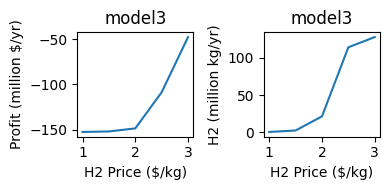

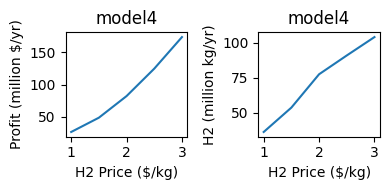

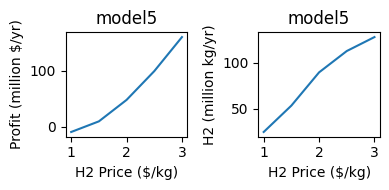

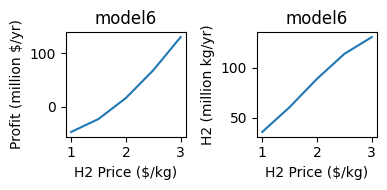

MISO_INDIANA_2019


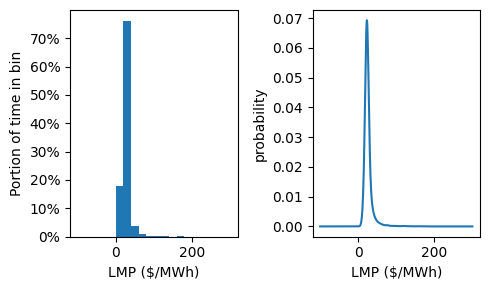

LMP Range ($/MWh) = (2.26, 936.4)
LMP Median ($/MWh) = 23.33
LMP number of data = 8760
LMP Mean ($/MWh) = 26.41
LMP Variance = 468.96
LMP Skew = 19.414999499853316
LMP Kurtosis = 576.0565024499532
Bimodality Coefficient = 0.6526850715917126
Natural Gas Price ($/million BTU) = 2.73

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -197.77  -56.5  -61.99 -57.54
Fuel Cost (Million $/yr)      179.86  114.7  144.29    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      32.12   66.6   35.26    NaN
Hydrogen Capacity Factor (%)   62.58  16.58   64.26  57.68
Power (Million MWh/yr)          1.83   3.79     2.2  -3.62
Hydrogen (Million kg/yr)       98.67  26.14  101.33  90.95
Power only mode (%)            29.69  83.42   32.91    0.0
Hydrogen only mode (%)           0.0  16.58     0.0   86.3
Hydrogen + power mode (%)      70.31    0.0   67.09    0.0
Off mode (%)                     0.0    0.0     0.0   13.7


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)         -130.5  -19.55    4.96   12.05
Fuel Cost (Million $/yr)      180.48   53.96  144.68     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -0.95  -50.47    6.67     NaN
Hydrogen Capacity Factor (%)   93.05   74.68   92.92   93.76
Power (Million MWh/yr)         -0.05   -2.87    0.42   -5.91
Hydrogen (Million kg/yr)      146.73  117.76  146.51  147.84
Power only mode (%)             6.68   25.32    6.71     0.0
Hydrogen only mode (%)           0.0   74.68     0.0   100.0
Hydrogen + power mode (%)      93.32     0.0   93.29     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -151.7  -55.76  -55.29   46.93   80.09   87.92
Fuel Cost (Million $/yr)      60.91  129.11  180.52   38.16  144.73     0.0
CO2 Tax (Million $/yr)          0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)     33.76   97.81   -5.11  -80.92    2.74     NaN
Hydrogen Capacity Factor (%)    NaN     NaN   96.89   89.79   96.85   97.37
Power (Million MWh/yr)         1.92    5.57   -0.29   -4.61    0.17   -6.14
Hydrogen (Million kg/yr)        0.0     0.0  152.77  141.59  152.72  153.53
Power only mode (%)           33.77   100.0    2.95   10.21    3.11     0.0
Hydrogen only mode (%)          0.0     0.0     0.0   89.79     0.0   100.0
Hydrogen + power mode (%)       0.0     0.0   97.05     0.0   96.89     0.0
Off mode (%)                  66.23     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)           21.7  119.71  157.05  165.22
Fuel Cost (Million $/yr)      180.53   33.42  144.75     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.56  -90.05    1.44     NaN
Hydrogen Capacity Factor (%)   98.22   94.33   98.16   98.49
Power (Million MWh/yr)         -0.37   -5.13    0.09   -6.21
Hydrogen (Million kg/yr)      154.88  148.73  154.78   155.3
Power only mode (%)             1.68    5.67    1.82     0.0
Hydrogen only mode (%)           0.0   94.33     0.0   100.0
Hydrogen + power mode (%)      98.32     0.0   98.18     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          99.38  194.89   234.7  243.09
Fuel Cost (Million $/yr)      180.53   31.39  144.75     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.15  -93.96    0.85     NaN
Hydrogen Capacity Factor (%)   98.77   96.27   98.75   98.97
Power (Million MWh/yr)         -0.41   -5.35    0.05   -6.24
Hydrogen (Million kg/yr)      155.74  151.79   155.7  156.05
Power only mode (%)             1.15    3.73     1.2     0.0
Hydrogen only mode (%)           0.0   96.27     0.0   100.0
Hydrogen + power mode (%)      98.85     0.0    98.8     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

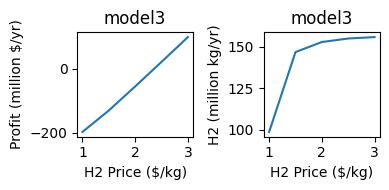

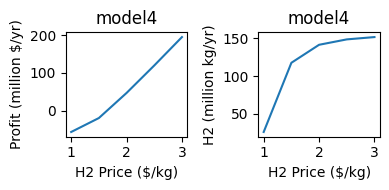

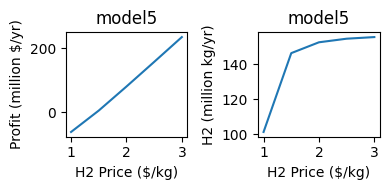

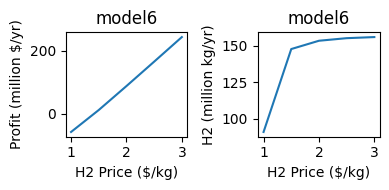

MISO_INDIANA_2022


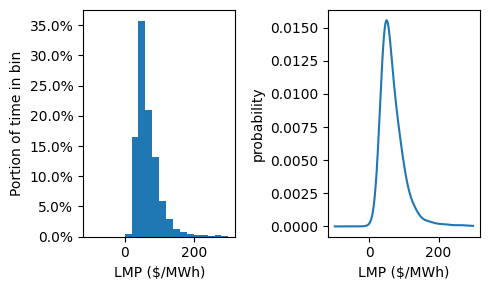

LMP Range ($/MWh) = (-4.43, 2411.71)
LMP Median ($/MWh) = 58.25
LMP number of data = 8760
LMP Mean ($/MWh) = 71.46
LMP Variance = 4939.06
LMP Skew = 14.639437845917103
LMP Kurtosis = 366.60031733050135
Bimodality Coefficient = 0.5825550780266641
Natural Gas Price ($/million BTU) = 8.04

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -135.92   44.95   37.48 -67.24
Fuel Cost (Million $/yr)       93.39  108.47  121.07    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      50.58   80.42   83.62    NaN
Hydrogen Capacity Factor (%)     0.0    1.51    0.21   0.09
Power (Million MWh/yr)          2.88    4.58    5.22  -0.01
Hydrogen (Million kg/yr)         0.0    2.38    0.32   0.15
Power only mode (%)            59.42   93.14   98.58    0.0
Hydrogen only mode (%)           0.0    5.88     0.0    0.1
Hydrogen + power mode (%)        0.0     0.0    0.43    0.0
Off mode (%)                   40.58    0.98    0.98   99.9


H2 Price ($/kg) = 1.5


model3 model4 model5 model6
Profit (Million $/yr)        -135.92  47.83  38.42  -66.0
Fuel Cost (Million $/yr)       93.39  107.5  123.7    0.0
CO2 Tax (Million $/yr)           0.0    0.0    0.0    0.0
Power Capacity Factor (%)      50.58  72.19   81.4    NaN
Hydrogen Capacity Factor (%)     0.0   7.61   4.11   3.23
Power (Million MWh/yr)          2.88   4.11   5.08   -0.2
Hydrogen (Million kg/yr)         0.0  11.99   6.49   5.09
Power only mode (%)            59.42  86.51  92.23    0.0
Hydrogen only mode (%)           0.0  13.49    0.0   4.14
Hydrogen + power mode (%)        0.0    0.0   7.77    0.0
Off mode (%)                   40.58    0.0    0.0  95.86


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5 model6
Profit (Million $/yr)        -70.49  49.34 -149.77    60.4    55.6 -52.18
Fuel Cost (Million $/yr)      77.69  110.4  139.69  105.71  138.06    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0     0.0     0.0    0.0
Power Capacity Factor (%)     43.06  83.76   59.65   49.35   60.37    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   12.92   25.11   34.84  28.94
Power (Million MWh/yr)         2.45   4.77     3.4    2.81    3.77  -1.82
Hydrogen (Million kg/yr)        0.0    0.0   20.37    39.6   54.94  45.64
Power only mode (%)           43.06  99.02   77.15   74.89   61.44    0.0
Hydrogen only mode (%)          0.0    0.0     0.0   25.11     0.0  39.46
Hydrogen + power mode (%)       0.0    0.0   22.85     0.0   38.56    0.0
Off mode (%)                  56.94   0.98     0.0     0.0     0.0  60.54


H2 Price ($/kg) = 2.5


model3 model4  model5 model6
Profit (Million $/yr)        -111.94  85.08   92.36 -18.66
Fuel Cost (Million $/yr)      180.18   92.7  138.36    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      39.28  24.19   40.38    NaN
Hydrogen Capacity Factor (%)   55.93  37.63   54.89   51.7
Power (Million MWh/yr)          2.24   1.38    2.52  -3.25
Hydrogen (Million kg/yr)        88.2  59.33   86.55  81.52
Power only mode (%)            41.06  62.37   42.99    0.0
Hydrogen only mode (%)           0.0  37.63     0.0  64.47
Hydrogen + power mode (%)      58.94    0.0   57.01    0.0
Off mode (%)                     0.0    0.0     0.0  35.53


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         -61.42  119.82   142.3   30.23
Fuel Cost (Million $/yr)      180.29   79.87  138.53     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      24.27   -0.53   26.62     NaN
Hydrogen Capacity Factor (%)   69.77    49.9   68.69    70.9
Power (Million MWh/yr)          1.38   -0.03    1.66   -4.46
Hydrogen (Million kg/yr)      110.02   78.68   108.3  111.79
Power only mode (%)            29.03    50.1   30.02     0.0
Hydrogen only mode (%)           0.0    49.9     0.0    88.8
Hydrogen + power mode (%)      70.97     0.0   69.98     0.0
Off mode (%)                     0.0     0.0     0.0    11.2

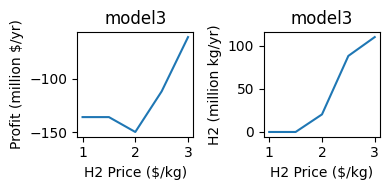

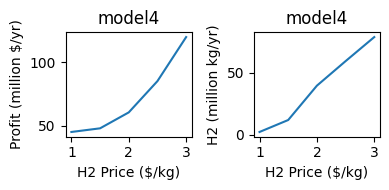

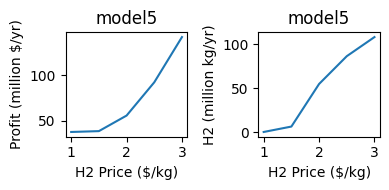

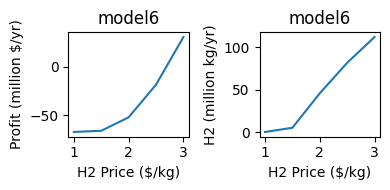

MISO_LOUISIANA_2019


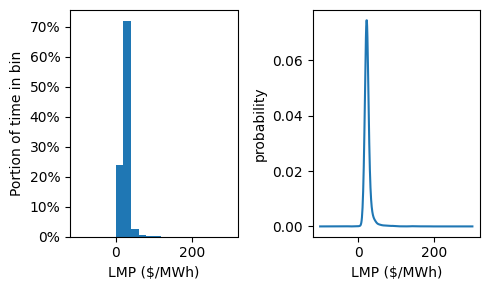

LMP Range ($/MWh) = (-31.26, 968.31)
LMP Median ($/MWh) = 22.67
LMP number of data = 8760
LMP Mean ($/MWh) = 24.86
LMP Variance = 347.61
LMP Skew = 23.63767791611193
LMP Kurtosis = 910.3603873182315
Bimodality Coefficient = 0.6128349720143711
Natural Gas Price ($/million BTU) = 2.73

H2 Price ($/kg) = 1.0


model3  model4  model5  model6
Profit (Million $/yr)        -206.84  -63.55  -68.42  -53.25
Fuel Cost (Million $/yr)      178.34  109.22  144.03     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      31.34   56.05   30.13     NaN
Hydrogen Capacity Factor (%)   62.34   21.82   69.21   65.65
Power (Million MWh/yr)          1.78    3.19    1.88   -4.12
Hydrogen (Million kg/yr)       98.29    34.4  109.14  103.51
Power only mode (%)            27.61   78.18   26.45     0.0
Hydrogen only mode (%)           0.0   21.82     0.0   94.17
Hydrogen + power mode (%)      72.39     0.0   73.55     0.0
Off mode (%)                     0.0     0.0     0.0    5.83


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -133.66  -21.84    1.06   18.55
Fuel Cost (Million $/yr)      180.49   49.63  144.46     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -3.21  -58.82    4.37     NaN
Hydrogen Capacity Factor (%)   95.13   78.82   95.03   95.66
Power (Million MWh/yr)         -0.18   -3.35    0.27   -6.03
Hydrogen (Million kg/yr)       150.0  124.29  149.84  150.84
Power only mode (%)             4.52   21.18    4.83     0.0
Hydrogen only mode (%)           0.0   78.82     0.0   100.0
Hydrogen + power mode (%)      95.48     0.0   95.17     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -157.45  -64.41  -57.24   47.27   77.42   95.41
Fuel Cost (Million $/yr)       51.24  128.28  180.52   35.13  144.49     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)       28.4   97.19   -6.28  -86.76    1.45     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   97.97   92.69   97.96   98.29
Power (Million MWh/yr)          1.62    5.53   -0.36   -4.94    0.09    -6.2
Hydrogen (Million kg/yr)         0.0     0.0  154.47  146.16  154.46  154.99
Power only mode (%)            28.42   100.0    1.94    7.31    1.94     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   92.69     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   98.06     0.0   98.06     0.0
Off mode (%)                   71.58     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          20.38  121.93  155.02  173.24
Fuel Cost (Million $/yr)      180.53   31.64   144.5     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.18  -93.48    0.64     NaN
Hydrogen Capacity Factor (%)    98.8   96.03   98.77    99.0
Power (Million MWh/yr)         -0.41   -5.32    0.04   -6.24
Hydrogen (Million kg/yr)      155.78  151.42  155.73   156.1
Power only mode (%)             1.16    3.97     1.2     0.0
Hydrogen only mode (%)           0.0   96.03     0.0   100.0
Hydrogen + power mode (%)      98.84     0.0    98.8     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          98.45  198.33  233.07  251.43
Fuel Cost (Million $/yr)      180.53   29.95  144.51     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.61  -96.74    0.24     NaN
Hydrogen Capacity Factor (%)   99.19   97.65   99.17   99.33
Power (Million MWh/yr)         -0.43   -5.51    0.01   -6.26
Hydrogen (Million kg/yr)       156.4  153.97  156.37  156.63
Power only mode (%)             0.79    2.35    0.82     0.0
Hydrogen only mode (%)           0.0   97.65     0.0   100.0
Hydrogen + power mode (%)      99.21     0.0   99.18     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

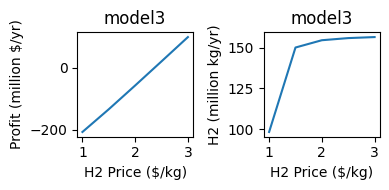

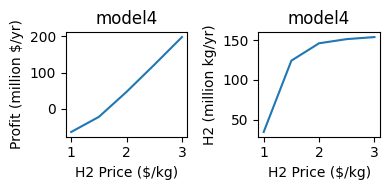

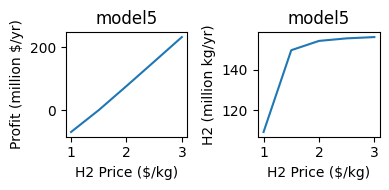

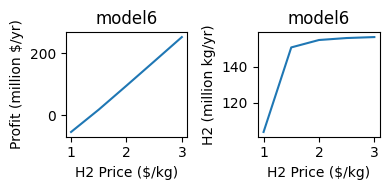

MISO_LOUISIANA_2022


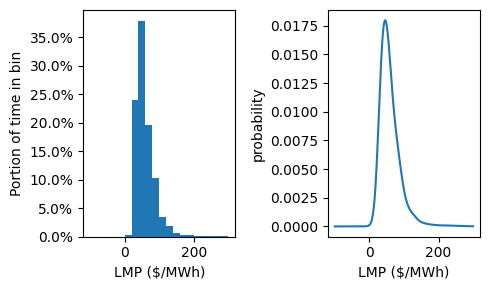

LMP Range ($/MWh) = (-3.03, 2009.43)
LMP Median ($/MWh) = 52.91
LMP number of data = 8760
LMP Mean ($/MWh) = 62.48
LMP Variance = 3619.78
LMP Skew = 16.375278314653812
LMP Kurtosis = 397.6346249849884
Bimodality Coefficient = 0.6718067601303748
Natural Gas Price ($/million BTU) = 8.04

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -168.65  -2.86  -14.96 -67.25
Fuel Cost (Million $/yr)       71.44  99.44  108.41    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      38.61  72.84   75.04    NaN
Hydrogen Capacity Factor (%)     0.0   2.13    0.07   0.06
Power (Million MWh/yr)           2.2   4.15    4.68   -0.0
Hydrogen (Million kg/yr)         0.0   3.35     0.1    0.1
Power only mode (%)            45.99  89.26    91.2    0.0
Hydrogen only mode (%)           0.0   9.76     0.0   0.09
Hydrogen + power mode (%)        0.0    0.0    0.15    0.0
Off mode (%)                   54.01   0.98    8.65  99.91


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -168.65   1.29  -14.04 -63.65
Fuel Cost (Million $/yr)       71.45  98.08  116.45    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      38.61  59.68    74.5    NaN
Hydrogen Capacity Factor (%)    0.01   12.0    6.01  15.62
Power (Million MWh/yr)           2.2    3.4    4.65  -0.98
Hydrogen (Million kg/yr)        0.01  18.93    9.48  24.63
Power only mode (%)            45.98  79.05   88.94    0.0
Hydrogen only mode (%)           0.0  20.95     0.0  23.53
Hydrogen + power mode (%)       0.01    0.0   11.06    0.0
Off mode (%)                   54.01    0.0     0.0  76.47


H2 Price ($/kg) = 2.0


model0 model1  model3 model4  model5 model6
Profit (Million $/yr)        -106.22   1.79 -168.43  19.45    9.28 -41.01
Fuel Cost (Million $/yr)       59.77  97.15   73.33  96.87  135.49    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0     0.0    0.0
Power Capacity Factor (%)      33.13  73.71   38.09  32.35   49.35    NaN
Hydrogen Capacity Factor (%)     NaN    NaN    1.51  33.54   43.98  38.38
Power (Million MWh/yr)          1.89    4.2    2.17   1.84    3.08  -2.42
Hydrogen (Million kg/yr)         0.0    0.0    2.38  52.88   69.35  60.52
Power only mode (%)            33.13  87.55   44.27  66.46   51.61    0.0
Hydrogen only mode (%)           0.0    0.0     0.0  33.54     0.0  47.37
Hydrogen + power mode (%)        0.0    0.0    2.02    0.0   48.39    0.0
Off mode (%)                   66.87  12.45   53.71    0.0     0.0  52.63


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)        -146.68  51.27   53.38   -0.89
Fuel Cost (Million $/yr)      180.17  83.07  135.83     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      29.23   5.63   28.55     NaN
Hydrogen Capacity Factor (%)   65.18  46.84   64.84    63.6
Power (Million MWh/yr)          1.66   0.32    1.78    -4.0
Hydrogen (Million kg/yr)      102.78  73.85  102.23  100.29
Power only mode (%)            31.37  53.16    33.2     0.0
Hydrogen only mode (%)           0.0  46.84     0.0    78.0
Hydrogen + power mode (%)      68.63    0.0    66.8     0.0
Off mode (%)                     0.0    0.0     0.0    22.0


H2 Price ($/kg) = 3.0


model3 model4  model5  model6
Profit (Million $/yr)         -88.99  93.26  110.51   56.89
Fuel Cost (Million $/yr)      180.26  69.99  135.98     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      14.39 -19.58   16.02     NaN
Hydrogen Capacity Factor (%)   78.85  59.35    77.4   81.47
Power (Million MWh/yr)          0.82  -1.11     1.0   -5.13
Hydrogen (Million kg/yr)      124.34  93.58  122.04  128.46
Power only mode (%)            19.39  40.65   21.27     0.0
Hydrogen only mode (%)           0.0  59.35     0.0   98.28
Hydrogen + power mode (%)      80.61    0.0   78.73     0.0
Off mode (%)                     0.0    0.0     0.0    1.72

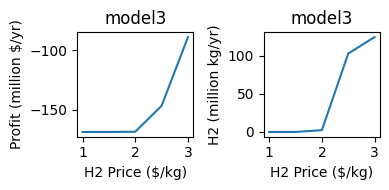

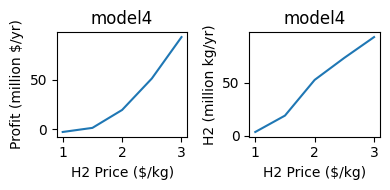

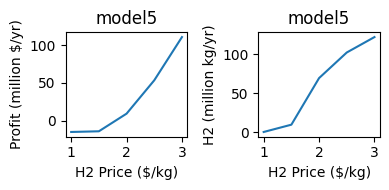

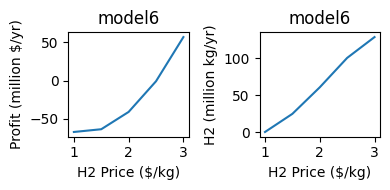

MISO_MINNESOTA_2019


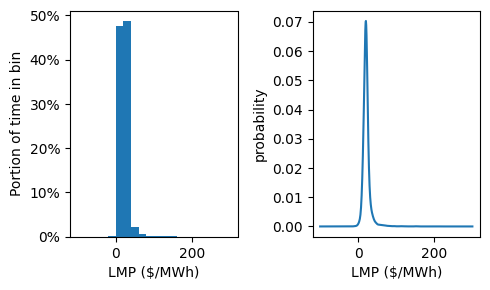

LMP Range ($/MWh) = (-38.56, 661.22)
LMP Median ($/MWh) = 20.19
LMP number of data = 8760
LMP Mean ($/MWh) = 21.97
LMP Variance = 287.66
LMP Skew = 19.597104660017617
LMP Kurtosis = 593.9482810405294
Bimodality Coefficient = 0.6450237991079805
Natural Gas Price ($/million BTU) = 3.73

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -219.63 -82.59 -102.31  -37.86
Fuel Cost (Million $/yr)         3.8  66.08  129.59     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)       1.85  -27.1    8.88     NaN
Hydrogen Capacity Factor (%)    0.15  63.08   79.84   77.85
Power (Million MWh/yr)          0.11  -1.54    0.55    -4.9
Hydrogen (Million kg/yr)        0.23  99.47  125.88  122.76
Power only mode (%)             2.51  36.92   17.43     0.0
Hydrogen only mode (%)           0.0  63.08     0.0   95.15
Hydrogen + power mode (%)       0.19    0.0   82.57     0.0
Off mode (%)                   97.29    0.0     0.0    4.85


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)         -174.5  -19.67  -30.52    35.6
Fuel Cost (Million $/yr)      180.32   38.75  129.85     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -4.23  -79.77   -7.02     NaN
Hydrogen Capacity Factor (%)   95.94   89.22   95.77   96.03
Power (Million MWh/yr)         -0.24   -4.54   -0.44   -6.05
Hydrogen (Million kg/yr)      151.28  140.69  151.02  151.42
Power only mode (%)             3.72   10.78    4.03     0.0
Hydrogen only mode (%)           0.0   89.22     0.0   99.52
Hydrogen + power mode (%)      96.28     0.0   95.97     0.0
Off mode (%)                     0.0     0.0     0.0    0.48


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -165.04 -102.06  -97.77   53.34   46.16  112.69
Fuel Cost (Million $/yr)       11.41   81.56  180.36   32.92  129.87     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)       6.32   62.09    -6.6  -91.02   -9.26     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   98.13   94.81   98.01   98.46
Power (Million MWh/yr)          0.36    3.54   -0.38   -5.18   -0.58   -6.21
Hydrogen (Million kg/yr)         0.0     0.0  154.73  149.49  154.55  155.25
Power only mode (%)             6.35   96.94    1.75    5.19    1.83     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   94.81     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   98.25     0.0   98.17     0.0
Off mode (%)                   93.65    3.06     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         -20.08  129.17  123.78  190.58
Fuel Cost (Million $/yr)      180.36   30.44  129.87     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       -7.4   -95.8   -9.85     NaN
Hydrogen Capacity Factor (%)   98.86   97.18    98.6   99.03
Power (Million MWh/yr)         -0.42   -5.45   -0.61   -6.24
Hydrogen (Million kg/yr)      155.89  153.23  155.48  156.15
Power only mode (%)             1.07    2.82     1.1     0.0
Hydrogen only mode (%)           0.0   97.18     0.0   100.0
Hydrogen + power mode (%)      98.93     0.0    98.9     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          58.06  206.16  201.97  268.84
Fuel Cost (Million $/yr)      180.37   29.51  129.89     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.87   -97.6  -10.53     NaN
Hydrogen Capacity Factor (%)    99.3   98.07   99.29   99.42
Power (Million MWh/yr)         -0.45   -5.56   -0.66   -6.27
Hydrogen (Million kg/yr)      156.57  154.64  156.56  156.77
Power only mode (%)             0.65    1.93    0.71     0.0
Hydrogen only mode (%)           0.0   98.07     0.0   100.0
Hydrogen + power mode (%)      99.35     0.0   99.29     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

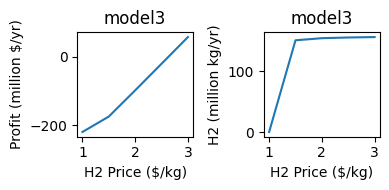

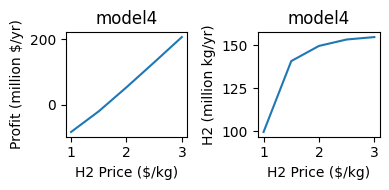

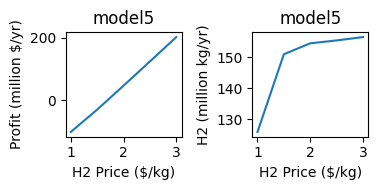

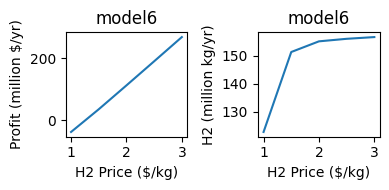

MISO_MINNESOTA_2022


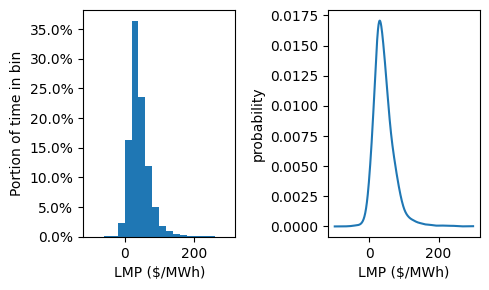

LMP Range ($/MWh) = (-62.28, 1781.78)
LMP Median ($/MWh) = 36.91
LMP number of data = 8760
LMP Mean ($/MWh) = 44.10
LMP Variance = 2410.16
LMP Skew = 14.559332638623207
LMP Kurtosis = 395.3952932240933
Bimodality Coefficient = 0.5345786485699735
Natural Gas Price ($/million BTU) = 8.04

H2 Price ($/kg) = 1.0


model3 model4 model5 model6
Profit (Million $/yr)        -203.84 -47.71 -85.03 -58.97
Fuel Cost (Million $/yr)        28.8  65.73  73.75    0.0
CO2 Tax (Million $/yr)           0.0    0.0    0.0    0.0
Power Capacity Factor (%)      15.19  22.47  43.61    NaN
Hydrogen Capacity Factor (%)    0.04  22.41   6.69  18.68
Power (Million MWh/yr)          0.87   1.28   2.72  -1.17
Hydrogen (Million kg/yr)        0.07  35.34  10.54  29.46
Power only mode (%)            20.57  56.78  66.79    0.0
Hydrogen only mode (%)           0.0  43.22    0.0  31.95
Hydrogen + power mode (%)       0.06    0.0   8.73    0.0
Off mode (%)                   79.37    0.0  24.47  68.05


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -203.72 -21.95  -68.91  -28.7
Fuel Cost (Million $/yr)       30.55  68.15  106.14    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      15.62  -2.44   32.05    NaN
Hydrogen Capacity Factor (%)    0.52  44.24   38.71  50.88
Power (Million MWh/yr)          0.89  -0.14     2.0   -3.2
Hydrogen (Million kg/yr)        0.81  69.76   61.05  80.23
Power only mode (%)            21.02  47.83   51.13    0.0
Hydrogen only mode (%)           0.0  52.17     0.0  73.46
Hydrogen + power mode (%)       0.68    0.0   48.87    0.0
Off mode (%)                    78.3    0.0     0.0  26.54


H2 Price ($/kg) = 2.0


model0 model1 model3 model4  model5  model6
Profit (Million $/yr)        -135.67 -63.37 -202.1  20.34  -23.29   21.41
Fuel Cost (Million $/yr)       33.36  57.96  38.31   67.9  122.56     0.0
CO2 Tax (Million $/yr)           0.0    0.0    0.0    0.0     0.0     0.0
Power Capacity Factor (%)      18.49  44.06  15.08 -23.53   13.64     NaN
Hydrogen Capacity Factor (%)     NaN    NaN   4.96  61.29   68.12   71.87
Power (Million MWh/yr)          1.05   2.51   0.86  -1.34    0.85   -4.52
Hydrogen (Million kg/yr)         0.0    0.0   7.83  96.64  107.41  113.33
Power only mode (%)            18.49  63.82  18.61  38.71   29.69     0.0
Hydrogen only mode (%)           0.0    0.0    0.0  61.29     0.0   91.97
Hydrogen + power mode (%)        0.0    0.0   6.61    0.0   70.31     0.0
Off mode (%)                   81.51  36.18  74.78    0.0     0.0    8.03


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)        -169.38   72.41   36.22   83.13
Fuel Cost (Million $/yr)      180.18   58.36  122.74     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      12.23  -41.98    1.58     NaN
Hydrogen Capacity Factor (%)   80.75   70.47   80.21   83.66
Power (Million MWh/yr)           0.7   -2.39     0.1   -5.27
Hydrogen (Million kg/yr)      127.33  111.11  126.48  131.91
Power only mode (%)            17.45   29.53   18.45     0.0
Hydrogen only mode (%)           0.0   70.47     0.0   98.34
Hydrogen + power mode (%)      82.55     0.0   81.55     0.0
Off mode (%)                     0.0     0.0     0.0    1.66


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)        -102.12  130.78  103.15  152.02
Fuel Cost (Million $/yr)      180.23    51.0  122.84     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       3.37  -56.17   -6.27     NaN
Hydrogen Capacity Factor (%)   88.93   77.51   88.08   90.35
Power (Million MWh/yr)          0.19    -3.2   -0.39   -5.69
Hydrogen (Million kg/yr)      140.22  122.22  138.89  142.47
Power only mode (%)            10.03   22.49   11.16     0.0
Hydrogen only mode (%)           0.0   77.51     0.0   99.59
Hydrogen + power mode (%)      89.97     0.0   88.84     0.0
Off mode (%)                     0.0     0.0     0.0    0.41

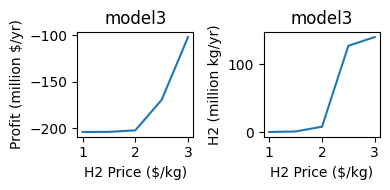

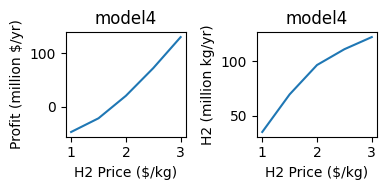

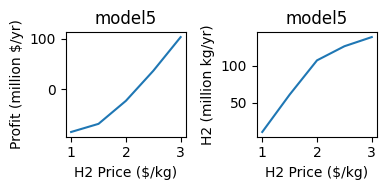

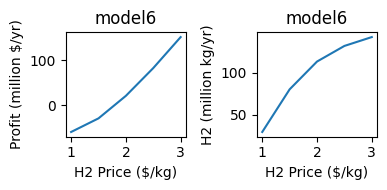

PJM_WEST_2019


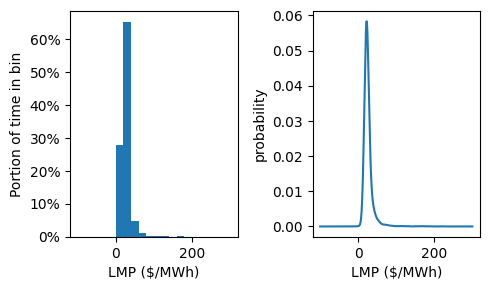

LMP Range ($/MWh) = (-52.9956, 746.5853)
LMP Median ($/MWh) = 23.12
LMP number of data = 8760
LMP Mean ($/MWh) = 26.38
LMP Variance = 526.92
LMP Skew = 17.225051333486615
LMP Kurtosis = 426.7838783220404
Bimodality Coefficient = 0.6926776376013237
Natural Gas Price ($/million BTU) = 2.43

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -182.43  -46.07  -48.95  -54.3
Fuel Cost (Million $/yr)      180.01  109.95  144.49    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      31.42   57.45    36.7    NaN
Hydrogen Capacity Factor (%)   63.21   21.12   62.98  58.91
Power (Million MWh/yr)          1.79    3.27    2.29   -3.7
Hydrogen (Million kg/yr)       99.68    33.3   99.31  92.89
Power only mode (%)            30.58   78.88   33.52    0.0
Hydrogen only mode (%)           0.0   21.12     0.0  86.37
Hydrogen + power mode (%)      69.42     0.0   66.48    0.0
Off mode (%)                     0.0     0.0     0.0  13.63


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -116.94   -10.1   16.19   13.29
Fuel Cost (Million $/yr)      180.48    60.4  144.91     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       0.43  -38.05    8.03     NaN
Hydrogen Capacity Factor (%)   91.79   68.52   91.71   92.62
Power (Million MWh/yr)          0.02   -2.17     0.5   -5.84
Hydrogen (Million kg/yr)      144.73  108.04   144.6  146.04
Power only mode (%)             7.79   31.48    8.09     0.0
Hydrogen only mode (%)           0.0   68.52     0.0   100.0
Hydrogen + power mode (%)      92.21     0.0   91.91     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -143.54  -46.96  -42.23   52.91    90.8   88.74
Fuel Cost (Million $/yr)        94.1  130.03  180.52   40.59  144.97     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      52.15    98.5   -4.78  -76.23    3.19     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   96.59   87.47   96.56   97.05
Power (Million MWh/yr)          2.97    5.61   -0.27   -4.34     0.2   -6.12
Hydrogen (Million kg/yr)         0.0     0.0   152.3  137.92  152.26  153.03
Power only mode (%)            52.18   100.0    3.21   12.53    3.25     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   87.47     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   96.79     0.0   96.75     0.0
Off mode (%)                   47.82     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          34.68  124.32  167.67  165.97
Fuel Cost (Million $/yr)      180.53    34.8  144.98     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.43  -87.38    1.71     NaN
Hydrogen Capacity Factor (%)    98.1    93.0   98.04   98.44
Power (Million MWh/yr)         -0.37   -4.98    0.11   -6.21
Hydrogen (Million kg/yr)      154.69  146.65  154.59  155.22
Power only mode (%)             1.82     7.0    1.86     0.0
Hydrogen only mode (%)           0.0    93.0     0.0   100.0
Hydrogen + power mode (%)      98.18     0.0   98.14     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         112.31  198.81  245.27   243.8
Fuel Cost (Million $/yr)      180.53   31.95  144.99     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.16  -92.88    0.99     NaN
Hydrogen Capacity Factor (%)   98.78   95.73   98.76   98.96
Power (Million MWh/yr)         -0.41   -5.29    0.06   -6.24
Hydrogen (Million kg/yr)      155.76  150.95  155.73  156.04
Power only mode (%)             1.19    4.27    1.22     0.0
Hydrogen only mode (%)           0.0   95.73     0.0   100.0
Hydrogen + power mode (%)      98.81     0.0   98.78     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

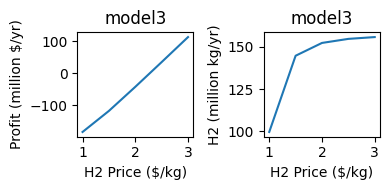

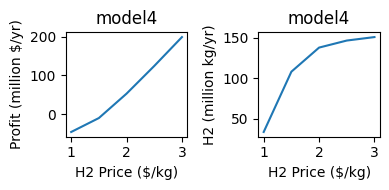

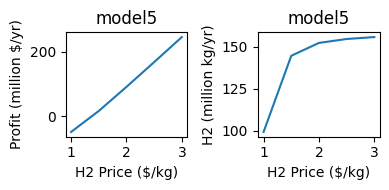

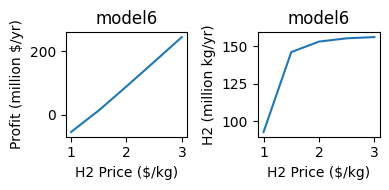

PJM_WEST_2022


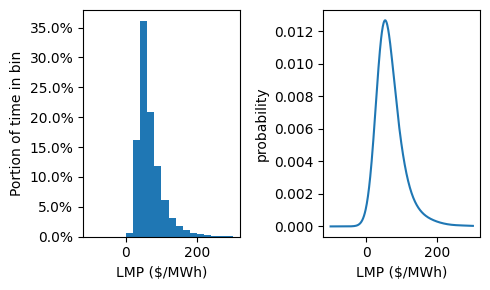

LMP Range ($/MWh) = (-20.2954, 3794.4313)
LMP Median ($/MWh) = 58.15
LMP number of data = 8760
LMP Mean ($/MWh) = 74.25
LMP Variance = 13977.97
LMP Skew = 19.788284108599896
LMP Kurtosis = 478.8549503091898
Bimodality Coefficient = 0.8147168569177807
Natural Gas Price ($/million BTU) = 7.04

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -96.35   86.55   83.41 -67.16
Fuel Cost (Million $/yr)      120.22  118.37  131.31    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      65.37   88.06   90.51    NaN
Hydrogen Capacity Factor (%)    0.03    1.35    0.34   0.31
Power (Million MWh/yr)          3.72    5.01    5.64  -0.02
Hydrogen (Million kg/yr)        0.04    2.14    0.54   0.48
Power only mode (%)            74.58   95.71   99.29    0.0
Hydrogen only mode (%)           0.0    4.29     0.0   0.39
Hydrogen + power mode (%)       0.03     0.0    0.71    0.0
Off mode (%)                   25.39     0.0     0.0  99.61


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)          -96.3   89.21   85.64 -65.58
Fuel Cost (Million $/yr)      120.33  117.93  138.89    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      65.33   80.11   84.29    NaN
Hydrogen Capacity Factor (%)    0.13    7.56   11.65   5.91
Power (Million MWh/yr)          3.72    4.56    5.26  -0.37
Hydrogen (Million kg/yr)         0.2   11.92   18.37   9.32
Power only mode (%)            74.44   90.33    85.9    0.0
Hydrogen only mode (%)           0.0    9.67     0.0   7.88
Hydrogen + power mode (%)       0.17     0.0    14.1    0.0
Off mode (%)                   25.39     0.0     0.0  92.12


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5 model6
Profit (Million $/yr)         -34.9   91.19  -91.86   100.6  104.44 -51.35
Fuel Cost (Million $/yr)      97.83  119.42  149.09  110.32  140.99    0.0
CO2 Tax (Million $/yr)          0.0     0.0     0.0     0.0     0.0    0.0
Power Capacity Factor (%)     54.22   90.53    60.6   58.16   63.18    NaN
Hydrogen Capacity Factor (%)    NaN     NaN   20.43   20.76   34.12  28.32
Power (Million MWh/yr)         3.09    5.15    3.45    3.31    3.94  -1.78
Hydrogen (Million kg/yr)        0.0     0.0   32.22   32.74    53.8  44.66
Power only mode (%)           54.22   99.29   57.37   79.24   63.05    0.0
Hydrogen only mode (%)          0.0     0.0     0.0   20.76     0.0  37.74
Hydrogen + power mode (%)       0.0     0.0    25.4     0.0   36.95    0.0
Off mode (%)                  45.78    0.71   17.23     0.0     0.0  62.26


H2 Price ($/kg) = 2.5


model3 model4  model5 model6
Profit (Million $/yr)         -55.16  122.2  141.49 -18.75
Fuel Cost (Million $/yr)      180.22  96.54  141.25    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      37.62   31.6   41.54    NaN
Hydrogen Capacity Factor (%)   57.48  33.95   55.81  53.04
Power (Million MWh/yr)          2.14    1.8    2.59  -3.34
Hydrogen (Million kg/yr)       90.63  53.53   87.99  83.63
Power only mode (%)             41.0  66.05   42.35    0.0
Hydrogen only mode (%)           0.0  33.95     0.0   68.8
Hydrogen + power mode (%)       59.0    0.0   57.65    0.0
Off mode (%)                     0.0    0.0     0.0   31.2


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          -4.34  154.06  191.74   31.14
Fuel Cost (Million $/yr)      180.31   83.36  141.42     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      23.54     6.2   27.91     NaN
Hydrogen Capacity Factor (%)   70.47   46.55   69.46   71.63
Power (Million MWh/yr)          1.34    0.35    1.74   -4.51
Hydrogen (Million kg/yr)      111.11    73.4  109.53  112.94
Power only mode (%)            27.43   53.45   29.52     0.0
Hydrogen only mode (%)           0.0   46.55     0.0    89.5
Hydrogen + power mode (%)      72.57     0.0   70.48     0.0
Off mode (%)                     0.0     0.0     0.0    10.5

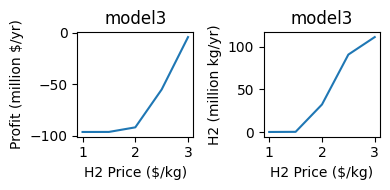

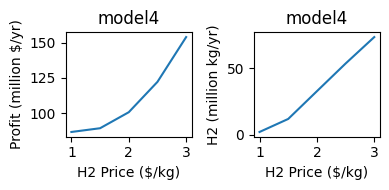

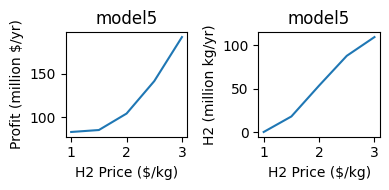

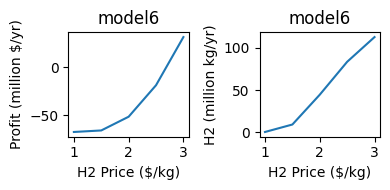

SPP_NORTH_2019


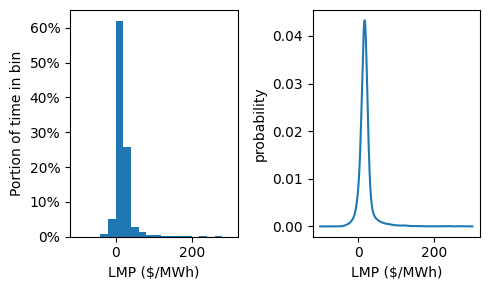

LMP Range ($/MWh) = (-46.4777, 1130.7242)
LMP Median ($/MWh) = 16.91
LMP number of data = 8760
LMP Mean ($/MWh) = 20.19
LMP Variance = 990.41
LMP Skew = 14.175490993196759
LMP Kurtosis = 356.62701599310435
Bimodality Coefficient = 0.5615372560348111
Natural Gas Price ($/million BTU) = 2.75

H2 Price ($/kg) = 1.0


model3  model4  model5  model6
Profit (Million $/yr)        -190.76  -34.73  -52.08  -14.39
Fuel Cost (Million $/yr)      179.97   62.52  131.02     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       9.17  -33.98    4.08     NaN
Hydrogen Capacity Factor (%)   83.46    66.5   84.19   85.11
Power (Million MWh/yr)          0.52   -1.93    0.25   -5.36
Hydrogen (Million kg/yr)      131.61  104.85  132.74  134.19
Power only mode (%)            14.34    33.5   14.54     0.0
Hydrogen only mode (%)           0.0    66.5     0.0   100.0
Hydrogen + power mode (%)      85.66     0.0   85.46     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -119.62   27.53   18.94    58.4
Fuel Cost (Million $/yr)      180.36   41.54  131.15     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -1.21  -74.41    -4.8     NaN
Hydrogen Capacity Factor (%)   93.18   86.56   93.08   94.18
Power (Million MWh/yr)         -0.07   -4.24    -0.3   -5.94
Hydrogen (Million kg/yr)      146.93  136.49  146.77  148.51
Power only mode (%)             6.66   13.44    6.84     0.0
Hydrogen only mode (%)           0.0   86.56     0.0   100.0
Hydrogen + power mode (%)      93.34     0.0   93.16     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -147.45  -79.6   -45.1   98.29   93.41  133.73
Fuel Cost (Million $/yr)       27.08   93.1  180.38   36.21  131.17     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      14.98  70.74    -3.8  -84.67   -7.13     NaN
Hydrogen Capacity Factor (%)     NaN    NaN   95.56   91.66   95.42   96.28
Power (Million MWh/yr)          0.85   4.03   -0.22   -4.82   -0.44   -6.07
Hydrogen (Million kg/yr)         0.0    0.0  150.69  144.52  150.46  151.82
Power only mode (%)            15.19  98.06    4.29    8.34    4.32     0.0
Hydrogen only mode (%)           0.0    0.0     0.0   91.66     0.0   100.0
Hydrogen + power mode (%)        0.0    0.0   95.71     0.0   95.68     0.0
Off mode (%)                   84.81   1.94     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          30.81   171.5  169.28  210.18
Fuel Cost (Million $/yr)      180.38   33.97  131.19     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -5.25  -88.99    -8.5     NaN
Hydrogen Capacity Factor (%)    96.9    93.8   96.79   97.39
Power (Million MWh/yr)          -0.3   -5.07   -0.53   -6.14
Hydrogen (Million kg/yr)       152.8  147.91  152.63  153.56
Power only mode (%)              3.0     6.2    3.15     0.0
Hydrogen only mode (%)           0.0    93.8     0.0   100.0
Hydrogen + power mode (%)       97.0     0.0   96.85     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         107.54  245.97  245.98  287.27
Fuel Cost (Million $/yr)      180.38   32.62   131.2     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.12  -91.59    -9.4     NaN
Hydrogen Capacity Factor (%)   97.71   95.09   97.69   98.08
Power (Million MWh/yr)         -0.35   -5.22   -0.59   -6.18
Hydrogen (Million kg/yr)      154.06  149.94  154.04  154.66
Power only mode (%)             2.23    4.91    2.27     0.0
Hydrogen only mode (%)           0.0   95.09     0.0   100.0
Hydrogen + power mode (%)      97.77     0.0   97.73     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

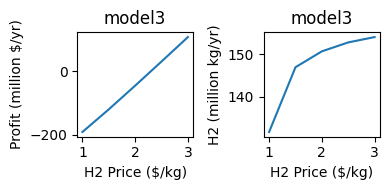

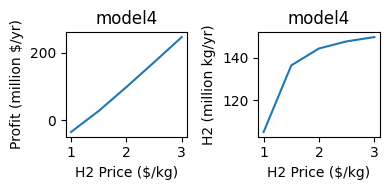

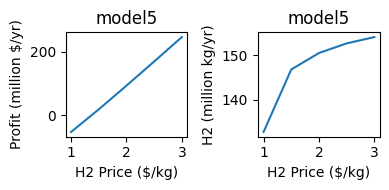

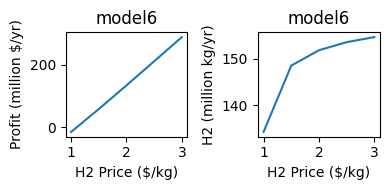

SPP_NORTH_2022


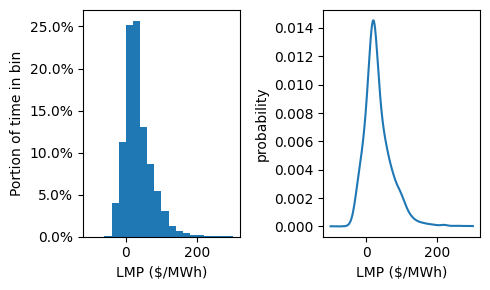

LMP Range ($/MWh) = (-102.7981, 1161.6271)
LMP Median ($/MWh) = 25.56
LMP number of data = 8760
LMP Mean ($/MWh) = 35.71
LMP Variance = 2510.18
LMP Skew = 5.229307547535627
LMP Kurtosis = 66.31681325471547
Bimodality Coefficient = 0.4089229699047369
Natural Gas Price ($/million BTU) = 8.21

H2 Price ($/kg) = 1.0


model3 model4 model5 model6
Profit (Million $/yr)        -202.58 -15.63 -83.02 -20.26
Fuel Cost (Million $/yr)       35.16  55.73  72.37    0.0
CO2 Tax (Million $/yr)           0.0    0.0    0.0    0.0
Power Capacity Factor (%)      18.35  -9.46   29.0    NaN
Hydrogen Capacity Factor (%)     0.0  42.29  18.23  45.42
Power (Million MWh/yr)          1.04  -0.54   1.81  -2.86
Hydrogen (Million kg/yr)         0.0  66.68  28.74  71.62
Power only mode (%)            26.83  40.38  54.46    0.0
Hydrogen only mode (%)           0.0  59.62    0.0  62.31
Hydrogen + power mode (%)        0.0    0.0   21.4    0.0
Off mode (%)                   73.17    0.0  24.13  37.69


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -202.42  24.97  -51.69  23.36
Fuel Cost (Million $/yr)       38.72  58.37  105.25    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      19.27  -28.8   11.05    NaN
Hydrogen Capacity Factor (%)    0.84  59.72   55.62  61.46
Power (Million MWh/yr)           1.1  -1.64    0.69  -3.87
Hydrogen (Million kg/yr)        1.33  94.16   87.71   96.9
Power only mode (%)            28.42  34.99   37.91    0.0
Hydrogen only mode (%)           0.0  65.01     0.0  77.15
Hydrogen + power mode (%)       1.12    0.0   62.09    0.0
Off mode (%)                   70.46    0.0     0.0  22.85


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -128.56 -64.96 -198.68   76.49    1.17   79.67
Fuel Cost (Million $/yr)       32.97  44.84   52.44   58.87  115.97     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      18.28  34.09   17.33  -40.86    0.79     NaN
Hydrogen Capacity Factor (%)     NaN    NaN     9.7   69.87   73.04   76.82
Power (Million MWh/yr)          1.04   1.94    0.99   -2.33    0.05   -4.84
Hydrogen (Million kg/yr)         0.0    0.0    15.3  110.18  115.17  121.13
Power only mode (%)            18.28  49.94   22.05   30.13   25.73     0.0
Hydrogen only mode (%)           0.0    0.0     0.0   69.87     0.0   95.21
Hydrogen + power mode (%)        0.0    0.0   12.89     0.0   74.27     0.0
Off mode (%)                   81.72  50.06   65.06     0.0     0.0    4.79


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)        -163.16  133.36   62.16  143.25
Fuel Cost (Million $/yr)      180.17   54.21  116.06     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      12.47  -49.99   -6.76     NaN
Hydrogen Capacity Factor (%)   80.49   74.44   80.61   83.87
Power (Million MWh/yr)          0.71   -2.85   -0.42   -5.28
Hydrogen (Million kg/yr)      126.91  117.38  127.11  132.24
Power only mode (%)            18.03   25.56   18.25     0.0
Hydrogen only mode (%)           0.0   74.44     0.0   98.46
Hydrogen + power mode (%)      81.97     0.0   81.75     0.0
Off mode (%)                     0.0     0.0     0.0    1.54


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         -96.99  193.76  128.05  211.31
Fuel Cost (Million $/yr)      180.22   49.82  116.12     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       6.12  -58.45   -11.9     NaN
Hydrogen Capacity Factor (%)   86.35   78.64   85.76   88.65
Power (Million MWh/yr)          0.35   -3.33   -0.74   -5.58
Hydrogen (Million kg/yr)      136.16   124.0  135.23  139.79
Power only mode (%)             12.8   21.36    13.3     0.0
Hydrogen only mode (%)           0.0   78.64     0.0   100.0
Hydrogen + power mode (%)       87.2     0.0    86.7     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

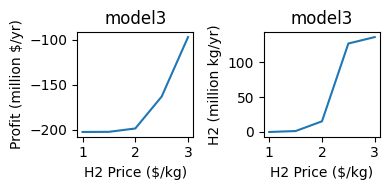

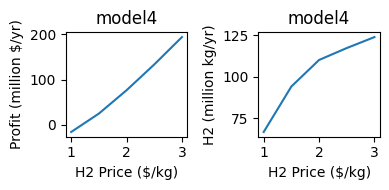

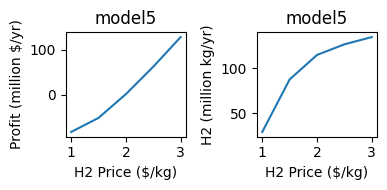

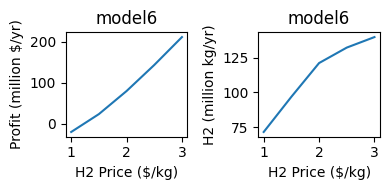

SPP_SOUTH_2019


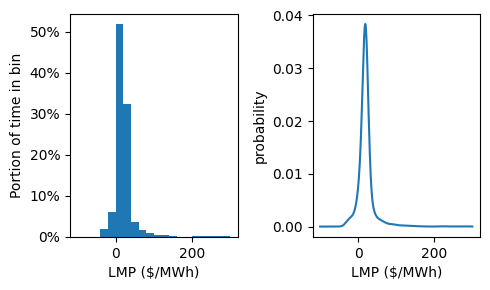

LMP Range ($/MWh) = (-43.7243, 1210.5837)
LMP Median ($/MWh) = 18.47
LMP number of data = 8760
LMP Mean ($/MWh) = 21.48
LMP Variance = 1247.35
LMP Skew = 13.09555612513164
LMP Kurtosis = 308.4080228080311
Bimodality Coefficient = 0.5539132208782366
Natural Gas Price ($/million BTU) = 2.83

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -188.07 -27.51  -46.04  -17.09
Fuel Cost (Million $/yr)      179.22  70.27  132.12     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      14.02 -19.03     9.2     NaN
Hydrogen Capacity Factor (%)   78.55  59.08   79.45   80.43
Power (Million MWh/yr)           0.8  -1.08    0.57   -5.06
Hydrogen (Million kg/yr)      123.86  93.15  125.28  126.82
Power only mode (%)            17.44  40.92   19.79     0.0
Hydrogen only mode (%)           0.0  59.08     0.0   98.12
Hydrogen + power mode (%)      82.56    0.0   80.21     0.0
Off mode (%)                     0.0    0.0     0.0    1.88


H2 Price ($/kg) = 1.5


model3 model4  model5  model6
Profit (Million $/yr)        -118.81  30.79   23.08   54.11
Fuel Cost (Million $/yr)      180.38  44.58  132.26     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)       0.57 -68.55   -2.82     NaN
Hydrogen Capacity Factor (%)   91.56  83.65    91.5    92.9
Power (Million MWh/yr)          0.03   -3.9   -0.18   -5.86
Hydrogen (Million kg/yr)      144.37  131.9  144.28  146.49
Power only mode (%)             8.26  16.35    8.34     0.0
Hydrogen only mode (%)           0.0  83.65     0.0   100.0
Hydrogen + power mode (%)      91.74    0.0   91.66     0.0
Off mode (%)                     0.0    0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -142.08 -72.12  -45.32   99.71   96.51  128.61
Fuel Cost (Million $/yr)       32.38  98.42   180.4   38.13   132.3     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      17.92  74.74   -2.59  -80.97   -5.74     NaN
Hydrogen Capacity Factor (%)     NaN    NaN   94.46   89.82   94.42   95.45
Power (Million MWh/yr)          1.02   4.26   -0.15   -4.61   -0.36   -6.02
Hydrogen (Million kg/yr)         0.0    0.0  148.95  141.62  148.89  150.51
Power only mode (%)            18.12  98.17    5.35   10.18    5.53     0.0
Hydrogen only mode (%)           0.0    0.0     0.0   89.82     0.0   100.0
Hydrogen + power mode (%)        0.0    0.0   94.65     0.0   94.47     0.0
Off mode (%)                   81.88   1.83     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          29.86  171.64  171.64  204.45
Fuel Cost (Million $/yr)       180.4   35.58  132.31     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       -4.4  -85.89   -7.41     NaN
Hydrogen Capacity Factor (%)   96.14   92.26    96.1   96.82
Power (Million MWh/yr)         -0.25   -4.89   -0.46    -6.1
Hydrogen (Million kg/yr)      151.59  145.48  151.52  152.67
Power only mode (%)              3.7    7.74    3.86     0.0
Hydrogen only mode (%)           0.0   92.26     0.0   100.0
Hydrogen + power mode (%)       96.3     0.0   96.14     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         106.14  245.12  247.88  281.17
Fuel Cost (Million $/yr)      180.41   33.79  132.33     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -5.52  -89.34   -8.44     NaN
Hydrogen Capacity Factor (%)   97.17   93.97   97.13   97.68
Power (Million MWh/yr)         -0.31   -5.09   -0.53   -6.16
Hydrogen (Million kg/yr)      153.22  148.18  153.15  154.02
Power only mode (%)             2.75    6.03    2.85     0.0
Hydrogen only mode (%)           0.0   93.97     0.0   100.0
Hydrogen + power mode (%)      97.25     0.0   97.15     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

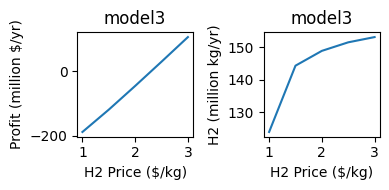

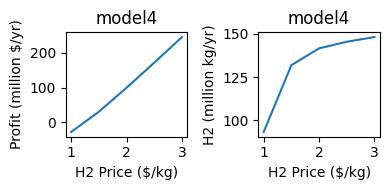

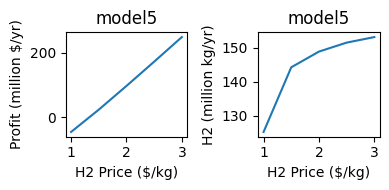

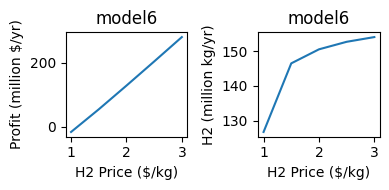

SPP_SOUTH_2022


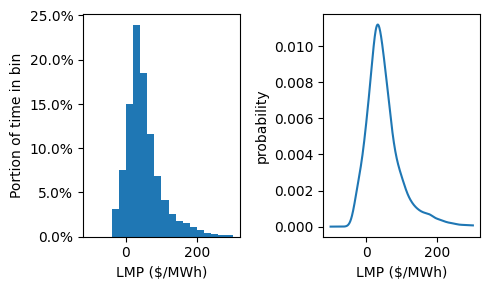

LMP Range ($/MWh) = (-38.083, 1356.8784)
LMP Median ($/MWh) = 40.44
LMP number of data = 8760
LMP Mean ($/MWh) = 52.44
LMP Variance = 3664.02
LMP Skew = 4.1162266289033775
LMP Kurtosis = 45.579058340453784
Bimodality Coefficient = 0.36935549296723025
Natural Gas Price ($/million BTU) = 7.61

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -154.6  40.63   -1.48 -43.01
Fuel Cost (Million $/yr)      66.89  77.04  104.37    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0    0.0
Power Capacity Factor (%)     34.91  24.31   48.44    NaN
Hydrogen Capacity Factor (%)   0.38  27.89   20.66  26.36
Power (Million MWh/yr)         1.99   1.38    3.02  -1.65
Hydrogen (Million kg/yr)        0.6  43.98   32.58  41.56
Power only mode (%)           47.82  60.19   76.23    0.0
Hydrogen only mode (%)          0.0  39.81     0.0   40.7
Hydrogen + power mode (%)       0.5    0.0   23.77    0.0
Off mode (%)                  51.68    0.0     0.0   59.3


H2 Price ($/kg) = 1.5


model3 model4  model5 model6
Profit (Million $/yr)        -153.21  67.87   21.72 -15.06
Fuel Cost (Million $/yr)       72.07   78.4  117.78    0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0    0.0
Power Capacity Factor (%)      34.13   8.04   35.79    NaN
Hydrogen Capacity Factor (%)    3.76   42.0   41.71  43.87
Power (Million MWh/yr)          1.94   0.46    2.23  -2.76
Hydrogen (Million kg/yr)        5.92  66.23   65.77  69.18
Power only mode (%)            45.42  53.88   51.59    0.0
Hydrogen only mode (%)           0.0  46.12     0.0  62.24
Hydrogen + power mode (%)       4.99    0.0   48.41    0.0
Off mode (%)                   49.59    0.0     0.0  37.76


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5 model6
Profit (Million $/yr)        -78.15   2.89 -145.21  106.06   63.33  26.18
Fuel Cost (Million $/yr)      56.86  73.99  110.64   76.29  124.85    0.0
CO2 Tax (Million $/yr)          0.0    0.0     0.0     0.0     0.0    0.0
Power Capacity Factor (%)     31.52  56.21   32.28   -7.43   23.11    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   25.97   53.32   59.09  59.95
Power (Million MWh/yr)         1.79    3.2    1.84   -0.42    1.44  -3.77
Hydrogen (Million kg/yr)        0.0    0.0   40.95   84.08   93.18  94.54
Power only mode (%)           31.52  76.71   35.14   46.68   39.11    0.0
Hydrogen only mode (%)          0.0    0.0     0.0   53.32     0.0  79.73
Hydrogen + power mode (%)       0.0    0.0   30.07     0.0   60.89    0.0
Off mode (%)                  68.48  23.29   34.79     0.0     0.0  20.27


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)         -99.03  150.8  114.83   79.52
Fuel Cost (Million $/yr)      180.21  69.25   125.0     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      23.04  -21.0    12.2     NaN
Hydrogen Capacity Factor (%)   70.82  60.06   70.03   72.77
Power (Million MWh/yr)          1.31   -1.2    0.76   -4.58
Hydrogen (Million kg/yr)      111.66   94.7  110.42  114.75
Power only mode (%)            28.39  39.94   29.17     0.0
Hydrogen only mode (%)           0.0  60.06     0.0   91.03
Hydrogen + power mode (%)      71.61    0.0   70.83     0.0
Off mode (%)                     0.0    0.0     0.0    8.97


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         -40.05  200.61   173.5  140.38
Fuel Cost (Million $/yr)      180.26   63.04  125.09     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      15.31  -32.96    4.54     NaN
Hydrogen Capacity Factor (%)   77.94   65.99    77.7   81.45
Power (Million MWh/yr)          0.87   -1.88    0.28   -5.13
Hydrogen (Million kg/yr)      122.89  104.06  122.51  128.44
Power only mode (%)            20.95   34.01   21.88     0.0
Hydrogen only mode (%)           0.0   65.99     0.0   98.24
Hydrogen + power mode (%)      79.05     0.0   78.12     0.0
Off mode (%)                     0.0     0.0     0.0    1.76

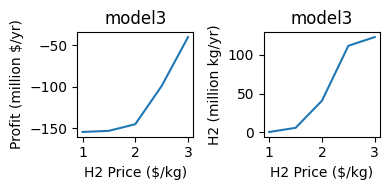

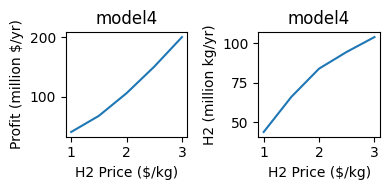

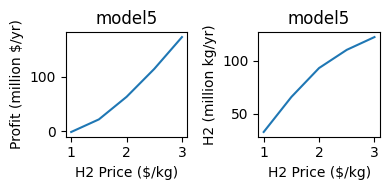

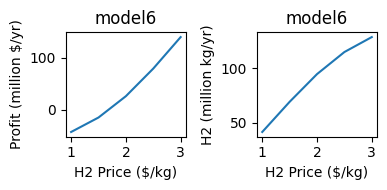

MiNg_$100_CAISO_2035


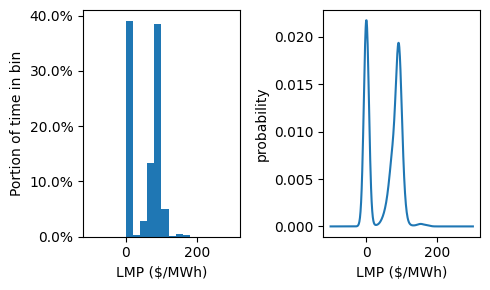

LMP Range ($/MWh) = (0.0, 178.28)
LMP Median ($/MWh) = 73.59
LMP number of data = 8736
LMP Mean ($/MWh) = 52.97
LMP Variance = 1911.58
LMP Skew = -0.1997658186395115
LMP Kurtosis = -1.5684730842450734
Bimodality Coefficient = 0.7259089854405625
Natural Gas Price ($/million BTU) = 2.26

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)          15.46  184.98  171.85 -26.71
Fuel Cost (Million $/yr)      180.33   91.12  126.23    0.0
CO2 Tax (Million $/yr)         12.77    4.43    6.14    0.0
Power Capacity Factor (%)      57.34   21.15   43.07    NaN
Hydrogen Capacity Factor (%)   39.21   39.14   39.21  34.15
Power (Million MWh/yr)          3.26     1.2    2.69  -2.15
Hydrogen (Million kg/yr)       61.83   61.71   61.82  53.84
Power only mode (%)            60.78   60.86   60.78    0.0
Hydrogen only mode (%)           0.0   39.14     0.0  41.66
Hydrogen + power mode (%)      39.22     0.0   39.22    0.0
Off mode (%)                     0.0     0.0     0.0  58.34


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)          46.43  215.87  202.83   3.53
Fuel Cost (Million $/yr)      180.33   91.03  126.23    0.0
CO2 Tax (Million $/yr)         12.77    4.43    6.14    0.0
Power Capacity Factor (%)       57.2   20.98   42.93    NaN
Hydrogen Capacity Factor (%)   39.35   39.22   39.35  41.25
Power (Million MWh/yr)          3.26    1.19    2.68  -2.59
Hydrogen (Million kg/yr)       62.04   61.84   62.04  65.05
Power only mode (%)            60.63   60.78   60.63    0.0
Hydrogen only mode (%)           0.0   39.22     0.0  55.77
Hydrogen + power mode (%)      39.37     0.0   39.37    0.0
Off mode (%)                     0.0     0.0     0.0  44.23


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5 model6
Profit (Million $/yr)          51.36  129.69   77.75  246.82  234.11  36.92
Fuel Cost (Million $/yr)      109.76   88.65  180.32   90.94  126.23    0.0
CO2 Tax (Million $/yr)          7.77    4.31   12.77    4.43    6.14    0.0
Power Capacity Factor (%)      60.83   67.25   56.21    20.8   42.13    NaN
Hydrogen Capacity Factor (%)     NaN     NaN   40.25   39.31   40.15  43.34
Power (Million MWh/yr)          3.46    3.83     3.2    1.18    2.63  -2.72
Hydrogen (Million kg/yr)         0.0     0.0   63.47   61.98   63.31  68.34
Power only mode (%)            60.85   81.89   59.55   60.69   59.79    0.0
Hydrogen only mode (%)           0.0     0.0     0.0   39.31     0.0  61.81
Hydrogen + power mode (%)        0.0     0.0   40.45     0.0   40.21    0.0
Off mode (%)                   39.15   18.11     0.0     0.0     0.0  38.19


H2 Price ($/kg) = 2.5


model3  model4  model5 model6
Profit (Million $/yr)         110.54  277.83  266.81  72.33
Fuel Cost (Million $/yr)      180.31   90.88  126.26    0.0
CO2 Tax (Million $/yr)         12.77    4.42    6.15    0.0
Power Capacity Factor (%)      52.87   20.68   39.06    NaN
Hydrogen Capacity Factor (%)   43.34   39.37   43.22  47.32
Power (Million MWh/yr)          3.01    1.18    2.44  -2.97
Hydrogen (Million kg/yr)       68.33   62.07   68.15  74.62
Power only mode (%)            56.28   60.63   56.51    0.0
Hydrogen only mode (%)           0.0   39.37     0.0  72.23
Hydrogen + power mode (%)      43.72     0.0   43.49    0.0
Off mode (%)                     0.0     0.0     0.0  27.77


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          147.8  309.03   303.7  113.87
Fuel Cost (Million $/yr)      180.27   90.36  126.35     0.0
CO2 Tax (Million $/yr)         12.76     4.4    6.15     0.0
Power Capacity Factor (%)      42.55   19.69   29.88     NaN
Hydrogen Capacity Factor (%)   52.85   39.86   52.42   58.37
Power (Million MWh/yr)          2.42    1.12    1.86   -3.66
Hydrogen (Million kg/yr)       83.33   62.85   82.66   92.04
Power only mode (%)            46.01   60.14   47.29     0.0
Hydrogen only mode (%)           0.0   39.86     0.0   90.88
Hydrogen + power mode (%)      53.99     0.0   52.71     0.0
Off mode (%)                     0.0     0.0     0.0    9.12

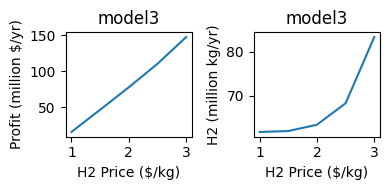

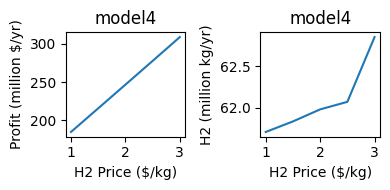

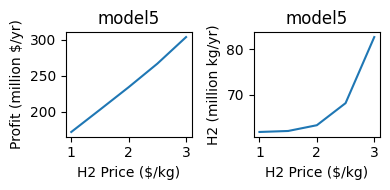

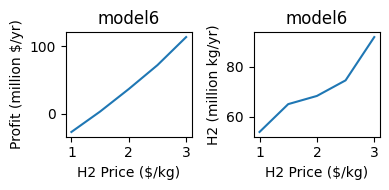

MiNg_$150_CAISO_2035


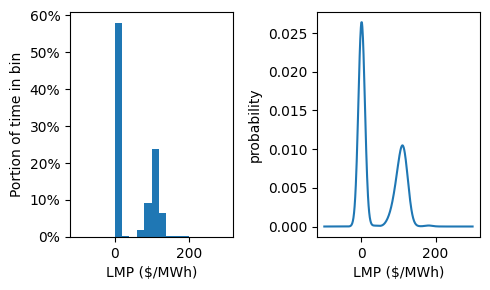

LMP Range ($/MWh) = (0.0, 203.01)
LMP Median ($/MWh) = 1.53
LMP number of data = 8736
LMP Mean ($/MWh) = 45.35
LMP Variance = 2887.93
LMP Skew = 0.4435965462659929
LMP Kurtosis = -1.6436534138090884
Bimodality Coefficient = 0.8816841011891938
Natural Gas Price ($/million BTU) = 2.26

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)           0.89  180.57  157.45   2.67
Fuel Cost (Million $/yr)      180.29    71.2  117.26    0.0
CO2 Tax (Million $/yr)         19.15    5.04     8.3    0.0
Power Capacity Factor (%)       36.7  -17.23   15.51    NaN
Hydrogen Capacity Factor (%)   58.18   58.18   58.18  53.64
Power (Million MWh/yr)          2.09   -0.98    0.97  -3.38
Hydrogen (Million kg/yr)       91.75   91.75   91.75  84.58
Power only mode (%)            41.82   41.82   41.82    0.0
Hydrogen only mode (%)           0.0   58.18     0.0  59.18
Hydrogen + power mode (%)      58.18     0.0   58.18    0.0
Off mode (%)                     0.0     0.0     0.0  40.82


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)           46.8  226.44  203.35  47.32
Fuel Cost (Million $/yr)      180.28    71.2  117.26    0.0
CO2 Tax (Million $/yr)         19.15    5.04     8.3    0.0
Power Capacity Factor (%)      36.52  -17.23   15.34    NaN
Hydrogen Capacity Factor (%)   58.35   58.18   58.35  59.18
Power (Million MWh/yr)          2.08   -0.98    0.96  -3.73
Hydrogen (Million kg/yr)       92.01   91.75   92.01  93.32
Power only mode (%)            41.62   41.82   41.63    0.0
Hydrogen only mode (%)           0.0   58.18     0.0  69.76
Hydrogen + power mode (%)      58.38     0.0   58.37    0.0
Off mode (%)                     0.0     0.0     0.0  30.24


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5 model6
Profit (Million $/yr)         31.02  100.4   92.86  272.32  249.41  94.88
Fuel Cost (Million $/yr)      75.44  62.63  180.29   71.18  117.27    0.0
CO2 Tax (Million $/yr)         8.01   4.43   19.15    5.04     8.3    0.0
Power Capacity Factor (%)     41.82  47.54   36.43  -17.28   15.26    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   58.44   58.21   58.44  60.76
Power (Million MWh/yr)         2.38   2.71    2.07   -0.98    0.95  -3.83
Hydrogen (Million kg/yr)        0.0    0.0   92.15   91.78   92.14  95.81
Power only mode (%)           41.82  60.59   41.55   41.79   41.56    0.0
Hydrogen only mode (%)          0.0    0.0     0.0   58.21     0.0  73.37
Hydrogen + power mode (%)       0.0    0.0   58.45     0.0   58.44    0.0
Off mode (%)                  58.18  39.41     0.0     0.0     0.0  26.63


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         138.94  318.28  295.49  143.34
Fuel Cost (Million $/yr)      180.29   70.98  117.27     0.0
CO2 Tax (Million $/yr)         19.15    5.02     8.3     0.0
Power Capacity Factor (%)      36.36  -17.67   15.18     NaN
Hydrogen Capacity Factor (%)    58.5    58.4   58.51    61.8
Power (Million MWh/yr)          2.07   -1.01    0.95   -3.89
Hydrogen (Million kg/yr)       92.25   92.09   92.26   97.44
Power only mode (%)            41.47    41.6   41.47     0.0
Hydrogen only mode (%)           0.0    58.4     0.0   76.98
Hydrogen + power mode (%)      58.53     0.0   58.53     0.0
Off mode (%)                     0.0     0.0     0.0   23.02


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         185.34  364.34  341.85  192.83
Fuel Cost (Million $/yr)      180.28   70.95  117.27     0.0
CO2 Tax (Million $/yr)         19.14    5.02     8.3     0.0
Power Capacity Factor (%)      35.31  -17.72   14.31     NaN
Hydrogen Capacity Factor (%)   59.47   58.42   59.38   63.31
Power (Million MWh/yr)          2.01   -1.01    0.89   -3.98
Hydrogen (Million kg/yr)       93.78   92.12   93.63   99.83
Power only mode (%)             40.4   41.58   40.54     0.0
Hydrogen only mode (%)           0.0   58.42     0.0   81.67
Hydrogen + power mode (%)       59.6     0.0   59.46     0.0
Off mode (%)                     0.0     0.0     0.0   18.33

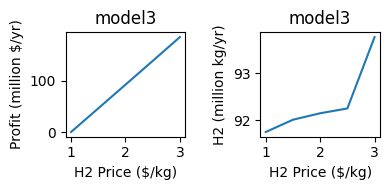

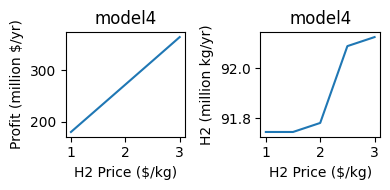

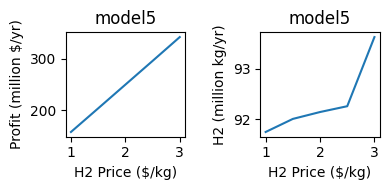

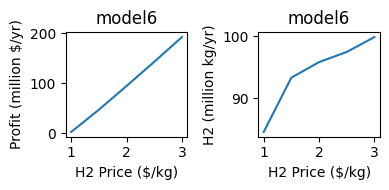

MiNg_$100_ERCOT_2035


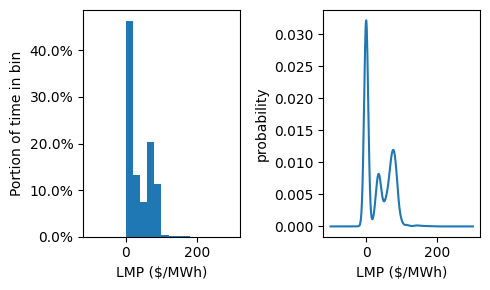

LMP Range ($/MWh) = (0.0, 186.42)
LMP Median ($/MWh) = 30.38
LMP number of data = 8736
LMP Mean ($/MWh) = 33.66
LMP Variance = 1246.05
LMP Skew = 0.4825540766773487
LMP Kurtosis = -0.9452830591591113
Bimodality Coefficient = 0.5997129533749265
Natural Gas Price ($/million BTU) = 2.64

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)        -97.16  85.96   56.12 -11.15
Fuel Cost (Million $/yr)      180.3  83.47  122.65    0.0
CO2 Tax (Million $/yr)        10.93   3.48    5.11    0.0
Power Capacity Factor (%)     48.77   6.41   31.24    NaN
Hydrogen Capacity Factor (%)  47.09  46.45   47.05  51.01
Power (Million MWh/yr)         2.78   0.36    1.95  -3.21
Hydrogen (Million kg/yr)      74.26  73.24   74.18  80.44
Power only mode (%)           52.69  53.55   52.77    0.0
Hydrogen only mode (%)          0.0  46.45     0.0  70.17
Hydrogen + power mode (%)     47.31    0.0   47.23    0.0
Off mode (%)                    0.0    0.0     0.0  29.83


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)         -56.59  122.89   96.45  32.57
Fuel Cost (Million $/yr)      180.23   82.55  122.74    0.0
CO2 Tax (Million $/yr)         10.92    3.44    5.11    0.0
Power Capacity Factor (%)      36.65    4.63    20.7    NaN
Hydrogen Capacity Factor (%)   58.27   47.33   57.61  59.65
Power (Million MWh/yr)          2.09    0.26    1.29  -3.75
Hydrogen (Million kg/yr)       91.88   74.63   90.84  94.06
Power only mode (%)             40.9   52.67   41.83    0.0
Hydrogen only mode (%)           0.0   47.33     0.0  76.74
Hydrogen + power mode (%)       59.1     0.0   58.17    0.0
Off mode (%)                     0.0     0.0     0.0  23.26


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -56.52  16.29   -8.07  161.88  144.87   83.91
Fuel Cost (Million $/yr)       95.8  83.01  180.32   77.22  122.82     0.0
CO2 Tax (Million $/yr)         5.81   3.46   10.93    3.22    5.12     0.0
Power Capacity Factor (%)     53.09  63.04   30.87   -5.63   14.79     NaN
Hydrogen Capacity Factor (%)    NaN    NaN    63.6   52.43   63.52   67.38
Power (Million MWh/yr)         3.02   3.59    1.76   -0.32    0.92   -4.24
Hydrogen (Million kg/yr)        0.0    0.0  100.28   82.67  100.17  106.24
Power only mode (%)           53.14  84.57   36.16   47.57    36.4     0.0
Hydrogen only mode (%)          0.0    0.0     0.0   52.43     0.0   84.73
Hydrogen + power mode (%)       0.0    0.0   63.84     0.0    63.6     0.0
Off mode (%)                  46.86  15.43     0.0     0.0     0.0   15.27


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          44.21  206.34  196.95  139.45
Fuel Cost (Million $/yr)      180.29   69.41  122.86     0.0
CO2 Tax (Million $/yr)         10.93    2.89    5.12     0.0
Power Capacity Factor (%)      24.39  -20.69    9.27     NaN
Hydrogen Capacity Factor (%)   69.57    59.9   69.05   74.11
Power (Million MWh/yr)          1.39   -1.18    0.58   -4.66
Hydrogen (Million kg/yr)       109.7   94.45  108.89  116.85
Power only mode (%)            29.45    40.1   30.43     0.0
Hydrogen only mode (%)           0.0    59.9     0.0   96.68
Hydrogen + power mode (%)      70.55     0.0   69.57     0.0
Off mode (%)                     0.0     0.0     0.0    3.32


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         103.92  254.74  256.15  202.02
Fuel Cost (Million $/yr)      180.27   66.37   123.0     0.0
CO2 Tax (Million $/yr)         10.93    2.77    5.13     0.0
Power Capacity Factor (%)       9.44  -26.55   -4.28     NaN
Hydrogen Capacity Factor (%)   83.36   62.81   82.63   85.34
Power (Million MWh/yr)          0.54   -1.51   -0.27   -5.37
Hydrogen (Million kg/yr)      131.43   99.04   130.3  134.56
Power only mode (%)             15.1   37.19   16.86     0.0
Hydrogen only mode (%)           0.0   62.81     0.0   100.0
Hydrogen + power mode (%)       84.9     0.0   83.14     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

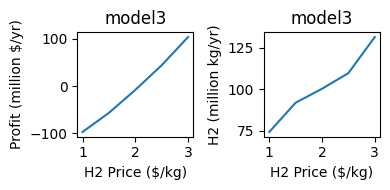

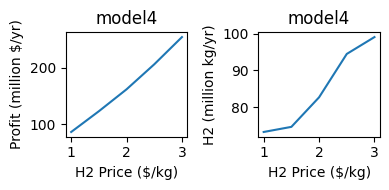

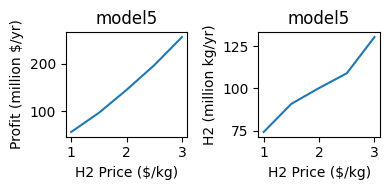

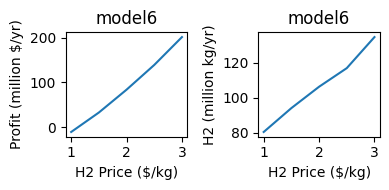

MiNg_$150_ERCOT_2035


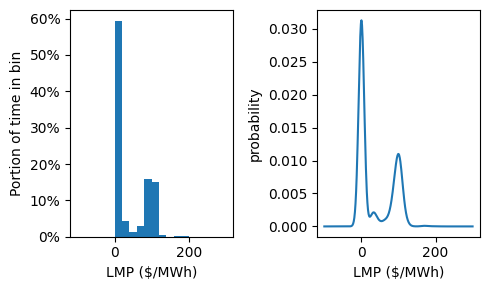

LMP Range ($/MWh) = (0.0, 204.49)
LMP Median ($/MWh) = 0.18
LMP number of data = 8736
LMP Mean ($/MWh) = 36.18
LMP Variance = 2171.96
LMP Skew = 0.6605780505032979
LMP Kurtosis = -1.3138297857964534
Bimodality Coefficient = 0.8513292179759123
Natural Gas Price ($/million BTU) = 2.64

H2 Price ($/kg) = 1.0


model3 model4  model5 model6
Profit (Million $/yr)         -62.52  129.2   95.84  10.15
Fuel Cost (Million $/yr)      180.28  69.78  116.41    0.0
CO2 Tax (Million $/yr)         16.39   4.23    7.06    0.0
Power Capacity Factor (%)      35.03 -19.98   12.45    NaN
Hydrogen Capacity Factor (%)   59.72  59.55    59.7  59.84
Power (Million MWh/yr)          1.99  -1.14    0.78  -3.77
Hydrogen (Million kg/yr)       94.17  93.89   94.14  94.36
Power only mode (%)            40.14  40.45   40.26    0.0
Hydrogen only mode (%)           0.0  59.55     0.0  66.07
Hydrogen + power mode (%)      59.86    0.0   59.74    0.0
Off mode (%)                     0.0    0.0     0.0  33.93


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)         -14.01  176.23  144.28  57.75
Fuel Cost (Million $/yr)      180.27   69.46  116.45    0.0
CO2 Tax (Million $/yr)         16.39    4.21    7.06    0.0
Power Capacity Factor (%)      30.92   -20.6    8.68    NaN
Hydrogen Capacity Factor (%)   63.51   59.86   63.48  61.27
Power (Million MWh/yr)          1.76   -1.17    0.54  -3.86
Hydrogen (Million kg/yr)      100.14   94.38  100.09  96.61
Power only mode (%)            36.32   40.14   36.46    0.0
Hydrogen only mode (%)           0.0   59.86     0.0  68.85
Hydrogen + power mode (%)      63.68     0.0   63.54    0.0
Off mode (%)                     0.0     0.0     0.0  31.15


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -23.72  41.94   36.57  224.16  194.83  107.89
Fuel Cost (Million $/yr)      72.81  62.99  180.28   67.16  116.46     0.0
CO2 Tax (Million $/yr)         6.62   3.82   16.39    4.07    7.06     0.0
Power Capacity Factor (%)     40.35  47.84   29.56  -25.03    7.37     NaN
Hydrogen Capacity Factor (%)    NaN    NaN   64.77   62.05    64.8   65.99
Power (Million MWh/yr)          2.3   2.72    1.68   -1.43    0.46   -4.15
Hydrogen (Million kg/yr)        0.0    0.0  102.12   97.85  102.17  104.06
Power only mode (%)           40.36  64.53   35.18   37.95   35.18     0.0
Hydrogen only mode (%)          0.0    0.0     0.0   62.05     0.0   79.41
Hydrogen + power mode (%)       0.0    0.0   64.82     0.0   64.82     0.0
Off mode (%)                  59.64  35.47     0.0     0.0     0.0   20.59


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          87.84  273.96  246.08  162.02
Fuel Cost (Million $/yr)      180.28   65.28  116.47     0.0
CO2 Tax (Million $/yr)         16.39    3.96    7.06     0.0
Power Capacity Factor (%)      28.64  -28.65    6.61     NaN
Hydrogen Capacity Factor (%)   65.61   63.85   65.56   70.16
Power (Million MWh/yr)          1.63   -1.63    0.41   -4.41
Hydrogen (Million kg/yr)      103.45  100.68  103.37  110.63
Power only mode (%)             34.2   36.15   34.41     0.0
Hydrogen only mode (%)           0.0   63.85     0.0   90.44
Hydrogen + power mode (%)       65.8     0.0   65.59     0.0
Off mode (%)                     0.0     0.0     0.0    9.56


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         140.15  324.49  298.34  218.26
Fuel Cost (Million $/yr)      180.28   64.75  116.48     0.0
CO2 Tax (Million $/yr)         16.39    3.92    7.06     0.0
Power Capacity Factor (%)      27.17  -29.66    5.35     NaN
Hydrogen Capacity Factor (%)   66.97   64.35   66.82   72.62
Power (Million MWh/yr)          1.55   -1.69    0.33   -4.57
Hydrogen (Million kg/yr)      105.59  101.47  105.37  114.51
Power only mode (%)            32.66   35.65   33.01     0.0
Hydrogen only mode (%)           0.0   64.35     0.0   96.62
Hydrogen + power mode (%)      67.34     0.0   66.99     0.0
Off mode (%)                     0.0     0.0     0.0    3.38

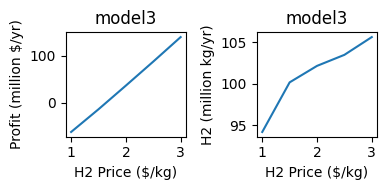

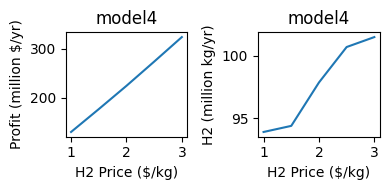

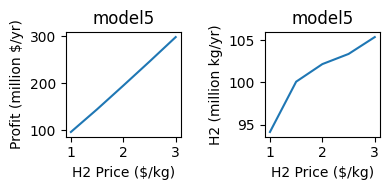

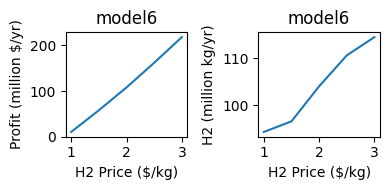

MiNg_$100_MISO-W_2035


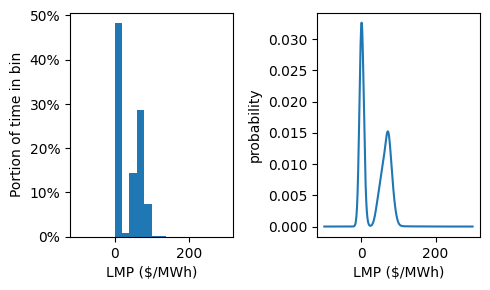

LMP Range ($/MWh) = (0.0, 145.07)
LMP Median ($/MWh) = 42.12
LMP number of data = 8736
LMP Mean ($/MWh) = 35.12
LMP Variance = 1186.73
LMP Skew = 0.14291561800297473
LMP Kurtosis = -1.7150217753402428
Bimodality Coefficient = 0.7934820072558115
Natural Gas Price ($/million BTU) = 1.69

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -49.74  111.38   91.33  -2.81
Fuel Cost (Million $/yr)      180.31   81.48  122.59    0.0
CO2 Tax (Million $/yr)         17.07     5.3    7.98    0.0
Power Capacity Factor (%)      47.37    2.58   30.82    NaN
Hydrogen Capacity Factor (%)   48.37   48.35   48.37  49.78
Power (Million MWh/yr)           2.7    0.15    1.92  -3.14
Hydrogen (Million kg/yr)       76.28   76.24   76.28  78.49
Power only mode (%)            51.63   51.65   51.63    0.0
Hydrogen only mode (%)           0.0   48.35     0.0  56.54
Hydrogen + power mode (%)      48.37     0.0   48.37    0.0
Off mode (%)                     0.0     0.0     0.0  43.46


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -11.54  149.52  129.52  36.59
Fuel Cost (Million $/yr)      180.3   81.46   122.6    0.0
CO2 Tax (Million $/yr)        17.07     5.3    7.98    0.0
Power Capacity Factor (%)      46.9    2.53   30.44    NaN
Hydrogen Capacity Factor (%)  48.81   48.37   48.75  50.34
Power (Million MWh/yr)         2.67    0.14     1.9  -3.17
Hydrogen (Million kg/yr)      76.96   76.28   76.87  79.37
Power only mode (%)           51.03   51.63   51.21    0.0
Hydrogen only mode (%)          0.0   48.37     0.0  58.73
Hydrogen + power mode (%)     48.97     0.0   48.79    0.0
Off mode (%)                    0.0     0.0     0.0  41.27


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5 model6
Profit (Million $/yr)        -27.51  42.91   28.91  187.66  169.83  77.91
Fuel Cost (Million $/yr)      93.18  81.14  180.28   81.45  122.65    0.0
CO2 Tax (Million $/yr)         8.82   5.28   17.07     5.3    7.98    0.0
Power Capacity Factor (%)     51.65  61.62   40.48    2.51   24.75    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   54.73   48.39   54.46  55.64
Power (Million MWh/yr)         2.94   3.51    2.31    0.14    1.54   -3.5
Hydrogen (Million kg/yr)        0.0    0.0    86.3    76.3   85.87  87.73
Power only mode (%)           51.65  83.85   44.62   51.61   45.43    0.0
Hydrogen only mode (%)          0.0    0.0     0.0   48.39     0.0  68.21
Hydrogen + power mode (%)       0.0    0.0   55.38     0.0   54.57    0.0
Off mode (%)                  48.35  16.15     0.0     0.0     0.0  31.79


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)          76.69  225.9  217.25  126.81
Fuel Cost (Million $/yr)      180.28   81.0  122.77     0.0
CO2 Tax (Million $/yr)         17.07   5.27    7.99     0.0
Power Capacity Factor (%)       27.3   1.66   12.72     NaN
Hydrogen Capacity Factor (%)   66.89  48.81   66.51   68.15
Power (Million MWh/yr)          1.55   0.09    0.79   -4.29
Hydrogen (Million kg/yr)      105.47  76.96  104.88  107.46
Power only mode (%)            32.04  51.19   33.22     0.0
Hydrogen only mode (%)           0.0  48.81     0.0   85.29
Hydrogen + power mode (%)      67.96    0.0   66.78     0.0
Off mode (%)                     0.0    0.0     0.0   14.71


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         137.16  265.26  276.98  188.52
Fuel Cost (Million $/yr)      180.26   78.31  122.97     0.0
CO2 Tax (Million $/yr)         17.07     5.1     8.0     0.0
Power Capacity Factor (%)       4.72   -3.53   -7.76     NaN
Hydrogen Capacity Factor (%)    87.7   51.39   87.03   88.13
Power (Million MWh/yr)          0.27    -0.2   -0.48   -5.55
Hydrogen (Million kg/yr)      138.29   81.02  137.24  138.96
Power only mode (%)            10.93   48.61   12.55     0.0
Hydrogen only mode (%)           0.0   51.39     0.0   100.0
Hydrogen + power mode (%)      89.07     0.0   87.45     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

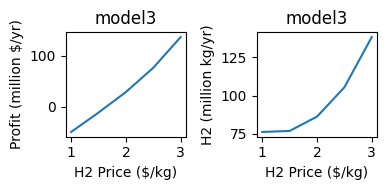

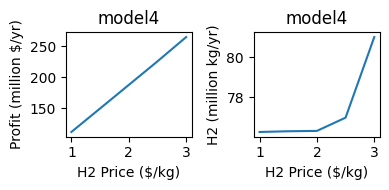

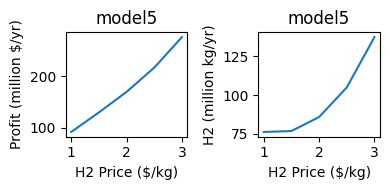

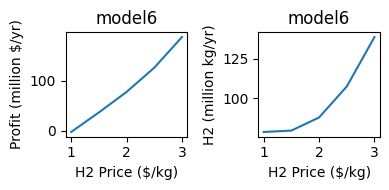

MiNg_$150_MISO-W_2035


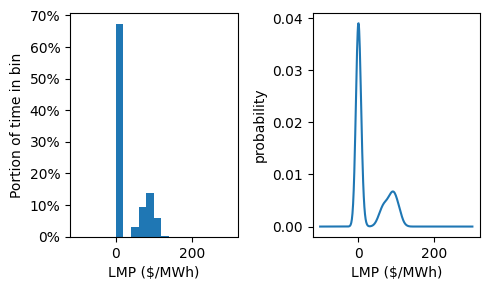

LMP Range ($/MWh) = (0.0, 162.06)
LMP Median ($/MWh) = 0.25
LMP number of data = 8736
LMP Mean ($/MWh) = 28.13
LMP Variance = 1631.48
LMP Skew = 0.9198837511762921
LMP Kurtosis = -0.9238893955407415
Bimodality Coefficient = 0.8888110736738956
Natural Gas Price ($/million BTU) = 2.01

H2 Price ($/kg) = 1.0


model3  model4  model5  model6
Profit (Million $/yr)         -74.11  102.73   71.06   24.78
Fuel Cost (Million $/yr)      180.27   61.41  113.73     0.0
CO2 Tax (Million $/yr)         21.52    4.89    9.05     0.0
Power Capacity Factor (%)      26.52   -36.1    2.99     NaN
Hydrogen Capacity Factor (%)   67.55   67.55   67.55   67.53
Power (Million MWh/yr)          1.51   -2.06    0.19   -4.26
Hydrogen (Million kg/yr)      106.51  106.51  106.51  106.48
Power only mode (%)            32.45   32.45   32.45     0.0
Hydrogen only mode (%)           0.0   67.55     0.0   71.06
Hydrogen + power mode (%)      67.55     0.0   67.55     0.0
Off mode (%)                     0.0     0.0     0.0   28.94


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)         -20.85  155.98  124.31   78.41
Fuel Cost (Million $/yr)      180.27   61.41  113.73     0.0
CO2 Tax (Million $/yr)         21.52    4.89    9.05     0.0
Power Capacity Factor (%)      26.52   -36.1    2.99     NaN
Hydrogen Capacity Factor (%)   67.55   67.55   67.55   68.67
Power (Million MWh/yr)          1.51   -2.06    0.19   -4.33
Hydrogen (Million kg/yr)      106.51  106.51  106.51  108.28
Power only mode (%)            32.45   32.45   32.45     0.0
Hydrogen only mode (%)           0.0   67.55     0.0   74.12
Hydrogen + power mode (%)      67.55     0.0   67.55     0.0
Off mode (%)                     0.0     0.0     0.0   25.88


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -53.49    8.9   32.57  209.24  177.71  133.01
Fuel Cost (Million $/yr)      58.56  53.63  180.26   61.41  113.74     0.0
CO2 Tax (Million $/yr)         6.99   4.27   21.52    4.89    9.05     0.0
Power Capacity Factor (%)     32.45  40.76   25.87   -36.1    2.43     NaN
Hydrogen Capacity Factor (%)    NaN    NaN   68.14   67.55    68.1   69.93
Power (Million MWh/yr)         1.85   2.32    1.47   -2.06    0.15   -4.41
Hydrogen (Million kg/yr)        0.0    0.0  107.45  106.51  107.38  110.27
Power only mode (%)           32.46  59.67   31.71   32.45   31.88     0.0
Hydrogen only mode (%)          0.0    0.0     0.0   67.55     0.0   78.42
Hydrogen + power mode (%)       0.0    0.0   68.29     0.0   68.12     0.0
Off mode (%)                  67.54  40.33     0.0     0.0     0.0   21.58


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          87.56  262.49  232.59  189.33
Fuel Cost (Million $/yr)      180.25   61.41  113.77     0.0
CO2 Tax (Million $/yr)         21.52    4.89    9.06     0.0
Power Capacity Factor (%)      21.91   -36.1   -1.07     NaN
Hydrogen Capacity Factor (%)   71.79   67.55   71.62   73.23
Power (Million MWh/yr)          1.25   -2.06   -0.07   -4.61
Hydrogen (Million kg/yr)       113.2  106.51  112.92  115.47
Power only mode (%)             27.7   32.45   28.19     0.0
Hydrogen only mode (%)           0.0   67.55     0.0   83.78
Hydrogen + power mode (%)       72.3     0.0   71.81     0.0
Off mode (%)                     0.0     0.0     0.0   16.22


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         146.65  315.82  291.47  249.91
Fuel Cost (Million $/yr)      180.25    61.2  113.84     0.0
CO2 Tax (Million $/yr)         21.52    4.87    9.06     0.0
Power Capacity Factor (%)      15.33  -36.51   -7.09     NaN
Hydrogen Capacity Factor (%)   77.86   67.75   77.64   80.33
Power (Million MWh/yr)          0.87   -2.08   -0.44   -5.06
Hydrogen (Million kg/yr)      122.78  106.83  122.43  126.67
Power only mode (%)            21.91   32.25   22.31     0.0
Hydrogen only mode (%)           0.0   67.75     0.0   93.04
Hydrogen + power mode (%)      78.09     0.0   77.69     0.0
Off mode (%)                     0.0     0.0     0.0    6.96

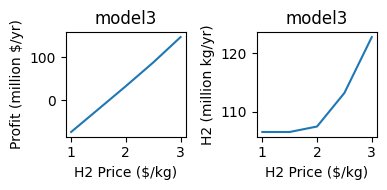

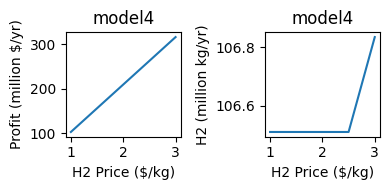

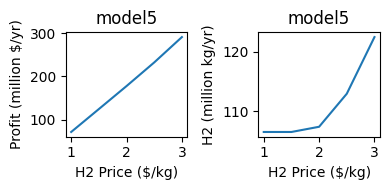

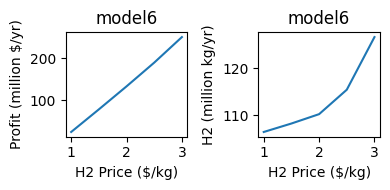

MiNg_$100_NYISO_2035


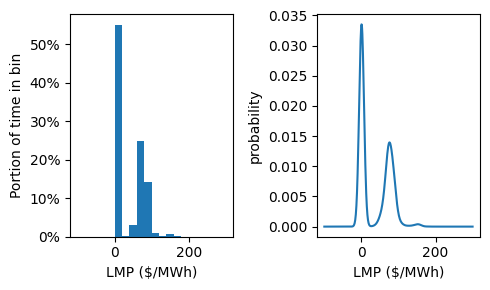

LMP Range ($/MWh) = (0.0, 182.14)
LMP Median ($/MWh) = 1.41
LMP number of data = 8736
LMP Mean ($/MWh) = 35.22
LMP Variance = 1604.85
LMP Skew = 0.4879874872225967
LMP Kurtosis = -1.1952452902224213
Bimodality Coefficient = 0.6856472760389474
Natural Gas Price ($/million BTU) = 1.12

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -14.36  136.87  120.36   2.08
Fuel Cost (Million $/yr)      180.29   74.27  119.21    0.0
CO2 Tax (Million $/yr)         25.76    7.29   11.71    0.0
Power Capacity Factor (%)      39.89  -11.33   21.38    NaN
Hydrogen Capacity Factor (%)   55.26   55.25   55.25  55.56
Power (Million MWh/yr)          2.27   -0.64    1.33   -3.5
Hydrogen (Million kg/yr)       87.13   87.12   87.12  87.61
Power only mode (%)            44.73   44.75   44.75    0.0
Hydrogen only mode (%)           0.0   55.25     0.0  63.35
Hydrogen + power mode (%)      55.27     0.0   55.25    0.0
Off mode (%)                     0.0     0.0     0.0  36.65


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)          29.24  180.43  163.95  46.52
Fuel Cost (Million $/yr)      180.29   74.27  119.21    0.0
CO2 Tax (Million $/yr)         25.76    7.29   11.71    0.0
Power Capacity Factor (%)      39.77  -11.33   21.27    NaN
Hydrogen Capacity Factor (%)   55.37   55.25   55.37  57.71
Power (Million MWh/yr)          2.26   -0.64    1.33  -3.63
Hydrogen (Million kg/yr)        87.3   87.12   87.31  90.99
Power only mode (%)            44.63   44.75   44.63    0.0
Hydrogen only mode (%)           0.0   55.25     0.0  70.49
Hydrogen + power mode (%)      55.37     0.0   55.37    0.0
Off mode (%)                     0.0     0.0     0.0  29.51


H2 Price ($/kg) = 2.0


model0 model1  model3 model4  model5 model6
Profit (Million $/yr)         -8.99  56.04   73.12  224.0  207.82  92.89
Fuel Cost (Million $/yr)      80.81  77.96  180.29  74.24  119.22    0.0
CO2 Tax (Million $/yr)        11.54   7.66   25.76   7.29   11.71    0.0
Power Capacity Factor (%)     44.78  59.29    38.9 -11.37   20.56    NaN
Hydrogen Capacity Factor (%)    NaN    NaN   56.17  55.28   56.08  59.99
Power (Million MWh/yr)         2.55   3.38    2.21  -0.65    1.28  -3.77
Hydrogen (Million kg/yr)        0.0    0.0   88.56  87.16   88.42  94.59
Power only mode (%)           44.85  91.77   43.49  44.72   43.92    0.0
Hydrogen only mode (%)          0.0    0.0     0.0  55.28     0.0  77.38
Hydrogen + power mode (%)       0.0    0.0   56.51    0.0   56.08    0.0
Off mode (%)                  55.15   8.23     0.0    0.0     0.0  22.62


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         118.96  267.61  253.52   142.2
Fuel Cost (Million $/yr)      180.27   74.15  119.25     0.0
CO2 Tax (Million $/yr)         25.75    7.28   11.71     0.0
Power Capacity Factor (%)      33.78  -11.56    16.0     NaN
Hydrogen Capacity Factor (%)   60.89   55.37   60.65   65.53
Power (Million MWh/yr)          1.92   -0.66     1.0   -4.12
Hydrogen (Million kg/yr)       96.01   87.31   95.63  103.32
Power only mode (%)            38.66   44.63   39.13     0.0
Hydrogen only mode (%)           0.0   55.37     0.0   89.58
Hydrogen + power mode (%)      61.34     0.0   60.87     0.0
Off mode (%)                     0.0     0.0     0.0   10.42


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         172.21  311.31  306.21  198.45
Fuel Cost (Million $/yr)      180.26    73.9  119.42     0.0
CO2 Tax (Million $/yr)         25.75    7.26   11.73     0.0
Power Capacity Factor (%)      15.95  -12.04    -0.1     NaN
Hydrogen Capacity Factor (%)   77.32   55.61   76.78   80.33
Power (Million MWh/yr)          0.91   -0.69   -0.01   -5.06
Hydrogen (Million kg/yr)      121.92   87.68  121.06  126.66
Power only mode (%)            21.46   44.39   23.04     0.0
Hydrogen only mode (%)           0.0   55.61     0.0   100.0
Hydrogen + power mode (%)      78.54     0.0   76.96     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

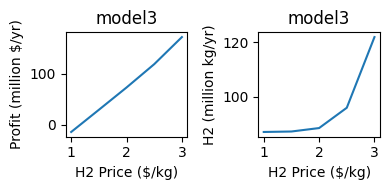

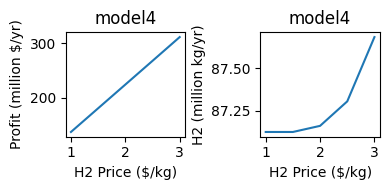

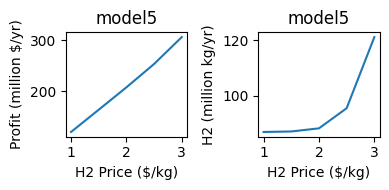

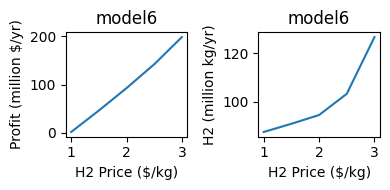

MiNg_$150_NYISO_2035


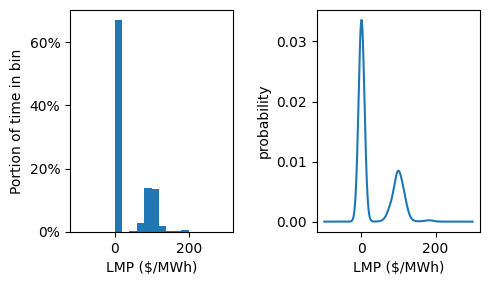

LMP Range ($/MWh) = (0.0, 229.17)
LMP Median ($/MWh) = 0.27
LMP number of data = 8736
LMP Mean ($/MWh) = 33.67
LMP Variance = 2362.64
LMP Skew = 0.9019552592656819
LMP Kurtosis = -0.8219509686840496
Bimodality Coefficient = 0.8322427748029514
Natural Gas Price ($/million BTU) = 1.14

H2 Price ($/kg) = 1.0


model3  model4  model5  model6
Profit (Million $/yr)           -5.4   150.0  130.38   20.47
Fuel Cost (Million $/yr)      180.27    62.0  113.66     0.0
CO2 Tax (Million $/yr)         37.95     8.7   15.95     0.0
Power Capacity Factor (%)      27.08  -34.97     4.2     NaN
Hydrogen Capacity Factor (%)   67.03   66.99   67.03   67.03
Power (Million MWh/yr)          1.54   -1.99    0.26   -4.22
Hydrogen (Million kg/yr)       105.7  105.63   105.7  105.69
Power only mode (%)            32.97   33.01   32.97     0.0
Hydrogen only mode (%)           0.0   66.99     0.0   73.34
Hydrogen + power mode (%)      67.03     0.0   67.03     0.0
Off mode (%)                     0.0     0.0     0.0   26.66


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)          47.45  202.84  183.23   73.76
Fuel Cost (Million $/yr)      180.27   61.95  113.66     0.0
CO2 Tax (Million $/yr)         37.95     8.7   15.95     0.0
Power Capacity Factor (%)      27.06  -35.06    4.19     NaN
Hydrogen Capacity Factor (%)   67.04   67.03   67.04   68.33
Power (Million MWh/yr)          1.54    -2.0    0.26   -4.31
Hydrogen (Million kg/yr)      105.71   105.7  105.72  107.75
Power only mode (%)            32.96   32.97   32.96     0.0
Hydrogen only mode (%)           0.0   67.03     0.0   75.78
Hydrogen + power mode (%)      67.04     0.0   67.04     0.0
Off mode (%)                     0.0     0.0     0.0   24.22


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)         -8.63   50.8   100.3  255.69  236.09  127.94
Fuel Cost (Million $/yr)      59.74  61.55  180.27   61.95  113.66     0.0
CO2 Tax (Million $/yr)        12.58   8.64   37.95     8.7   15.95     0.0
Power Capacity Factor (%)     33.11  46.85   27.06  -35.06    4.19     NaN
Hydrogen Capacity Factor (%)    NaN    NaN   67.05   67.03   67.04   69.24
Power (Million MWh/yr)         1.89   2.67    1.54    -2.0    0.26   -4.36
Hydrogen (Million kg/yr)        0.0    0.0  105.72   105.7  105.72  109.17
Power only mode (%)           33.15  77.52   32.94   32.97   32.96     0.0
Hydrogen only mode (%)          0.0    0.0     0.0   67.03     0.0   78.64
Hydrogen + power mode (%)       0.0    0.0   67.06     0.0   67.04     0.0
Off mode (%)                  66.85  22.48     0.0     0.0     0.0   21.36


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         153.26  308.53  289.03  182.93
Fuel Cost (Million $/yr)      180.26   61.94  113.66     0.0
CO2 Tax (Million $/yr)         37.95    8.69   15.95     0.0
Power Capacity Factor (%)      26.72  -35.08    3.92     NaN
Hydrogen Capacity Factor (%)   67.36   67.04   67.31   70.03
Power (Million MWh/yr)          1.52    -2.0    0.24   -4.41
Hydrogen (Million kg/yr)      106.22  105.72  106.14  110.42
Power only mode (%)            32.62   32.96   32.62     0.0
Hydrogen only mode (%)           0.0   67.04     0.0   82.09
Hydrogen + power mode (%)      67.38     0.0   67.38     0.0
Off mode (%)                     0.0     0.0     0.0   17.91


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         206.73  361.39  342.45  238.92
Fuel Cost (Million $/yr)      180.26   61.94  113.67     0.0
CO2 Tax (Million $/yr)         37.95    8.69   15.95     0.0
Power Capacity Factor (%)      24.79  -35.08    2.26     NaN
Hydrogen Capacity Factor (%)   69.14   67.04   68.98   72.31
Power (Million MWh/yr)          1.41    -2.0    0.14   -4.55
Hydrogen (Million kg/yr)      109.02  105.72  108.76  114.01
Power only mode (%)            30.49   32.96    30.9     0.0
Hydrogen only mode (%)           0.0   67.04     0.0   89.72
Hydrogen + power mode (%)      69.51     0.0    69.1     0.0
Off mode (%)                     0.0     0.0     0.0   10.28

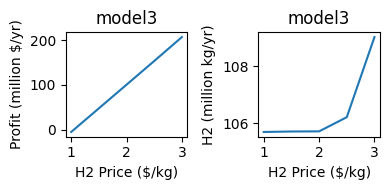

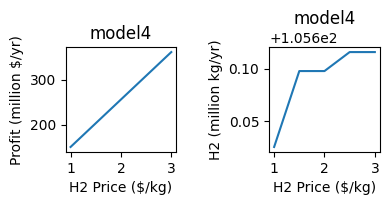

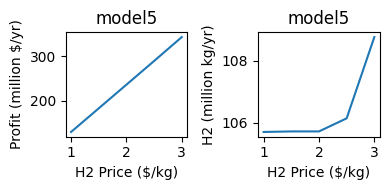

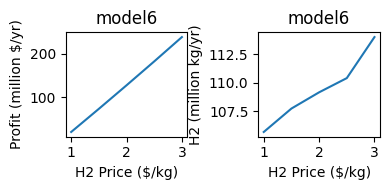

MiNg_$100_PJM-W_2035


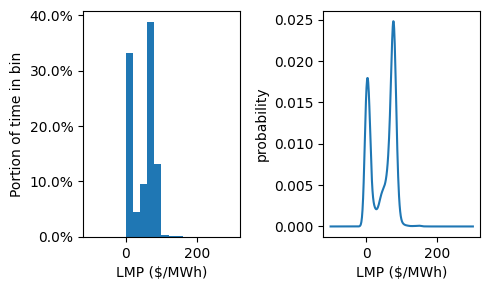

LMP Range ($/MWh) = (0.0, 172.29)
LMP Median ($/MWh) = 63.58
LMP number of data = 8736
LMP Mean ($/MWh) = 48.01
LMP Variance = 1120.61
LMP Skew = -0.3250967004450358
LMP Kurtosis = -1.4271016928224372
Bimodality Coefficient = 0.7025017778458151
Natural Gas Price ($/million BTU) = 1.42

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)            4.6  148.04   145.0 -37.56
Fuel Cost (Million $/yr)      180.34   98.38  134.48    0.0
CO2 Tax (Million $/yr)         20.32    7.62   10.42    0.0
Power Capacity Factor (%)      62.28   35.15   56.22    NaN
Hydrogen Capacity Factor (%)   34.68   32.19   34.69   34.6
Power (Million MWh/yr)          3.55     2.0    3.51  -2.18
Hydrogen (Million kg/yr)       54.69   50.76    54.7  54.55
Power only mode (%)            65.26   67.81   65.28    0.0
Hydrogen only mode (%)           0.0   32.19     0.0  44.69
Hydrogen + power mode (%)      34.74     0.0   34.72    0.0
Off mode (%)                     0.0     0.0     0.0  55.31


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)          32.77  174.37  173.14  -9.28
Fuel Cost (Million $/yr)      180.34    96.0   134.5    0.0
CO2 Tax (Million $/yr)         20.32    7.44   10.42    0.0
Power Capacity Factor (%)      59.76   30.56   53.98    NaN
Hydrogen Capacity Factor (%)   37.01   34.47   36.94  37.88
Power (Million MWh/yr)           3.4    1.74    3.37  -2.38
Hydrogen (Million kg/yr)       58.36   54.35   58.25  59.74
Power only mode (%)             62.8   65.53   63.02    0.0
Hydrogen only mode (%)           0.0   34.47     0.0  51.51
Hydrogen + power mode (%)       37.2     0.0   36.98    0.0
Off mode (%)                     0.0     0.0     0.0  48.49


H2 Price ($/kg) = 2.0


model0  model1  model3 model4  model5 model6
Profit (Million $/yr)          31.7  111.86   64.05  201.9   204.3  22.48
Fuel Cost (Million $/yr)      122.9  107.38  180.34  94.97  134.55    0.0
CO2 Tax (Million $/yr)        13.85    8.32   20.32   7.36   10.42    0.0
Power Capacity Factor (%)     68.11   81.49   53.91  28.57   48.69    NaN
Hydrogen Capacity Factor (%)    NaN     NaN    42.4  35.45   42.23  43.18
Power (Million MWh/yr)         3.88    4.64    3.07   1.63    3.04  -2.71
Hydrogen (Million kg/yr)        0.0     0.0   66.85   55.9   66.59  68.09
Power only mode (%)           68.19   100.0   57.19  64.55    57.7    0.0
Hydrogen only mode (%)          0.0     0.0     0.0  35.45     0.0   61.1
Hydrogen + power mode (%)       0.0     0.0   42.81    0.0    42.3    0.0
Off mode (%)                  31.81     0.0     0.0    0.0     0.0   38.9


H2 Price ($/kg) = 2.5


model3  model4  model5 model6
Profit (Million $/yr)          100.2  230.46  240.23  61.49
Fuel Cost (Million $/yr)      180.33   93.43  134.62    0.0
CO2 Tax (Million $/yr)         20.32    7.24   10.43    0.0
Power Capacity Factor (%)       45.8    25.6    41.4    NaN
Hydrogen Capacity Factor (%)   49.88   36.93   49.55  56.09
Power (Million MWh/yr)          2.61    1.46    2.58  -3.52
Hydrogen (Million kg/yr)       78.65   58.23   78.12  88.44
Power only mode (%)            49.23   63.07   50.22    0.0
Hydrogen only mode (%)           0.0   36.93     0.0  87.91
Hydrogen + power mode (%)      50.77     0.0   49.78    0.0
Off mode (%)                     0.0     0.0     0.0  12.09


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         146.22  260.57  285.45  112.02
Fuel Cost (Million $/yr)      180.23   90.42  134.84     0.0
CO2 Tax (Million $/yr)         20.31     7.0   10.45     0.0
Power Capacity Factor (%)      21.37   19.81   20.16     NaN
Hydrogen Capacity Factor (%)    72.4    39.8   70.82   74.33
Power (Million MWh/yr)          1.22    1.13    1.26   -4.67
Hydrogen (Million kg/yr)      114.16   62.76  111.67   117.2
Power only mode (%)            23.95    60.2   28.95     0.0
Hydrogen only mode (%)           0.0    39.8     0.0   100.0
Hydrogen + power mode (%)      76.05     0.0   71.05     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

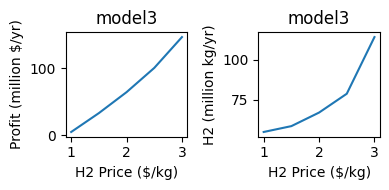

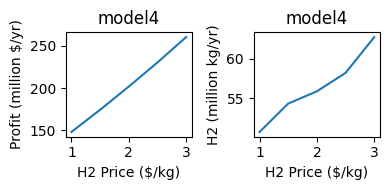

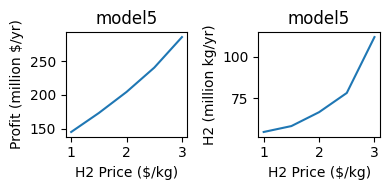

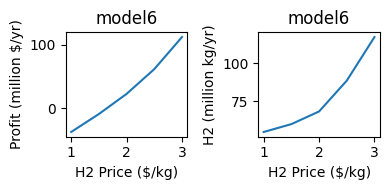

MiNg_$150_PJM-W_2035


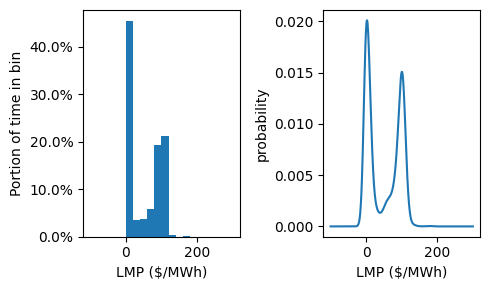

LMP Range ($/MWh) = (0.0, 181.06)
LMP Median ($/MWh) = 47.84
LMP number of data = 8736
LMP Mean ($/MWh) = 49.81
LMP Variance = 2094.35
LMP Skew = 0.10681901446639107
LMP Kurtosis = -1.7572782937839126
Bimodality Coefficient = 0.8131926961748264
Natural Gas Price ($/million BTU) = 1.43

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)          33.12  180.87  176.76 -18.49
Fuel Cost (Million $/yr)      180.33   84.59  129.97    0.0
CO2 Tax (Million $/yr)         30.27    9.47   14.54    0.0
Power Capacity Factor (%)      48.96    8.58   39.16    NaN
Hydrogen Capacity Factor (%)   46.95   45.38   46.86  44.34
Power (Million MWh/yr)          2.79    0.49    2.44  -2.79
Hydrogen (Million kg/yr)       74.02   71.55   73.89  69.92
Power only mode (%)             52.7   54.62   52.83    0.0
Hydrogen only mode (%)           0.0   45.38     0.0  49.51
Hydrogen + power mode (%)       47.3     0.0   47.17    0.0
Off mode (%)                     0.0     0.0     0.0  50.49


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)          71.07  216.94  214.68  18.35
Fuel Cost (Million $/yr)      180.35   83.46   130.0    0.0
CO2 Tax (Million $/yr)         30.27    9.34   14.55    0.0
Power Capacity Factor (%)      46.95    6.39   37.26    NaN
Hydrogen Capacity Factor (%)    48.8   46.46   48.76  48.43
Power (Million MWh/yr)          2.67    0.36    2.32  -3.05
Hydrogen (Million kg/yr)       76.95   73.26   76.89  76.36
Power only mode (%)             51.1   53.54   51.16    0.0
Hydrogen only mode (%)           0.0   46.46     0.0  54.54
Hydrogen + power mode (%)       48.9     0.0   48.84    0.0
Off mode (%)                     0.0     0.0     0.0  45.46


H2 Price ($/kg) = 2.0


model0  model1  model3 model4  model5 model6
Profit (Million $/yr)         52.31  126.34  110.19  254.4  253.76  57.61
Fuel Cost (Million $/yr)      98.81   96.42  180.35  81.77  130.02    0.0
CO2 Tax (Million $/yr)        16.58   10.79   30.27   9.15   14.55    0.0
Power Capacity Factor (%)     54.76   73.16   45.23   3.13   35.69    NaN
Hydrogen Capacity Factor (%)    NaN     NaN   50.39  48.08   50.34  51.13
Power (Million MWh/yr)         3.12    4.17    2.58   0.18    2.23  -3.22
Hydrogen (Million kg/yr)        0.0     0.0   79.45  75.81   79.38  80.62
Power only mode (%)           54.82   89.79   49.52  51.92   49.62    0.0
Hydrogen only mode (%)          0.0     0.0     0.0  48.08     0.0  60.71
Hydrogen + power mode (%)       0.0     0.0   50.48    0.0   50.38    0.0
Off mode (%)                  45.18   10.21     0.0    0.0     0.0  39.29


H2 Price ($/kg) = 2.5


model3  model4  model5 model6
Profit (Million $/yr)         151.23  292.57  294.71  99.35
Fuel Cost (Million $/yr)      180.35   81.08  130.05    0.0
CO2 Tax (Million $/yr)         30.27    9.07   14.55    0.0
Power Capacity Factor (%)      41.58     1.8   32.36    NaN
Hydrogen Capacity Factor (%)   53.76   48.74   53.67  55.26
Power (Million MWh/yr)          2.37     0.1    2.02  -3.48
Hydrogen (Million kg/yr)       84.76   76.85   84.63  87.14
Power only mode (%)            45.96   51.26   46.15    0.0
Hydrogen only mode (%)           0.0   48.74     0.0  67.53
Hydrogen + power mode (%)      54.04     0.0   53.85    0.0
Off mode (%)                     0.0     0.0     0.0  32.47


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         195.08  331.36  338.43  145.01
Fuel Cost (Million $/yr)      180.35   80.17  130.09     0.0
CO2 Tax (Million $/yr)         30.27    8.97   14.56     0.0
Power Capacity Factor (%)      37.49    0.04   28.61     NaN
Hydrogen Capacity Factor (%)   57.52   49.61   57.44   61.02
Power (Million MWh/yr)          2.13     0.0    1.78   -3.84
Hydrogen (Million kg/yr)        90.7   78.23   90.57   96.22
Power only mode (%)            42.26   50.39   42.54     0.0
Hydrogen only mode (%)           0.0   49.61     0.0   82.21
Hydrogen + power mode (%)      57.74     0.0   57.46     0.0
Off mode (%)                     0.0     0.0     0.0   17.79

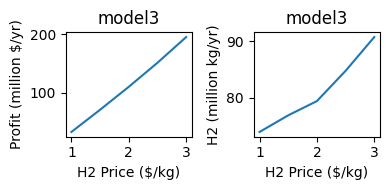

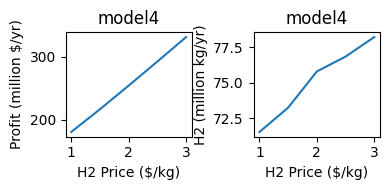

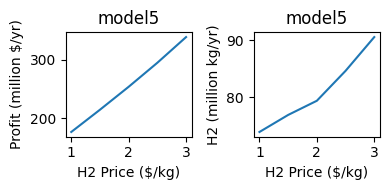

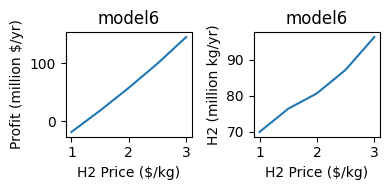

BaseCase_2030


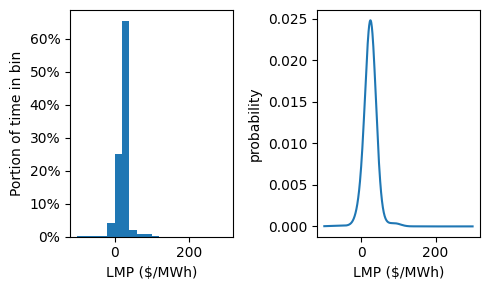

LMP Range ($/MWh) = (-113.2815717, 1349.591575)
LMP Median ($/MWh) = 24.13
LMP number of data = 8760
LMP Mean ($/MWh) = 30.25
LMP Variance = 6484.56
LMP Skew = 12.485210024776473
LMP Kurtosis = 162.14865223010696
Bimodality Coefficient = 0.9499289937785539
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -171.27  -16.65  -27.85 -46.51
Fuel Cost (Million $/yr)      138.98  100.38  140.63    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      32.58    39.0   38.45    NaN
Hydrogen Capacity Factor (%)   41.04   30.27   57.37  51.42
Power (Million MWh/yr)          1.86    2.22     2.4  -3.23
Hydrogen (Million kg/yr)       64.71   47.74   90.46  81.08
Power only mode (%)            33.47   69.73   39.59    0.0
Hydrogen only mode (%)           0.0   30.27     0.0  79.29
Hydrogen + power mode (%)      43.89     0.0   60.41    0.0
Off mode (%)                   22.64     0.0     0.0  20.71


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -108.64   21.38    34.7   17.84
Fuel Cost (Million $/yr)      180.43   61.74  141.13     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -2.34  -35.47    1.48     NaN
Hydrogen Capacity Factor (%)   94.32   67.24   94.41   93.33
Power (Million MWh/yr)         -0.13   -2.02    0.09   -5.88
Hydrogen (Million kg/yr)      148.73  106.02  148.87  147.16
Power only mode (%)             5.32   32.76    5.47     0.0
Hydrogen only mode (%)           0.0   67.24     0.0   97.27
Hydrogen + power mode (%)      94.68     0.0   94.53     0.0
Off mode (%)                     0.0     0.0     0.0    2.73


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -121.13   -33.2  -32.84   82.38  110.46   92.54
Fuel Cost (Million $/yr)       60.53  123.81  180.51   38.62  141.16     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      33.55   93.83   -5.16  -80.02    -1.0     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   96.92   89.35    96.9   96.03
Power (Million MWh/yr)          1.91    5.34   -0.29   -4.56   -0.06   -6.06
Hydrogen (Million kg/yr)         0.0     0.0  152.82  140.89  152.79  151.42
Power only mode (%)            33.57   100.0     3.0   10.65    2.99     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   89.35     0.0   98.18
Hydrogen + power mode (%)        0.0     0.0    97.0     0.0   97.01     0.0
Off mode (%)                   66.43     0.0     0.0     0.0     0.0    1.82


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          43.85  156.18  187.13  168.66
Fuel Cost (Million $/yr)      180.51   32.07  141.16     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -5.91  -92.65   -1.69     NaN
Hydrogen Capacity Factor (%)   97.61   95.62   97.59    97.1
Power (Million MWh/yr)         -0.34   -5.28   -0.11   -6.12
Hydrogen (Million kg/yr)      153.91  150.77  153.88   153.1
Power only mode (%)             2.34    4.38    2.37     0.0
Hydrogen only mode (%)           0.0   95.62     0.0   98.77
Hydrogen + power mode (%)      97.66     0.0   97.63     0.0
Off mode (%)                     0.0     0.0     0.0    1.23


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         120.97  232.14  264.23  245.56
Fuel Cost (Million $/yr)      180.51   30.83  141.17     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.31  -95.04   -2.06     NaN
Hydrogen Capacity Factor (%)   97.98    96.8   97.96   97.73
Power (Million MWh/yr)         -0.36   -5.41   -0.13   -6.16
Hydrogen (Million kg/yr)       154.5  152.64  154.46  154.09
Power only mode (%)             1.96     3.2    1.99     0.0
Hydrogen only mode (%)           0.0    96.8     0.0   99.18
Hydrogen + power mode (%)      98.04     0.0   98.01     0.0
Off mode (%)                     0.0     0.0     0.0    0.82

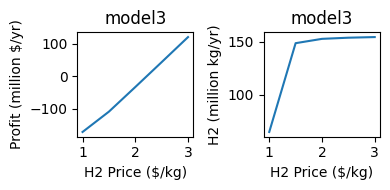

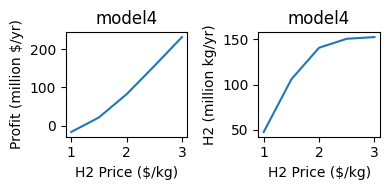

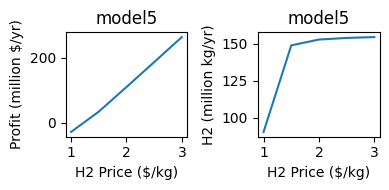

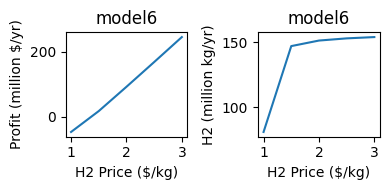

HighWind_2030


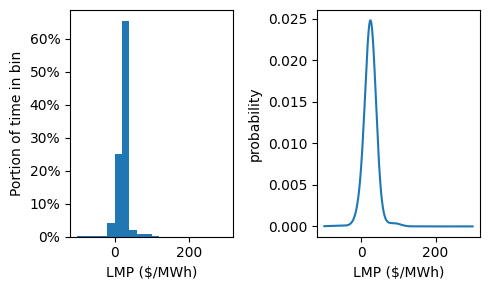

LMP Range ($/MWh) = (-113.2815693, 1349.591576)
LMP Median ($/MWh) = 24.13
LMP number of data = 8760
LMP Mean ($/MWh) = 30.25
LMP Variance = 6484.56
LMP Skew = 12.485210104872637
LMP Kurtosis = 162.1486542569907
Bimodality Coefficient = 0.9499289942305028
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -171.27  -16.65  -27.83 -46.51
Fuel Cost (Million $/yr)      138.98  100.38  140.61    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      32.55    39.0   38.44    NaN
Hydrogen Capacity Factor (%)   41.07   30.27   57.38  51.42
Power (Million MWh/yr)          1.85    2.22     2.4  -3.23
Hydrogen (Million kg/yr)       64.76   47.74   90.47  81.08
Power only mode (%)            33.39   69.73   38.78    0.0
Hydrogen only mode (%)           0.0   30.27     0.0  79.29
Hydrogen + power mode (%)      43.97     0.0   61.22    0.0
Off mode (%)                   22.64     0.0     0.0  20.71


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -108.64   21.38    34.7  17.84
Fuel Cost (Million $/yr)      180.43   61.74  141.12    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      -2.25  -35.47    1.43    NaN
Hydrogen Capacity Factor (%)   94.23   67.24   94.46  93.42
Power (Million MWh/yr)         -0.13   -2.02    0.09  -5.89
Hydrogen (Million kg/yr)      148.59  106.02  148.95  147.3
Power only mode (%)             5.34   32.76    5.29    0.0
Hydrogen only mode (%)           0.0   67.24     0.0  97.31
Hydrogen + power mode (%)      94.66     0.0   94.71    0.0
Off mode (%)                     0.0     0.0     0.0   2.69


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -121.13   -33.2  -32.84   82.38  110.46   92.54
Fuel Cost (Million $/yr)       60.53  123.81  180.51   38.62  141.16     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      33.55   93.83   -5.16  -80.02   -0.99     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   96.92   89.35   96.89   96.01
Power (Million MWh/yr)          1.91    5.34   -0.29   -4.56   -0.06   -6.05
Hydrogen (Million kg/yr)         0.0     0.0  152.82  140.89  152.77  151.39
Power only mode (%)            33.57   100.0     3.0   10.65    3.06     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   89.35     0.0   98.18
Hydrogen + power mode (%)        0.0     0.0    97.0     0.0   96.94     0.0
Off mode (%)                   66.43     0.0     0.0     0.0     0.0    1.82


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          43.85  156.18  187.11  168.66
Fuel Cost (Million $/yr)      180.51   32.07  141.16     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       -5.9  -92.65   -1.57     NaN
Hydrogen Capacity Factor (%)    97.6   95.62   97.47    97.1
Power (Million MWh/yr)         -0.34   -5.28    -0.1   -6.12
Hydrogen (Million kg/yr)       153.9  150.77  153.69   153.1
Power only mode (%)             2.33    4.38    2.37     0.0
Hydrogen only mode (%)           0.0   95.62     0.0   98.77
Hydrogen + power mode (%)      97.67     0.0   97.63     0.0
Off mode (%)                     0.0     0.0     0.0    1.23


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         120.97  232.14  264.23  245.56
Fuel Cost (Million $/yr)      180.51   30.83  141.17     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.32  -95.04   -2.04     NaN
Hydrogen Capacity Factor (%)   97.99    96.8   97.95   97.73
Power (Million MWh/yr)         -0.36   -5.41   -0.13   -6.16
Hydrogen (Million kg/yr)      154.51  152.64  154.44  154.09
Power only mode (%)             1.96     3.2    2.04     0.0
Hydrogen only mode (%)           0.0    96.8     0.0   99.18
Hydrogen + power mode (%)      98.04     0.0   97.96     0.0
Off mode (%)                     0.0     0.0     0.0    0.82

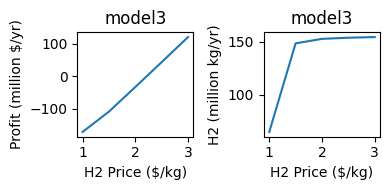

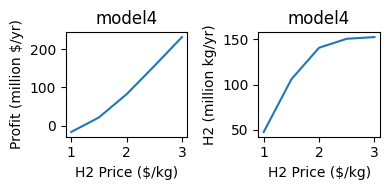

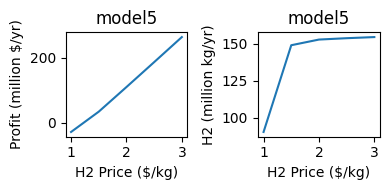

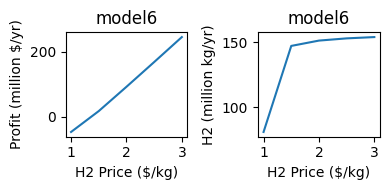

HighSolar_2030


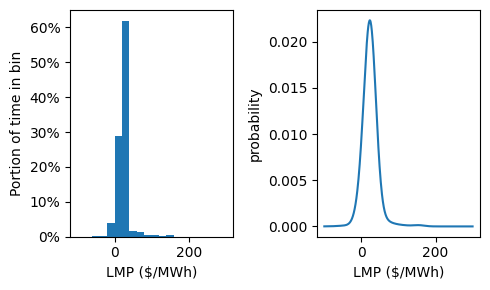

LMP Range ($/MWh) = (-111.2865714, 1800.0)
LMP Median ($/MWh) = 22.77
LMP number of data = 8760
LMP Mean ($/MWh) = 30.13
LMP Variance = 8433.76
LMP Skew = 14.24900196008715
LMP Kurtosis = 224.1845744168342
Bimodality Coefficient = 0.898094134831205
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -170.75 -15.37  -25.26  -43.22
Fuel Cost (Million $/yr)      178.12  96.61  139.88     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      40.68  31.74   27.28     NaN
Hydrogen Capacity Factor (%)   53.45  33.88   67.74   64.95
Power (Million MWh/yr)          2.32   1.81     1.7   -4.09
Hydrogen (Million kg/yr)       84.29  53.42  106.81  102.41
Power only mode (%)            35.58  66.12   29.99     0.0
Hydrogen only mode (%)           0.0  33.88     0.0   78.53
Hydrogen + power mode (%)      64.42    0.0   70.01     0.0
Off mode (%)                     0.0    0.0     0.0   21.47


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -102.22    29.1   40.99    23.6
Fuel Cost (Million $/yr)      180.46   53.84  140.22     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -2.66   -50.7    0.78     NaN
Hydrogen Capacity Factor (%)   94.61   74.79    94.3   93.29
Power (Million MWh/yr)         -0.15   -2.89    0.05   -5.88
Hydrogen (Million kg/yr)      149.17  117.94  148.69  147.11
Power only mode (%)             5.17   25.21    5.31     0.0
Hydrogen only mode (%)           0.0   74.79     0.0   97.29
Hydrogen + power mode (%)      94.83     0.0   94.69     0.0
Off mode (%)                     0.0     0.0     0.0    2.71


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -117.86  -33.57  -26.89   94.48  116.31   97.83
Fuel Cost (Million $/yr)       48.67  122.06   180.5   35.69  140.25     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      26.97   92.51    -4.3  -85.68   -0.97     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   96.12   92.16   96.06   94.71
Power (Million MWh/yr)          1.54    5.27   -0.25   -4.88   -0.06   -5.97
Hydrogen (Million kg/yr)         0.0     0.0  151.57  145.31  151.46  149.34
Power only mode (%)             27.0   100.0    3.81    7.84    3.84     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   92.16     0.0   97.49
Hydrogen + power mode (%)        0.0     0.0   96.19     0.0   96.16     0.0
Off mode (%)                    73.0     0.0     0.0     0.0     0.0    2.51


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)           49.2  168.72  192.38  173.06
Fuel Cost (Million $/yr)       180.5   32.45  140.26     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -5.23  -91.91   -1.86     NaN
Hydrogen Capacity Factor (%)   96.98   95.25   96.95   96.82
Power (Million MWh/yr)          -0.3   -5.23   -0.12    -6.1
Hydrogen (Million kg/yr)      152.91  150.19  152.86  152.67
Power only mode (%)             2.96    4.75    3.04     0.0
Hydrogen only mode (%)           0.0   95.25     0.0   99.18
Hydrogen + power mode (%)      97.04     0.0   96.96     0.0
Off mode (%)                     0.0     0.0     0.0    0.82


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         125.98  244.06  269.13  250.12
Fuel Cost (Million $/yr)       180.5   31.64  140.27     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       -6.1  -93.48   -2.69     NaN
Hydrogen Capacity Factor (%)   97.78   96.03   97.77   98.21
Power (Million MWh/yr)         -0.35   -5.32   -0.17   -6.19
Hydrogen (Million kg/yr)      154.18  151.42  154.16  154.86
Power only mode (%)             2.18    3.97     2.2     0.0
Hydrogen only mode (%)           0.0   96.03     0.0   100.0
Hydrogen + power mode (%)      97.82     0.0    97.8     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

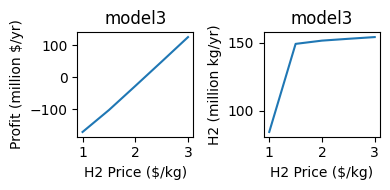

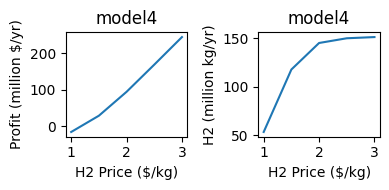

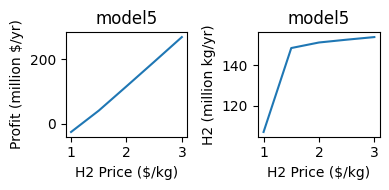

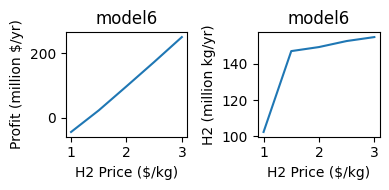

WinterNY_2030


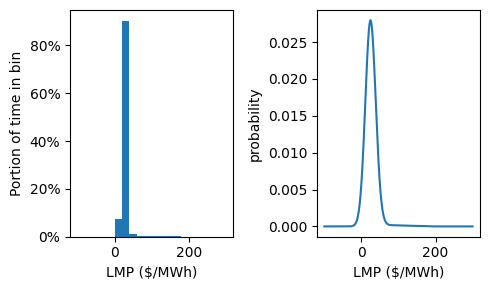

LMP Range ($/MWh) = (2.6e-07, 4257.425614)
LMP Median ($/MWh) = 23.73
LMP number of data = 8760
LMP Mean ($/MWh) = 29.09
LMP Variance = 6679.42
LMP Skew = 31.54122650744694
LMP Kurtosis = 1215.7693480853416
Bimodality Coefficient = 0.8170931861386846
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -193.62  -51.47  -56.25 -59.75
Fuel Cost (Million $/yr)       95.77  123.47  144.93    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      30.66   83.51   40.47    NaN
Hydrogen Capacity Factor (%)   20.77    8.18   59.63   50.2
Power (Million MWh/yr)          1.75    4.75    2.52  -3.16
Hydrogen (Million kg/yr)       32.74   12.91   94.03  79.16
Power only mode (%)            29.35   91.82   33.04    0.0
Hydrogen only mode (%)           0.0    8.18     0.0  65.86
Hydrogen + power mode (%)      23.84     0.0   66.96    0.0
Off mode (%)                   46.82     0.0     0.0  34.14


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -127.72  -15.13    10.7    8.29
Fuel Cost (Million $/yr)      180.53   58.57  145.58     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -5.26  -41.59    3.06     NaN
Hydrogen Capacity Factor (%)   97.04   70.27   97.13   96.76
Power (Million MWh/yr)          -0.3   -2.37    0.19    -6.1
Hydrogen (Million kg/yr)      153.01  110.81  153.15  152.57
Power only mode (%)             2.77   29.73    2.51     0.0
Hydrogen only mode (%)           0.0   70.27     0.0    99.0
Hydrogen + power mode (%)      97.23     0.0   97.49     0.0
Off mode (%)                     0.0     0.0     0.0     1.0


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -142.26  -46.95  -50.46    50.8   87.93   42.84
Fuel Cost (Million $/yr)       53.38  131.98  180.55   31.59  145.61     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      29.58   99.96   -6.65  -93.57    1.87     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   98.32   96.07   98.32   71.55
Power (Million MWh/yr)          1.68    5.69   -0.38   -5.33    0.12   -4.51
Hydrogen (Million kg/yr)         0.0     0.0  155.03  151.49  155.03  112.82
Power only mode (%)            29.65   100.0    1.68    3.93    1.68     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   96.07     0.0    72.1
Hydrogen + power mode (%)        0.0     0.0   98.32     0.0   98.32     0.0
Off mode (%)                   70.35     0.0     0.0     0.0     0.0    27.9


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          27.16  127.29  165.54  162.95
Fuel Cost (Million $/yr)      180.55   29.96  145.61     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.92  -96.72    1.64     NaN
Hydrogen Capacity Factor (%)   98.57   97.64   98.55   98.51
Power (Million MWh/yr)         -0.39   -5.51     0.1   -6.21
Hydrogen (Million kg/yr)      155.42  153.95  155.39  155.33
Power only mode (%)             1.43    2.36    1.43     0.0
Hydrogen only mode (%)           0.0   97.64     0.0   99.59
Hydrogen + power mode (%)      98.57     0.0   98.57     0.0
Off mode (%)                     0.0     0.0     0.0    0.41


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         104.94  204.62  243.32  240.68
Fuel Cost (Million $/yr)      180.55    29.3  145.61     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.14  -97.99    1.42     NaN
Hydrogen Capacity Factor (%)   98.77   98.26   98.77   98.69
Power (Million MWh/yr)         -0.41   -5.58    0.09   -6.22
Hydrogen (Million kg/yr)      155.74  154.94  155.74  155.62
Power only mode (%)              1.2    1.74    1.21     0.0
Hydrogen only mode (%)           0.0   98.26     0.0   99.59
Hydrogen + power mode (%)       98.8     0.0   98.79     0.0
Off mode (%)                     0.0     0.0     0.0    0.41

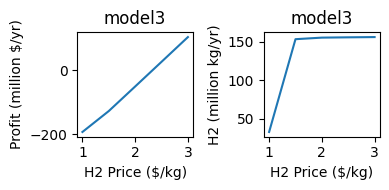

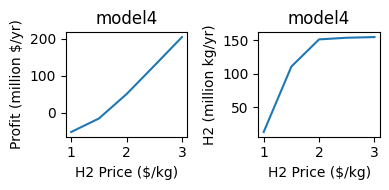

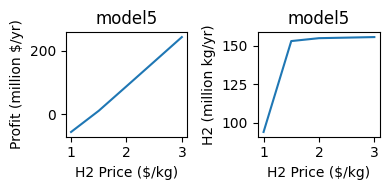

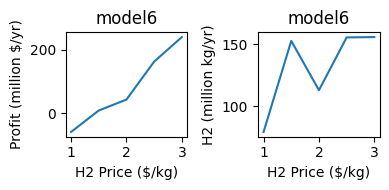

BaseCaseTax_2030


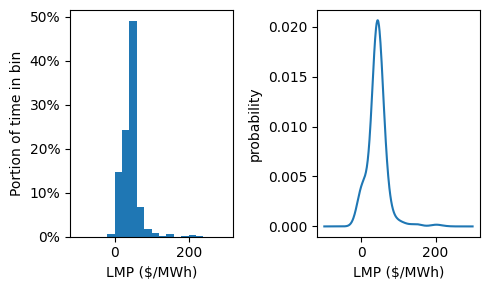

LMP Range ($/MWh) = (-1.02e-07, 1800.000025)
LMP Median ($/MWh) = 43.40
LMP number of data = 8760
LMP Mean ($/MWh) = 47.69
LMP Variance = 6802.95
LMP Skew = 15.418343829367624
LMP Kurtosis = 277.73654480701236
Bimodality Coefficient = 0.8503504687086758
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -83.09   79.58   70.14 -64.95
Fuel Cost (Million $/yr)      180.39  116.12  138.88    0.0
CO2 Tax (Million $/yr)          6.14    2.37    2.83    0.0
Power Capacity Factor (%)      83.26   69.34   79.18    NaN
Hydrogen Capacity Factor (%)    15.4   15.22   15.39   8.15
Power (Million MWh/yr)          4.74    3.95    4.94  -0.51
Hydrogen (Million kg/yr)       24.28   23.99   24.27  12.85
Power only mode (%)            84.49   84.78   84.51    0.0
Hydrogen only mode (%)           0.0   15.22     0.0  20.07
Hydrogen + power mode (%)      15.51     0.0   15.49    0.0
Off mode (%)                     0.0     0.0     0.0  79.93


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)         -69.61   91.69   83.23 -50.16
Fuel Cost (Million $/yr)      180.12  115.79  138.77    0.0
CO2 Tax (Million $/yr)          6.13    2.36    2.83    0.0
Power Capacity Factor (%)       70.0    68.7   70.48    NaN
Hydrogen Capacity Factor (%)   27.62   15.54   24.11  24.06
Power (Million MWh/yr)          3.99    3.91     4.4   -1.5
Hydrogen (Million kg/yr)       43.55    24.5   38.01  37.94
Power only mode (%)            70.06   84.46   70.73    0.0
Hydrogen only mode (%)           0.0   15.54     0.0  62.42
Hydrogen + power mode (%)      29.94     0.0   29.27    0.0
Off mode (%)                     0.0     0.0     0.0  37.58


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)          -35.5   65.85  -24.85  104.11  126.83   -3.07
Fuel Cost (Million $/yr)      152.45  120.16  180.35   115.3  139.49     0.0
CO2 Tax (Million $/yr)          5.19    2.45    6.13    2.35    2.85     0.0
Power Capacity Factor (%)      84.49   91.08   14.46   67.75   16.35     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   78.82    16.0   78.36   80.09
Power (Million MWh/yr)          4.81    5.19    0.82    3.86    1.02   -5.04
Hydrogen (Million kg/yr)         0.0     0.0  124.29   25.24  123.56  126.29
Power only mode (%)            84.52   100.0    20.1    84.0   20.82     0.0
Hydrogen only mode (%)           0.0     0.0     0.0    16.0     0.0   97.31
Hydrogen + power mode (%)        0.0     0.0    79.9     0.0   79.18     0.0
Off mode (%)                   15.48     0.0     0.0     0.0     0.0    2.69


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          42.39  124.25   193.7   64.91
Fuel Cost (Million $/yr)      180.43   85.97  139.65     0.0
CO2 Tax (Million $/yr)          6.14    1.75    2.85     0.0
Power Capacity Factor (%)       1.44   11.22    3.79     NaN
Hydrogen Capacity Factor (%)   90.83   44.06   90.95   90.29
Power (Million MWh/yr)          0.08    0.64    0.24   -5.69
Hydrogen (Million kg/yr)      143.22   69.48   143.4  142.37
Power only mode (%)             8.69   55.94    9.02     0.0
Hydrogen only mode (%)           0.0   44.06     0.0   98.36
Hydrogen + power mode (%)      91.31     0.0   90.98     0.0
Off mode (%)                     0.0     0.0     0.0    1.64


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         116.24  168.54  267.43  138.84
Fuel Cost (Million $/yr)      180.49   53.37  139.69     0.0
CO2 Tax (Million $/yr)          6.14    1.09    2.85     0.0
Power Capacity Factor (%)       -3.2   -51.6    -0.3     NaN
Hydrogen Capacity Factor (%)    95.1   75.24   95.05   95.64
Power (Million MWh/yr)         -0.18   -2.94   -0.02   -6.03
Hydrogen (Million kg/yr)      149.96  118.64  149.87  150.81
Power only mode (%)             4.83   24.76    4.91     0.0
Hydrogen only mode (%)           0.0   75.24     0.0   99.59
Hydrogen + power mode (%)      95.17     0.0   95.09     0.0
Off mode (%)                     0.0     0.0     0.0    0.41

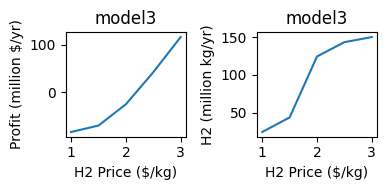

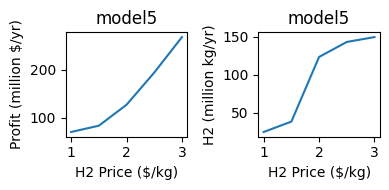

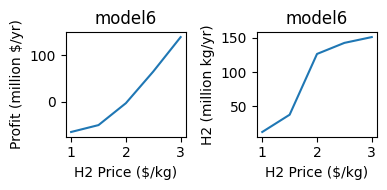

HighWindTax_2030


LMP Range ($/MWh) = (-1.61e-07, 1800.000003)
LMP Median ($/MWh) = 43.40
LMP number of data = 8760
LMP Mean ($/MWh) = 45.06
LMP Variance = 8011.99
LMP Skew = 15.131590709469572
LMP Kurtosis = 263.5862070260804
Bimodality Coefficient = 0.8626258401269163
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -85.21   83.95   69.44  -57.1
Fuel Cost (Million $/yr)      180.37  108.17  135.17    0.0
CO2 Tax (Million $/yr)          6.14    2.21    2.76    0.0
Power Capacity Factor (%)      74.94   54.02    67.7    NaN
Hydrogen Capacity Factor (%)   23.04   22.82   23.03  22.37
Power (Million MWh/yr)          4.27    3.08    4.22   -1.4
Hydrogen (Million kg/yr)       36.33   35.98   36.31  35.27
Power only mode (%)            76.89   77.18   76.91    0.0
Hydrogen only mode (%)           0.0   22.82     0.0  50.29
Hydrogen + power mode (%)      23.11     0.0   23.09    0.0
Off mode (%)                     0.0     0.0     0.0  49.71


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -65.95  102.06    88.4 -31.93
Fuel Cost (Million $/yr)      180.2  107.79  135.08    0.0
CO2 Tax (Million $/yr)         6.13     2.2    2.76    0.0
Power Capacity Factor (%)     65.59   53.29    61.8    NaN
Hydrogen Capacity Factor (%)  31.66   23.18   28.95  37.42
Power (Million MWh/yr)         3.73    3.03    3.85  -2.33
Hydrogen (Million kg/yr)      49.92   36.56   45.65   59.0
Power only mode (%)           67.13   76.82   67.18    0.0
Hydrogen only mode (%)          0.0   23.18     0.0  92.01
Hydrogen + power mode (%)     32.87     0.0   32.82    0.0
Off mode (%)                    0.0     0.0     0.0   7.99


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)         -37.96   56.44  -21.75  120.62  131.55    17.0
Fuel Cost (Million $/yr)      138.59  113.28  180.29  107.02  135.66     0.0
CO2 Tax (Million $/yr)          4.71    2.31    6.13    2.18    2.77     0.0
Power Capacity Factor (%)      76.82   85.91   15.94   51.79   14.55     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   77.44   23.93    76.3   78.96
Power (Million MWh/yr)          4.37    4.89    0.91    2.95    0.91   -4.97
Hydrogen (Million kg/yr)         0.0     0.0   122.1   37.73  120.31  124.51
Power only mode (%)            76.82   100.0   19.91   76.07   22.45     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   23.93     0.0   97.13
Hydrogen + power mode (%)        0.0     0.0   80.09     0.0   77.55     0.0
Off mode (%)                   23.18     0.0     0.0     0.0     0.0    2.87


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          45.53  144.56   198.5   85.36
Fuel Cost (Million $/yr)      180.44   86.24  135.84     0.0
CO2 Tax (Million $/yr)          6.14    1.76    2.77     0.0
Power Capacity Factor (%)       3.15   11.75    1.71     NaN
Hydrogen Capacity Factor (%)   89.23    43.8   89.16    90.6
Power (Million MWh/yr)          0.18    0.67    0.11   -5.71
Hydrogen (Million kg/yr)       140.7   69.07  140.59  142.86
Power only mode (%)            10.46    56.2   10.67     0.0
Hydrogen only mode (%)           0.0    43.8     0.0   98.77
Hydrogen + power mode (%)      89.54     0.0   89.33     0.0
Off mode (%)                     0.0     0.0     0.0    1.23


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          118.9  187.77  271.66  158.87
Fuel Cost (Million $/yr)      180.46   55.45   135.9     0.0
CO2 Tax (Million $/yr)          6.14    1.13    2.77     0.0
Power Capacity Factor (%)      -3.02  -47.59   -3.99     NaN
Hydrogen Capacity Factor (%)   94.91   73.25   94.88    94.9
Power (Million MWh/yr)         -0.17   -2.71   -0.25   -5.98
Hydrogen (Million kg/yr)      149.66  115.51   149.6  149.64
Power only mode (%)             4.95   26.75     5.1     0.0
Hydrogen only mode (%)           0.0   73.25     0.0   98.77
Hydrogen + power mode (%)      95.05     0.0    94.9     0.0
Off mode (%)                     0.0     0.0     0.0    1.23

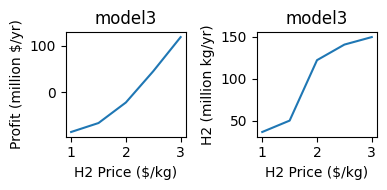

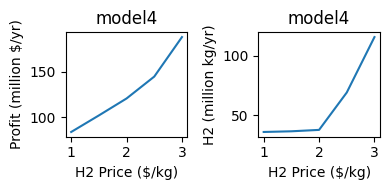

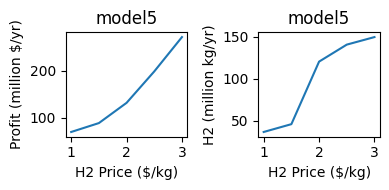

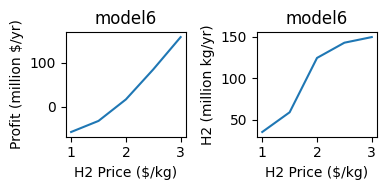

HighSolarTax_2030


LMP Range ($/MWh) = (-6.02e-07, 1800.0)
LMP Median ($/MWh) = 40.10
LMP number of data = 8760
LMP Mean ($/MWh) = 45.43
LMP Variance = 7374.53
LMP Skew = 13.875086661038615
LMP Kurtosis = 229.35000056039954
Bimodality Coefficient = 0.8328692634872804
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -86.37   80.35   67.33 -57.26
Fuel Cost (Million $/yr)      180.37  108.88  135.77    0.0
CO2 Tax (Million $/yr)          6.14    2.22    2.77    0.0
Power Capacity Factor (%)      75.59   55.38    69.2    NaN
Hydrogen Capacity Factor (%)   22.45   22.15   22.47  21.37
Power (Million MWh/yr)           4.3    3.15    4.32  -1.33
Hydrogen (Million kg/yr)        35.4   34.92   35.44  33.69
Power only mode (%)             77.4   77.85   77.41    0.0
Hydrogen only mode (%)           0.0   22.15     0.0  45.59
Hydrogen + power mode (%)       22.6     0.0   22.59    0.0
Off mode (%)                     0.0     0.0     0.0  54.41


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)         -66.56   97.98   86.69 -35.31
Fuel Cost (Million $/yr)      180.07  108.29  135.63    0.0
CO2 Tax (Million $/yr)          6.12    2.21    2.77    0.0
Power Capacity Factor (%)      58.92   54.25    58.8    NaN
Hydrogen Capacity Factor (%)   37.81   22.71    32.9  36.24
Power (Million MWh/yr)          3.36    3.09    3.67  -2.26
Hydrogen (Million kg/yr)       59.62    35.8   51.87  57.15
Power only mode (%)            60.08   77.29   60.42    0.0
Hydrogen only mode (%)           0.0   22.71     0.0  85.78
Hydrogen + power mode (%)      39.92     0.0   39.58    0.0
Off mode (%)                     0.0     0.0     0.0  14.22


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)         -38.97   56.67  -18.04  116.62  134.36    16.5
Fuel Cost (Million $/yr)      139.27  113.69  180.36  106.25  136.31     0.0
CO2 Tax (Million $/yr)          4.74    2.32    6.13    2.17    2.78     0.0
Power Capacity Factor (%)      77.19   86.22   16.23   50.32   15.08     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   77.17   24.66   76.71    78.9
Power (Million MWh/yr)           4.4    4.91    0.92    2.87    0.94   -4.97
Hydrogen (Million kg/yr)         0.0     0.0  121.69   38.88  120.96  124.42
Power only mode (%)            77.19   100.0   21.84   75.34   22.64     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   24.66     0.0   97.12
Hydrogen + power mode (%)        0.0     0.0   78.16     0.0   77.36     0.0
Off mode (%)                   22.81     0.0     0.0     0.0     0.0    2.88


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          46.98  143.98   199.0   82.33
Fuel Cost (Million $/yr)      180.36   76.74  136.44     0.0
CO2 Tax (Million $/yr)          6.13    1.57    2.78     0.0
Power Capacity Factor (%)       4.04   -6.56    3.64     NaN
Hydrogen Capacity Factor (%)   88.41   52.89   88.17   87.57
Power (Million MWh/yr)          0.23   -0.37    0.23   -5.52
Hydrogen (Million kg/yr)       139.4   83.39  139.03  138.08
Power only mode (%)            10.68   47.11   11.58     0.0
Hydrogen only mode (%)           0.0   52.89     0.0   97.95
Hydrogen + power mode (%)      89.32     0.0   88.42     0.0
Off mode (%)                     0.0     0.0     0.0    2.05


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)         120.25  192.61  272.07  155.29
Fuel Cost (Million $/yr)      180.46   53.71  136.52     0.0
CO2 Tax (Million $/yr)          6.14     1.1    2.79     0.0
Power Capacity Factor (%)      -3.23  -50.95   -3.23     NaN
Hydrogen Capacity Factor (%)   95.11   74.92   95.05   95.26
Power (Million MWh/yr)         -0.18    -2.9    -0.2   -6.01
Hydrogen (Million kg/yr)      149.97  118.13  149.88   150.2
Power only mode (%)             4.77   25.08    4.91     0.0
Hydrogen only mode (%)           0.0   74.92     0.0   99.18
Hydrogen + power mode (%)      95.23     0.0   95.09     0.0
Off mode (%)                     0.0     0.0     0.0    0.82

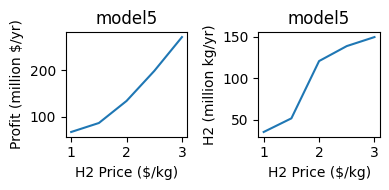

WinterNYTax_2030


LMP Range ($/MWh) = (1.36e-08, 1800.000005)
LMP Median ($/MWh) = 46.22
LMP number of data = 8760
LMP Mean ($/MWh) = 48.00
LMP Variance = 1977.90
LMP Skew = 22.446358288616818
LMP Kurtosis = 734.6825399868422
Bimodality Coefficient = 0.6843571179761029
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         -86.94   72.97    65.1 -66.84
Fuel Cost (Million $/yr)      180.39  119.76  140.15    0.0
CO2 Tax (Million $/yr)          6.14    2.44    2.86    0.0
Power Capacity Factor (%)      87.01   76.36   84.17    NaN
Hydrogen Capacity Factor (%)   11.94   11.74   11.92    2.1
Power (Million MWh/yr)          4.95    4.35    5.25  -0.13
Hydrogen (Million kg/yr)       18.83    18.5   18.79   3.32
Power only mode (%)            87.99   88.26    88.0    0.0
Hydrogen only mode (%)           0.0   11.74     0.0   3.98
Hydrogen + power mode (%)      12.01     0.0    12.0    0.0
Off mode (%)                     0.0     0.0     0.0  96.02


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)         -76.59   82.33   75.33 -57.18
Fuel Cost (Million $/yr)      180.33  119.46  140.19    0.0
CO2 Tax (Million $/yr)          6.13    2.44    2.86    0.0
Power Capacity Factor (%)      81.69   75.78   79.57    NaN
Hydrogen Capacity Factor (%)   16.85   12.02   16.52  20.31
Power (Million MWh/yr)          4.65    4.31    4.96  -1.26
Hydrogen (Million kg/yr)       26.57   18.95   26.06  32.02
Power only mode (%)            82.12   87.98   83.29    0.0
Hydrogen only mode (%)           0.0   12.02     0.0  51.85
Hydrogen + power mode (%)      17.88     0.0   16.71    0.0
Off mode (%)                     0.0     0.0     0.0  48.15


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)         -39.06   65.17  -46.49   91.92  103.96  -23.81
Fuel Cost (Million $/yr)      158.77  122.13  180.14  118.09  140.62     0.0
CO2 Tax (Million $/yr)           5.4    2.49    6.13    2.41    2.87     0.0
Power Capacity Factor (%)       88.0   92.56   22.96   73.14   27.42     NaN
Hydrogen Capacity Factor (%)     NaN     NaN    71.0   13.33   68.78    70.9
Power (Million MWh/yr)          5.01    5.27    1.31    4.16    1.71   -4.46
Hydrogen (Million kg/yr)         0.0     0.0  111.95   21.02  108.45  111.79
Power only mode (%)            88.03   100.0   25.63   86.67   28.38     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   13.33     0.0   93.86
Hydrogen + power mode (%)        0.0     0.0   74.37     0.0   71.62     0.0
Off mode (%)                   11.97     0.0     0.0     0.0     0.0    6.14


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          19.74  104.68  169.65   43.55
Fuel Cost (Million $/yr)      180.43  112.23  140.94     0.0
CO2 Tax (Million $/yr)          6.14    2.29    2.88     0.0
Power Capacity Factor (%)       1.27   61.84    5.51     NaN
Hydrogen Capacity Factor (%)   90.99   18.94   90.74    91.4
Power (Million MWh/yr)          0.07    3.52    0.34   -5.76
Hydrogen (Million kg/yr)      143.47   29.86  143.08  144.12
Power only mode (%)             8.13   81.06    8.81     0.0
Hydrogen only mode (%)           0.0   18.94     0.0   99.59
Hydrogen + power mode (%)      91.87     0.0   91.19     0.0
Off mode (%)                     0.0     0.0     0.0    0.41


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          93.84  130.79  243.61  118.19
Fuel Cost (Million $/yr)       180.5   71.66  141.01     0.0
CO2 Tax (Million $/yr)          6.14    1.46    2.88     0.0
Power Capacity Factor (%)      -3.74  -16.36    0.68     NaN
Hydrogen Capacity Factor (%)   95.61   57.75   95.58   96.34
Power (Million MWh/yr)         -0.21   -0.93    0.04   -6.07
Hydrogen (Million kg/yr)      150.76   91.06  150.72  151.91
Power only mode (%)             4.28   42.25    4.38     0.0
Hydrogen only mode (%)           0.0   57.75     0.0   100.0
Hydrogen + power mode (%)      95.72     0.0   95.62     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

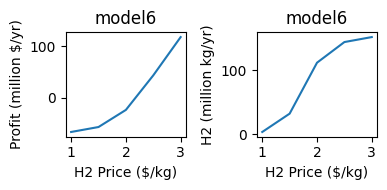

BaseCaseCapRes_2030


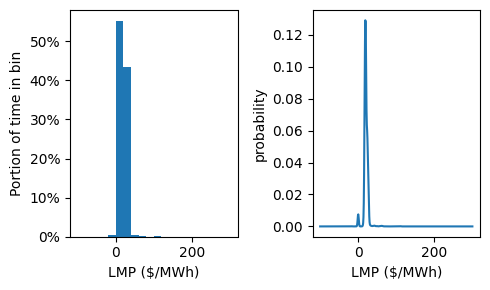

LMP Range ($/MWh) = (-330.0078856, 111.6506992)
LMP Median ($/MWh) = 19.98
LMP number of data = 8760
LMP Mean ($/MWh) = 20.11
LMP Variance = 75.92
LMP Skew = -16.803141109865322
LMP Kurtosis = 641.5744755465334
Bimodality Coefficient = 0.439584733971558
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -221.54 -84.29  -89.49  -35.78
Fuel Cost (Million $/yr)         0.0  73.02  143.03     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)        0.0 -13.74    7.34     NaN
Hydrogen Capacity Factor (%)     0.0  56.45   90.75   85.52
Power (Million MWh/yr)           0.0  -0.78    0.46   -5.39
Hydrogen (Million kg/yr)         0.0  89.01  143.09  134.84
Power only mode (%)              0.0  43.55    9.01     0.0
Hydrogen only mode (%)           0.0  56.45     0.0   100.0
Hydrogen + power mode (%)        0.0    0.0   90.99     0.0
Off mode (%)                   100.0    0.0     0.0     0.0


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -147.51  -21.24  -12.32    42.2
Fuel Cost (Million $/yr)       180.5   28.97  143.12     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.66  -98.63   -1.09     NaN
Hydrogen Capacity Factor (%)   99.22   98.58   99.19   99.34
Power (Million MWh/yr)         -0.44   -5.62   -0.07   -6.26
Hydrogen (Million kg/yr)      156.45  155.45  156.41  156.64
Power only mode (%)             0.66    1.42    0.79     0.0
Hydrogen only mode (%)           0.0   98.58     0.0   100.0
Hydrogen + power mode (%)      99.34     0.0   99.21     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -171.19  -95.57  -69.14    56.7   66.05  120.66
Fuel Cost (Million $/yr)        2.39  127.62  180.52   28.42  143.13     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)       1.32    96.7   -8.03  -99.69   -1.47     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   99.57   99.11   99.57   99.64
Power (Million MWh/yr)          0.08    5.51   -0.46   -5.68   -0.09   -6.28
Hydrogen (Million kg/yr)         0.0     0.0   157.0  156.28   157.0  157.12
Power only mode (%)             1.32   100.0    0.41    0.89    0.41     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   99.11     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   99.59     0.0   99.59     0.0
Off mode (%)                   98.68     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)           9.44  134.89  144.62  199.29
Fuel Cost (Million $/yr)      180.52   28.31  143.13     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -8.32   -99.9   -1.73     NaN
Hydrogen Capacity Factor (%)   99.85   99.21   99.84   99.85
Power (Million MWh/yr)         -0.47   -5.69   -0.11    -6.3
Hydrogen (Million kg/yr)      157.44  156.44  157.42  157.45
Power only mode (%)             0.13    0.79    0.14     0.0
Hydrogen only mode (%)           0.0   99.21     0.0   100.0
Hydrogen + power mode (%)      99.87     0.0   99.86     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)           88.2  213.29  223.38  278.06
Fuel Cost (Million $/yr)      180.53    28.0  143.13     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -8.39 -100.49   -1.81     NaN
Hydrogen Capacity Factor (%)   99.91   99.51   99.91   99.93
Power (Million MWh/yr)         -0.48   -5.72   -0.11    -6.3
Hydrogen (Million kg/yr)      157.54  156.91  157.54  157.56
Power only mode (%)             0.09    0.49    0.09     0.0
Hydrogen only mode (%)           0.0   99.51     0.0   100.0
Hydrogen + power mode (%)      99.91     0.0   99.91     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

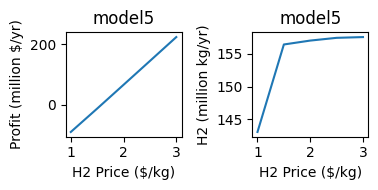

HighWindCapRes_2030


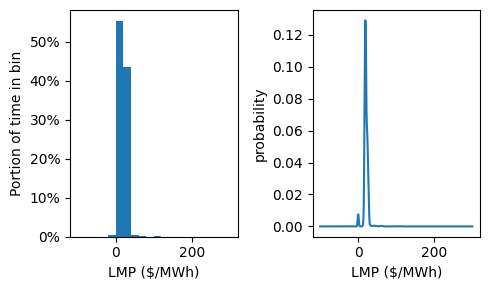

LMP Range ($/MWh) = (-330.0078845, 111.6506988)
LMP Median ($/MWh) = 19.98
LMP number of data = 8760
LMP Mean ($/MWh) = 20.11
LMP Variance = 75.92
LMP Skew = -16.80314056687711
LMP Kurtosis = 641.5744284405772
Bimodality Coefficient = 0.4395847377868514
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -221.54 -84.29  -89.49  -35.78
Fuel Cost (Million $/yr)         0.0  73.02  143.03     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)        0.0 -13.74    7.33     NaN
Hydrogen Capacity Factor (%)     0.0  56.45   90.75   85.52
Power (Million MWh/yr)           0.0  -0.78    0.46   -5.39
Hydrogen (Million kg/yr)         0.0  89.01  143.09  134.84
Power only mode (%)              0.0  43.55    9.01     0.0
Hydrogen only mode (%)           0.0  56.45     0.0   100.0
Hydrogen + power mode (%)        0.0    0.0   90.99     0.0
Off mode (%)                   100.0    0.0     0.0     0.0


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -147.51  -21.24  -12.32    42.2
Fuel Cost (Million $/yr)      180.51   28.99  143.12     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.65  -98.58    -1.1     NaN
Hydrogen Capacity Factor (%)   99.21   98.56    99.2   99.34
Power (Million MWh/yr)         -0.44   -5.61   -0.07   -6.26
Hydrogen (Million kg/yr)      156.44  155.41  156.42  156.64
Power only mode (%)             0.66    1.44    0.76     0.0
Hydrogen only mode (%)           0.0   98.56     0.0   100.0
Hydrogen + power mode (%)      99.34     0.0   99.24     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -171.19  -95.57  -69.14    56.7   66.05  120.66
Fuel Cost (Million $/yr)        2.39  127.62  180.52   28.42  143.13     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)       1.32    96.7   -8.03  -99.69   -1.47     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   99.57   99.11   99.57   99.63
Power (Million MWh/yr)          0.08    5.51   -0.46   -5.68   -0.09   -6.28
Hydrogen (Million kg/yr)         0.0     0.0   157.0  156.28   157.0   157.1
Power only mode (%)             1.32   100.0    0.41    0.89    0.41     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   99.11     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   99.59     0.0   99.59     0.0
Off mode (%)                   98.68     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)           9.44   134.9  144.62  199.29
Fuel Cost (Million $/yr)      180.52   28.23  143.13     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -8.34 -100.06   -1.73     NaN
Hydrogen Capacity Factor (%)   99.86   99.29   99.84   99.85
Power (Million MWh/yr)         -0.48    -5.7   -0.11    -6.3
Hydrogen (Million kg/yr)      157.46  156.56  157.42  157.45
Power only mode (%)             0.08    0.71    0.14     0.0
Hydrogen only mode (%)           0.0   99.29     0.0   100.0
Hydrogen + power mode (%)      99.92     0.0   99.86     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)           88.2  213.29  223.38  278.06
Fuel Cost (Million $/yr)      180.53    28.0  143.13     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -8.39 -100.49   -1.81     NaN
Hydrogen Capacity Factor (%)   99.91   99.51   99.91   99.93
Power (Million MWh/yr)         -0.48   -5.72   -0.11    -6.3
Hydrogen (Million kg/yr)      157.54  156.91  157.54  157.56
Power only mode (%)             0.09    0.49    0.09     0.0
Hydrogen only mode (%)           0.0   99.51     0.0   100.0
Hydrogen + power mode (%)      99.91     0.0   99.91     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

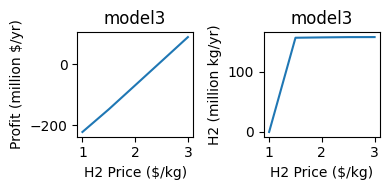

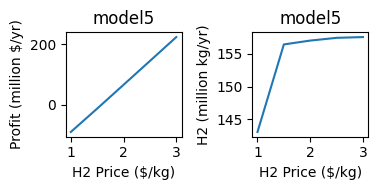

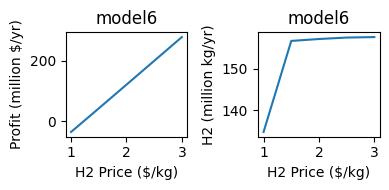

HighSolarCapRes_2030


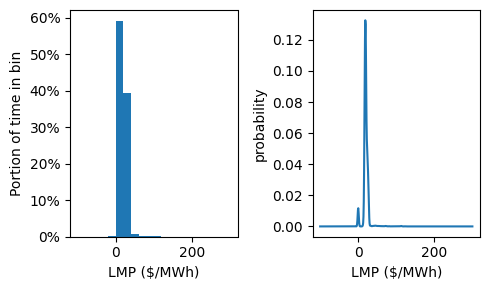

LMP Range ($/MWh) = (-266.2156793, 123.8209637)
LMP Median ($/MWh) = 19.62
LMP number of data = 8760
LMP Mean ($/MWh) = 19.96
LMP Variance = 77.81
LMP Skew = -4.11721574219965
LMP Kurtosis = 250.20043243989696
Bimodality Coefficient = 0.07089795395190325
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -232.47 -82.03  -87.79  -33.52
Fuel Cost (Million $/yr)      135.67   69.1  142.24     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      21.44 -21.28    6.45     NaN
Hydrogen Capacity Factor (%)   46.12  60.19   90.88   86.66
Power (Million MWh/yr)          1.22  -1.21     0.4   -5.46
Hydrogen (Million kg/yr)       72.73  94.91  143.31  136.64
Power only mode (%)            50.07  39.81     9.1     0.0
Hydrogen only mode (%)           0.0  60.19     0.0   100.0
Hydrogen + power mode (%)      49.93    0.0    90.9     0.0
Off mode (%)                     0.0    0.0     0.0     0.0


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -146.23  -17.61  -10.89  44.16
Fuel Cost (Million $/yr)      180.51   29.11  142.31    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)      -7.11  -98.35   -1.35    NaN
Hydrogen Capacity Factor (%)   98.71   98.45    98.7  98.93
Power (Million MWh/yr)          -0.4    -5.6   -0.08  -6.24
Hydrogen (Million kg/yr)      155.65  155.23  155.63  156.0
Power only mode (%)             1.19    1.55    1.24    0.0
Hydrogen only mode (%)           0.0   98.45     0.0  100.0
Hydrogen + power mode (%)      98.81     0.0   98.76    0.0
Off mode (%)                     0.0     0.0     0.0    0.0


H2 Price ($/kg) = 2.0


model0 model1  model3  model4  model5  model6
Profit (Million $/yr)        -169.92  -95.8  -68.23   60.05    67.1  122.31
Fuel Cost (Million $/yr)        2.68  126.3  180.51   28.89  142.32     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)       1.48  95.71   -7.59  -98.79   -1.81     NaN
Hydrogen Capacity Factor (%)     NaN    NaN   99.16   98.66   99.16    99.3
Power (Million MWh/yr)          0.08   5.45   -0.43   -5.63   -0.11   -6.26
Hydrogen (Million kg/yr)         0.0    0.0  156.35  155.57  156.36  156.57
Power only mode (%)             1.48  100.0    0.81    1.34    0.82     0.0
Hydrogen only mode (%)           0.0    0.0     0.0   98.66     0.0   100.0
Hydrogen + power mode (%)        0.0    0.0   99.19     0.0   99.18     0.0
Off mode (%)                   98.52    0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          10.09  137.87  145.41  200.72
Fuel Cost (Million $/yr)      180.52   28.75  142.32     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.91  -99.04   -2.11     NaN
Hydrogen Capacity Factor (%)   99.46   98.79   99.46   99.56
Power (Million MWh/yr)         -0.45   -5.64   -0.13   -6.28
Hydrogen (Million kg/yr)      156.83  155.77  156.82  156.99
Power only mode (%)             0.51    1.21    0.53     0.0
Hydrogen only mode (%)           0.0   98.79     0.0   100.0
Hydrogen + power mode (%)      99.49     0.0   99.47     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          88.59  215.86  223.91  279.28
Fuel Cost (Million $/yr)      180.52   28.44  142.33     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -8.17  -99.64   -2.34     NaN
Hydrogen Capacity Factor (%)    99.7   99.09   99.69   99.74
Power (Million MWh/yr)         -0.47   -5.67   -0.15   -6.29
Hydrogen (Million kg/yr)       157.2  156.24   157.2  157.28
Power only mode (%)              0.3    0.91     0.3     0.0
Hydrogen only mode (%)           0.0   99.09     0.0   100.0
Hydrogen + power mode (%)       99.7     0.0    99.7     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

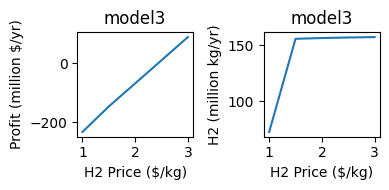

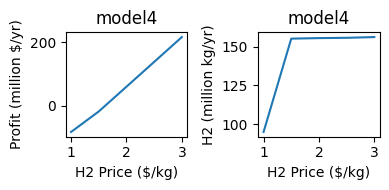

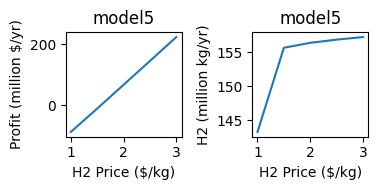

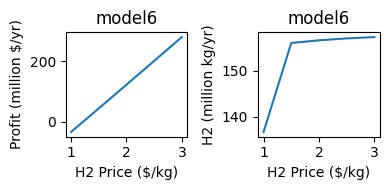

WinterNYCapRes_2030


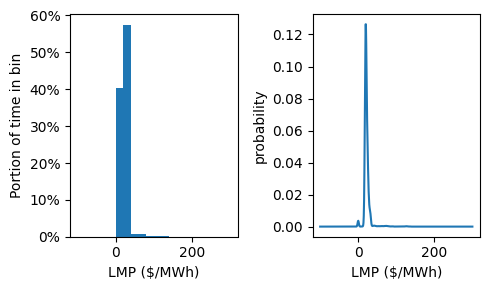

LMP Range ($/MWh) = (1.06e-08, 135.5121691)
LMP Median ($/MWh) = 20.52
LMP number of data = 8760
LMP Mean ($/MWh) = 22.36
LMP Variance = 94.18
LMP Skew = 6.37877398219945
LMP Kurtosis = 56.967492503139276
Bimodality Coefficient = 0.6951773582764894
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3 model4  model5  model6
Profit (Million $/yr)        -217.66  -81.0   -83.8  -44.62
Fuel Cost (Million $/yr)       49.48  87.84  144.52     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)      10.11  14.83   14.51     NaN
Hydrogen Capacity Factor (%)   16.03  42.27   84.84   77.85
Power (Million MWh/yr)          0.58   0.84     0.9    -4.9
Hydrogen (Million kg/yr)       25.28  66.65  133.77  122.75
Power only mode (%)            10.39  57.73   13.85     0.0
Hydrogen only mode (%)           0.0  42.27     0.0   93.22
Hydrogen + power mode (%)      17.11    0.0   86.15     0.0
Off mode (%)                    72.5    0.0     0.0    6.78


H2 Price ($/kg) = 1.5


model3  model4  model5  model6
Profit (Million $/yr)        -144.76  -23.16   -9.38   31.23
Fuel Cost (Million $/yr)      180.54   36.34   144.7     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -6.14  -84.42    1.52     NaN
Hydrogen Capacity Factor (%)   97.85   91.53   97.85   98.26
Power (Million MWh/yr)         -0.35   -4.81    0.09    -6.2
Hydrogen (Million kg/yr)      154.28  144.32  154.29  154.93
Power only mode (%)             2.13    8.47    2.12     0.0
Hydrogen only mode (%)           0.0   91.53     0.0   100.0
Hydrogen + power mode (%)      97.87     0.0   97.88     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.0


model0  model1  model3 model4  model5  model6
Profit (Million $/yr)        -165.96  -84.34  -67.37  51.51    68.0   108.9
Fuel Cost (Million $/yr)       16.27  130.41  180.54  29.86  144.71     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0     0.0     0.0
Power Capacity Factor (%)       9.02   98.79   -6.72 -96.91     1.0     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   98.38  97.73   98.37   98.68
Power (Million MWh/yr)          0.51    5.62   -0.38  -5.52    0.06   -6.22
Hydrogen (Million kg/yr)         0.0     0.0  155.12  154.1  155.11  155.59
Power only mode (%)             9.02   100.0    1.59   2.27    1.62     0.0
Hydrogen only mode (%)           0.0     0.0     0.0  97.73     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   98.41    0.0   98.38     0.0
Off mode (%)                   90.98     0.0     0.0    0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          10.34  128.65   145.7  186.82
Fuel Cost (Million $/yr)      180.54   29.55  144.71     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.12   -97.5    0.66     NaN
Hydrogen Capacity Factor (%)   98.75   98.03   98.71   98.95
Power (Million MWh/yr)         -0.41   -5.55    0.04   -6.24
Hydrogen (Million kg/yr)       155.7  154.57  155.65  156.02
Power only mode (%)             1.19    1.97    1.28     0.0
Hydrogen only mode (%)           0.0   98.03     0.0   100.0
Hydrogen + power mode (%)      98.81     0.0   98.72     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          88.37  206.06   223.7  264.98
Fuel Cost (Million $/yr)      180.54   29.26  144.71     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)      -7.63  -98.08    0.17     NaN
Hydrogen Capacity Factor (%)   99.22   98.31    99.2   99.33
Power (Million MWh/yr)         -0.43   -5.58    0.01   -6.26
Hydrogen (Million kg/yr)      156.44  155.02  156.42  156.63
Power only mode (%)             0.74    1.69    0.75     0.0
Hydrogen only mode (%)           0.0   98.31     0.0   100.0
Hydrogen + power mode (%)      99.26     0.0   99.25     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

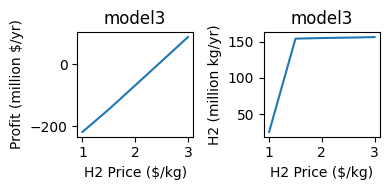

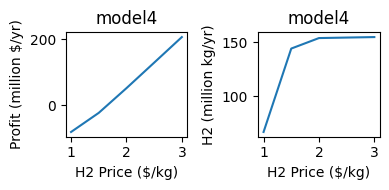

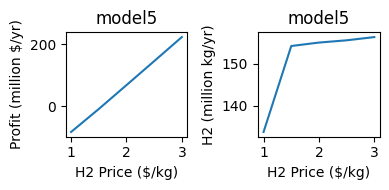

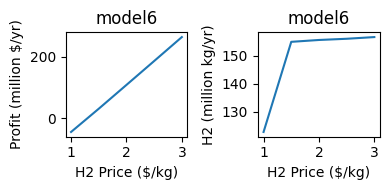

BaseCaseTaxCapRes_2030


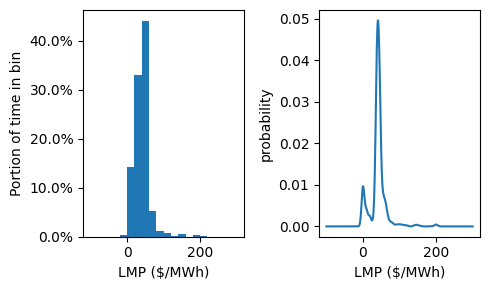

LMP Range ($/MWh) = (-1.44e-06, 209.1004493)
LMP Median ($/MWh) = 40.10
LMP number of data = 8760
LMP Mean ($/MWh) = 40.85
LMP Variance = 540.37
LMP Skew = 2.2175061359139203
LMP Kurtosis = 13.808811585270817
Bimodality Coefficient = 0.3520160622178978
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -122.44   40.18   27.04 -63.46
Fuel Cost (Million $/yr)      180.39  116.67  138.97    0.0
CO2 Tax (Million $/yr)          6.14    2.38    2.84    0.0
Power Capacity Factor (%)      83.79    70.4   79.74    NaN
Hydrogen Capacity Factor (%)    14.9   14.69   14.92  13.67
Power (Million MWh/yr)          4.77    4.01    4.97  -0.85
Hydrogen (Million kg/yr)        23.5   23.17   23.52  21.55
Power only mode (%)             85.0   85.31    85.0    0.0
Hydrogen only mode (%)           0.0   14.69     0.0  34.37
Hydrogen + power mode (%)       15.0     0.0    15.0    0.0
Off mode (%)                     0.0     0.0     0.0  65.63


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -108.78   51.88   40.18 -45.33
Fuel Cost (Million $/yr)      180.05  116.29  138.81    0.0
CO2 Tax (Million $/yr)          6.12    2.37    2.83    0.0
Power Capacity Factor (%)       66.1   69.66   68.61    NaN
Hydrogen Capacity Factor (%)   31.22   15.06   26.07  26.65
Power (Million MWh/yr)          3.76    3.97    4.28  -1.66
Hydrogen (Million kg/yr)       49.23   23.74   41.11  42.02
Power only mode (%)            66.61   84.94   66.62    0.0
Hydrogen only mode (%)           0.0   15.06     0.0  67.21
Hydrogen + power mode (%)      33.39     0.0   33.38    0.0
Off mode (%)                     0.0     0.0     0.0  32.79


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -74.68   26.82  -57.74    64.2    90.1    8.03
Fuel Cost (Million $/yr)      153.3  120.33  180.42  114.58  139.68     0.0
CO2 Tax (Million $/yr)         5.21    2.46    6.14    2.34    2.85     0.0
Power Capacity Factor (%)     84.97   91.21    8.64   66.37   10.67     NaN
Hydrogen Capacity Factor (%)    NaN     NaN   84.19   16.69   84.14   86.68
Power (Million MWh/yr)         4.84    5.19    0.49    3.78    0.67   -5.46
Hydrogen (Million kg/yr)        0.0     0.0  132.75   26.32  132.66  136.68
Power only mode (%)           84.98   100.0   15.16   83.31   15.72     0.0
Hydrogen only mode (%)          0.0     0.0     0.0   16.69     0.0   100.0
Hydrogen + power mode (%)       0.0     0.0   84.84     0.0   84.28     0.0
Off mode (%)                  15.02     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)          12.64  86.77  160.16   79.64
Fuel Cost (Million $/yr)      180.44   76.5  139.78     0.0
CO2 Tax (Million $/yr)          6.14   1.56    2.85     0.0
Power Capacity Factor (%)      -1.78  -7.02    0.96     NaN
Hydrogen Capacity Factor (%)   93.79  53.12   93.87    94.0
Power (Million MWh/yr)          -0.1   -0.4    0.06   -5.92
Hydrogen (Million kg/yr)      147.89  83.75  148.02  148.22
Power only mode (%)             5.73  46.88    6.06     0.0
Hydrogen only mode (%)           0.0  53.12     0.0   100.0
Hydrogen + power mode (%)      94.27    0.0   93.94     0.0
Off mode (%)                     0.0    0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          87.91  138.56  235.37   155.5
Fuel Cost (Million $/yr)      180.49   44.98   139.8     0.0
CO2 Tax (Million $/yr)          6.14    0.92    2.85     0.0
Power Capacity Factor (%)      -4.52  -67.76   -1.42     NaN
Hydrogen Capacity Factor (%)   96.32   83.26   96.25   96.99
Power (Million MWh/yr)         -0.26   -3.86   -0.09   -6.11
Hydrogen (Million kg/yr)      151.88  131.29  151.77  152.93
Power only mode (%)             3.42   16.74    3.71     0.0
Hydrogen only mode (%)           0.0   83.26     0.0   100.0
Hydrogen + power mode (%)      96.58     0.0   96.29     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

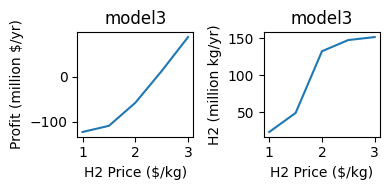

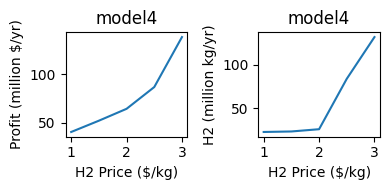

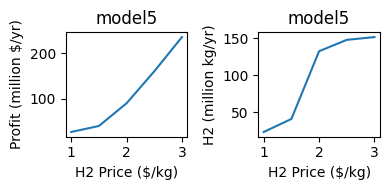

HighWindTaxCapRes_2030


LMP Range ($/MWh) = (-3.8e-06, 202.8804025)
LMP Median ($/MWh) = 40.10
LMP number of data = 8760
LMP Mean ($/MWh) = 37.49
LMP Variance = 571.74
LMP Skew = 1.2751050846062009
LMP Kurtosis = 8.249552298158832
Bimodality Coefficient = 0.23340067415176394
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -130.14   38.24   20.07 -56.68
Fuel Cost (Million $/yr)      180.37  109.51  135.76    0.0
CO2 Tax (Million $/yr)          6.14    2.23    2.77    0.0
Power Capacity Factor (%)      76.43    56.6   69.66    NaN
Hydrogen Capacity Factor (%)   21.67   21.54   21.63  22.08
Power (Million MWh/yr)          4.35    3.22    4.34  -1.38
Hydrogen (Million kg/yr)       34.18   33.97   34.11  34.82
Power only mode (%)            78.28   78.46   78.29    0.0
Hydrogen only mode (%)           0.0   21.54     0.0  51.27
Hydrogen + power mode (%)      21.72     0.0   21.71    0.0
Off mode (%)                     0.0     0.0     0.0  48.73


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -111.61   55.28   38.16 -29.96
Fuel Cost (Million $/yr)      180.08  109.32  135.66    0.0
CO2 Tax (Million $/yr)          6.13    2.23    2.77    0.0
Power Capacity Factor (%)      62.13   56.23    60.3    NaN
Hydrogen Capacity Factor (%)   34.86   21.72   31.01  37.82
Power (Million MWh/yr)          3.54     3.2    3.76  -2.35
Hydrogen (Million kg/yr)       54.97   34.25   48.89  59.63
Power only mode (%)            61.79   78.28   63.74    0.0
Hydrogen only mode (%)           0.0   21.72     0.0   96.2
Hydrogen + power mode (%)      38.21     0.0   36.26    0.0
Off mode (%)                     0.0     0.0     0.0    3.8


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)         -82.85   12.63  -60.55   72.82    88.1    25.5
Fuel Cost (Million $/yr)      141.21  114.55  180.34  108.04   136.4     0.0
CO2 Tax (Million $/yr)           4.8    2.34    6.13     2.2    2.78     0.0
Power Capacity Factor (%)      78.27   86.86    6.79   53.77    5.87     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   85.88   22.95   85.55   87.46
Power (Million MWh/yr)          4.46    4.95    0.39    3.06    0.37   -5.51
Hydrogen (Million kg/yr)         0.0     0.0  135.42   36.18  134.89  137.91
Power only mode (%)            78.28   100.0   12.35   77.05   13.98     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   22.95     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   87.65     0.0   86.02     0.0
Off mode (%)                   21.72     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)           11.7  98.39  160.13   98.73
Fuel Cost (Million $/yr)      180.46  76.72  136.51     0.0
CO2 Tax (Million $/yr)          6.14   1.57    2.79     0.0
Power Capacity Factor (%)      -2.25  -6.61    -2.7     NaN
Hydrogen Capacity Factor (%)   94.21  52.91   94.14   95.12
Power (Million MWh/yr)         -0.13  -0.38   -0.17    -6.0
Hydrogen (Million kg/yr)      148.54  83.43  148.44  149.99
Power only mode (%)             5.53  47.09    5.79     0.0
Hydrogen only mode (%)           0.0  52.91     0.0   100.0
Hydrogen + power mode (%)      94.47    0.0   94.21     0.0
Off mode (%)                     0.0    0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          87.35  149.47  235.68  174.86
Fuel Cost (Million $/yr)      180.47   45.45  136.53     0.0
CO2 Tax (Million $/yr)          6.14    0.93    2.79     0.0
Power Capacity Factor (%)      -4.98  -66.87    -5.2     NaN
Hydrogen Capacity Factor (%)   96.73   82.82   96.65   97.29
Power (Million MWh/yr)         -0.28   -3.81   -0.32   -6.13
Hydrogen (Million kg/yr)      152.52  130.59   152.4   153.4
Power only mode (%)             3.15   17.18    3.28     0.0
Hydrogen only mode (%)           0.0   82.82     0.0   100.0
Hydrogen + power mode (%)      96.85     0.0   96.72     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

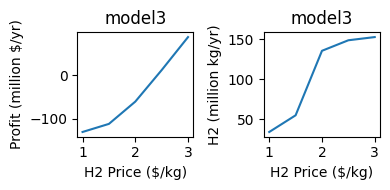

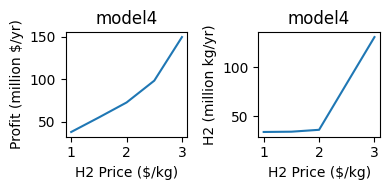

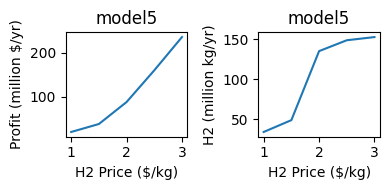

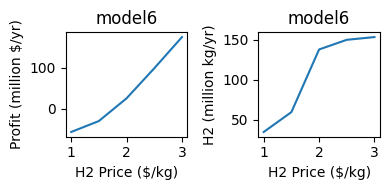

HighSolarTaxCapRes_2030


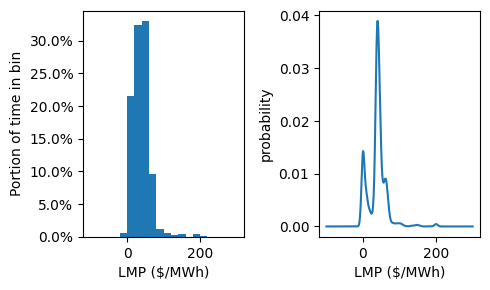

LMP Range ($/MWh) = (-1.950964584, 205.2991611)
LMP Median ($/MWh) = 39.91
LMP number of data = 8760
LMP Mean ($/MWh) = 38.28
LMP Variance = 637.02
LMP Skew = 1.609371252676356
LMP Kurtosis = 9.197442504371423
Bimodality Coefficient = 0.294305412301117
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4 model5 model6
Profit (Million $/yr)        -126.84   40.05  23.04 -54.32
Fuel Cost (Million $/yr)      180.37  108.88  135.7    0.0
CO2 Tax (Million $/yr)          6.13    2.22   2.77    0.0
Power Capacity Factor (%)      75.42   55.38  68.96    NaN
Hydrogen Capacity Factor (%)    22.6   22.15  22.63   23.7
Power (Million MWh/yr)          4.29    3.15    4.3  -1.48
Hydrogen (Million kg/yr)       35.64   34.92  35.69  37.37
Power only mode (%)            77.25   77.85  77.29    0.0
Hydrogen only mode (%)           0.0   22.15    0.0  49.09
Hydrogen + power mode (%)      22.75     0.0  22.71    0.0
Off mode (%)                     0.0     0.0    0.0  50.91


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -106.46   57.75   42.86 -29.67
Fuel Cost (Million $/yr)      179.96  108.08  135.55    0.0
CO2 Tax (Million $/yr)          6.12    2.21    2.77    0.0
Power Capacity Factor (%)       54.8   53.84   55.68    NaN
Hydrogen Capacity Factor (%)   41.62   22.91   35.94  36.71
Power (Million MWh/yr)          3.12    3.07    3.47  -2.29
Hydrogen (Million kg/yr)       65.62   36.13   56.67  57.88
Power only mode (%)            52.92   77.09   56.63    0.0
Hydrogen only mode (%)           0.0   22.91     0.0  82.99
Hydrogen + power mode (%)      47.08     0.0   43.37    0.0
Off mode (%)                     0.0     0.0     0.0  17.01


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)         -79.29   16.08  -54.29   76.79   94.23   26.18
Fuel Cost (Million $/yr)      139.23  113.52  180.39  105.41  136.28     0.0
CO2 Tax (Million $/yr)          4.74    2.32    6.14    2.15    2.78     0.0
Power Capacity Factor (%)      77.17   86.09   12.86   48.69   11.53     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   80.27   25.47   80.19   83.73
Power (Million MWh/yr)          4.39     4.9    0.73    2.77    0.72   -5.27
Hydrogen (Million kg/yr)         0.0     0.0  126.58   40.16  126.44  132.02
Power only mode (%)            77.17   100.0   19.18   74.53   19.58     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   25.47     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   80.82     0.0   80.42     0.0
Off mode (%)                   22.83     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)          12.95  106.09   161.1   95.18
Fuel Cost (Million $/yr)      180.37   70.31  136.39     0.0
CO2 Tax (Million $/yr)          6.13    1.43    2.78     0.0
Power Capacity Factor (%)       0.85  -18.96     0.7     NaN
Hydrogen Capacity Factor (%)   91.35   59.04   91.04   91.04
Power (Million MWh/yr)          0.05   -1.08    0.04   -5.74
Hydrogen (Million kg/yr)      144.04    93.1  143.54  143.55
Power only mode (%)             7.48   40.96    8.68     0.0
Hydrogen only mode (%)           0.0   59.04     0.0   100.0
Hydrogen + power mode (%)      92.52     0.0   91.32     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          88.03  158.92  236.04  170.72
Fuel Cost (Million $/yr)      180.47   49.51  136.46     0.0
CO2 Tax (Million $/yr)          6.14    1.01    2.78     0.0
Power Capacity Factor (%)      -5.03  -59.05   -4.99     NaN
Hydrogen Capacity Factor (%)   96.77   78.94   96.74   97.35
Power (Million MWh/yr)         -0.29   -3.36   -0.31   -6.14
Hydrogen (Million kg/yr)      152.59  124.47  152.54   153.5
Power only mode (%)             3.13   21.06    3.24     0.0
Hydrogen only mode (%)           0.0   78.94     0.0   100.0
Hydrogen + power mode (%)      96.87     0.0   96.76     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

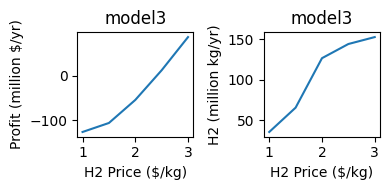

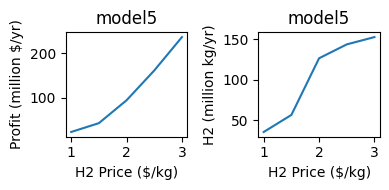

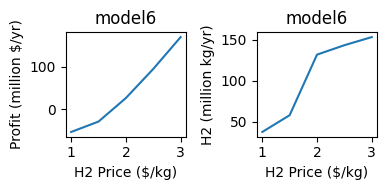

WinterNYTaxCapRes_2030


LMP Range ($/MWh) = (7.11e-08, 223.2342364)
LMP Median ($/MWh) = 43.68
LMP number of data = 8760
LMP Mean ($/MWh) = 41.83
LMP Variance = 442.47
LMP Skew = 1.7697487385003108
LMP Kurtosis = 10.502584024215995
Bimodality Coefficient = 0.30599299319161616
Natural Gas Price ($/million BTU) = 2.94

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -119.52   41.45   29.62  -63.8
Fuel Cost (Million $/yr)      180.39  117.72  139.33    0.0
CO2 Tax (Million $/yr)          6.14     2.4    2.84    0.0
Power Capacity Factor (%)      84.92   72.42   81.44    NaN
Hydrogen Capacity Factor (%)   13.86   13.69   13.87  10.34
Power (Million MWh/yr)          4.84    4.12    5.08  -0.64
Hydrogen (Million kg/yr)       21.86   21.58   21.87   16.3
Power only mode (%)            86.07   86.31   86.07    0.0
Hydrogen only mode (%)           0.0   13.69     0.0  23.69
Hydrogen + power mode (%)      13.93     0.0   13.93    0.0
Off mode (%)                     0.0     0.0     0.0  76.31


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -107.02   52.34   33.21 -50.09
Fuel Cost (Million $/yr)      180.14  117.47  137.43    0.0
CO2 Tax (Million $/yr)          6.13     2.4     2.8    0.0
Power Capacity Factor (%)      71.29   71.94   65.26    NaN
Hydrogen Capacity Factor (%)   26.44   13.93   30.07  27.73
Power (Million MWh/yr)          4.06     4.1    4.07  -1.72
Hydrogen (Million kg/yr)       41.68   21.96   47.41  43.73
Power only mode (%)            71.68   86.07   16.04    0.0
Hydrogen only mode (%)           0.0   13.93     0.0  73.22
Hydrogen + power mode (%)      28.32     0.0   83.96    0.0
Off mode (%)                     0.0     0.0     0.0  26.78


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -71.62   30.98  -62.86   63.76   84.54   -1.92
Fuel Cost (Million $/yr)      155.3  120.47  180.24  115.33  139.93     0.0
CO2 Tax (Million $/yr)         5.28    2.46    6.13    2.35    2.86     0.0
Power Capacity Factor (%)     86.08   91.31    9.62   67.82   14.28     NaN
Hydrogen Capacity Factor (%)    NaN     NaN   83.29   15.97   81.17   83.34
Power (Million MWh/yr)          4.9     5.2    0.55    3.86    0.89   -5.25
Hydrogen (Million kg/yr)        0.0     0.0  131.33   25.18  127.99  131.41
Power only mode (%)            86.1   100.0   13.06   84.03   16.52     0.0
Hydrogen only mode (%)          0.0     0.0     0.0   15.97     0.0   100.0
Hydrogen + power mode (%)       0.0     0.0   86.94     0.0   83.48     0.0
Off mode (%)                   13.9     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)          10.45  82.75  157.53    72.0
Fuel Cost (Million $/yr)      180.49  91.36  140.17     0.0
CO2 Tax (Million $/yr)          6.14   1.86    2.86     0.0
Power Capacity Factor (%)      -4.26  21.61   -0.57     NaN
Hydrogen Capacity Factor (%)   96.08   38.9   96.05   96.81
Power (Million MWh/yr)         -0.24   1.23   -0.04    -6.1
Hydrogen (Million kg/yr)       151.5  61.34  151.46  152.65
Power only mode (%)             3.79   61.1    3.93     0.0
Hydrogen only mode (%)           0.0   38.9     0.0   100.0
Hydrogen + power mode (%)      96.21    0.0   96.07     0.0
Off mode (%)                     0.0    0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          86.51  125.81  233.56  148.57
Fuel Cost (Million $/yr)      180.49   53.53  140.18     0.0
CO2 Tax (Million $/yr)          6.14    1.09    2.86     0.0
Power Capacity Factor (%)      -5.04   -51.3    -1.3     NaN
Hydrogen Capacity Factor (%)    96.8   75.09   96.78   97.39
Power (Million MWh/yr)         -0.29   -2.92   -0.08   -6.14
Hydrogen (Million kg/yr)      152.63   118.4  152.61  153.57
Power only mode (%)             3.14   24.91    3.21     0.0
Hydrogen only mode (%)           0.0   75.09     0.0   100.0
Hydrogen + power mode (%)      96.86     0.0   96.79     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

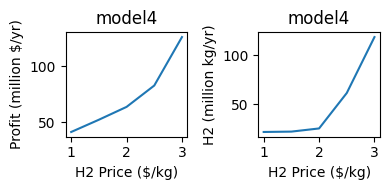

NETL_ERCOT_GEN_0


LMP Range ($/MWh) = (0.126198435, 193.1370069)
LMP Median ($/MWh) = 30.14
LMP number of data = 8760
LMP Mean ($/MWh) = 31.14
LMP Variance = 74.96
LMP Skew = 1.346610362097946
LMP Kurtosis = 27.229042802209477
Bimodality Coefficient = 0.09306493211393743
Natural Gas Price ($/million BTU) = 4.42

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -218.67   -76.8  -96.94 -65.07
Fuel Cost (Million $/yr)       15.92  122.66  141.13    0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0    0.0
Power Capacity Factor (%)       8.82   83.76   85.58    NaN
Hydrogen Capacity Factor (%)     0.0    7.49   11.71   9.92
Power (Million MWh/yr)           0.5    4.77    5.34  -0.62
Hydrogen (Million kg/yr)         0.0   11.82   18.46  15.65
Power only mode (%)             8.82   92.15   85.51    0.0
Hydrogen only mode (%)           0.0    7.85     0.0   24.0
Hydrogen + power mode (%)        0.0     0.0   14.49    0.0
Off mode (%)                   91.18     0.0     0.0   76.0


H2 Price ($/kg) = 1.5


model3 model4  model5  model6
Profit (Million $/yr)        -207.97 -59.89  -55.47  -22.49
Fuel Cost (Million $/yr)      180.19  80.73  142.05     0.0
CO2 Tax (Million $/yr)           0.0    0.0     0.0     0.0
Power Capacity Factor (%)       9.43   1.12   15.69     NaN
Hydrogen Capacity Factor (%)   83.48  49.08   81.86   82.56
Power (Million MWh/yr)          0.54   0.06    0.98    -5.2
Hydrogen (Million kg/yr)      131.63  77.38  129.08  130.19
Power only mode (%)            14.13  50.92   16.44     0.0
Hydrogen only mode (%)           0.0  49.08     0.0   92.96
Hydrogen + power mode (%)      85.87    0.0   83.56     0.0
Off mode (%)                     0.0    0.0     0.0    7.04


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5  model6
Profit (Million $/yr)        -167.04  -76.37 -134.39   -4.89   17.81   51.57
Fuel Cost (Million $/yr)       31.61  123.74  180.47    46.8  142.28     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0     0.0     0.0
Power Capacity Factor (%)      17.52   93.78   -6.24  -64.27   -0.29     NaN
Hydrogen Capacity Factor (%)     NaN     NaN   97.92   81.53   97.87   98.09
Power (Million MWh/yr)           1.0    5.34   -0.36   -3.66   -0.02   -6.19
Hydrogen (Million kg/yr)         0.0     0.0   154.4  128.56  154.33  154.67
Power only mode (%)            17.52   100.0    1.76   18.47    2.04     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   81.53     0.0   100.0
Hydrogen + power mode (%)        0.0     0.0   98.24     0.0   97.96     0.0
Off mode (%)                   82.48     0.0     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 2.5


model3  model4 model5  model6
Profit (Million $/yr)         -56.23   65.05  95.94  129.82
Fuel Cost (Million $/yr)      180.52   33.52  142.3     0.0
CO2 Tax (Million $/yr)           0.0     0.0    0.0     0.0
Power Capacity Factor (%)      -8.08  -89.87  -1.98     NaN
Hydrogen Capacity Factor (%)   99.61   94.24  99.57   99.63
Power (Million MWh/yr)         -0.46   -5.12  -0.12   -6.28
Hydrogen (Million kg/yr)      157.07  148.59  157.0  157.09
Power only mode (%)             0.37    5.76   0.33     0.0
Hydrogen only mode (%)           0.0   94.24    0.0   100.0
Hydrogen + power mode (%)      99.63     0.0  99.67     0.0
Off mode (%)                     0.0     0.0    0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          22.47  141.13  174.63  208.53
Fuel Cost (Million $/yr)      180.52   29.55   142.3     0.0
CO2 Tax (Million $/yr)           0.0     0.0     0.0     0.0
Power Capacity Factor (%)       -8.4   -97.5   -2.31     NaN
Hydrogen Capacity Factor (%)   99.91   98.03    99.9   99.91
Power (Million MWh/yr)         -0.48   -5.55   -0.14    -6.3
Hydrogen (Million kg/yr)      157.54  154.57  157.51  157.54
Power only mode (%)             0.07    1.97    0.07     0.0
Hydrogen only mode (%)           0.0   98.03     0.0   100.0
Hydrogen + power mode (%)      99.93     0.0   99.93     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

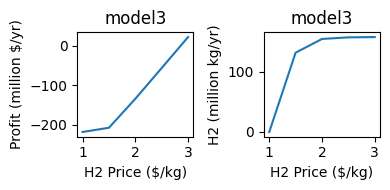

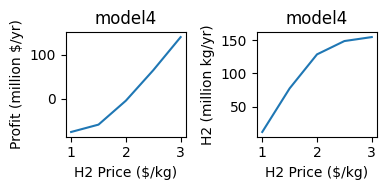

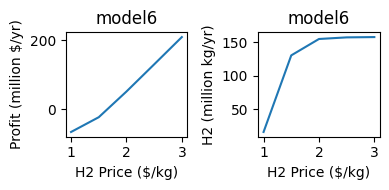

NETL_ERCOT_GEN_25


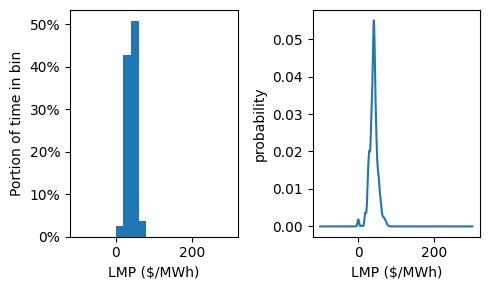

LMP Range ($/MWh) = (0.12631382, 345.5538373)
LMP Median ($/MWh) = 40.67
LMP number of data = 8760
LMP Mean ($/MWh) = 40.70
LMP Variance = 142.09
LMP Skew = 4.103500591752707
LMP Kurtosis = 88.46528928841502
Bimodality Coefficient = 0.19503045139058262
Natural Gas Price ($/million BTU) = 4.42

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -194.15  -26.88  -41.04 -66.75
Fuel Cost (Million $/yr)      125.51  128.15  143.15    0.0
CO2 Tax (Million $/yr)          1.25    0.84    0.94    0.0
Power Capacity Factor (%)      69.03   93.17   94.11    NaN
Hydrogen Capacity Factor (%)    0.08    3.18    4.72   1.56
Power (Million MWh/yr)          3.93    5.31    5.87   -0.1
Hydrogen (Million kg/yr)        0.12    5.02    7.44   2.46
Power only mode (%)            72.37   96.64   94.41    0.0
Hydrogen only mode (%)           0.0    3.36     0.0   2.03
Hydrogen + power mode (%)        0.1     0.0    5.59    0.0
Off mode (%)                   27.52     0.0     0.0  97.97


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -186.77   -20.6  -27.03 -55.66
Fuel Cost (Million $/yr)      177.11  115.66  143.37    0.0
CO2 Tax (Million $/yr)          1.76    0.76    0.94    0.0
Power Capacity Factor (%)       61.2   68.44   64.94    NaN
Hydrogen Capacity Factor (%)   34.09   15.66   33.98  29.95
Power (Million MWh/yr)          3.48     3.9    4.05  -1.88
Hydrogen (Million kg/yr)       53.76    24.7   53.59  47.22
Power only mode (%)            51.94   84.34   62.24    0.0
Hydrogen only mode (%)           0.0   15.66     0.0  48.09
Hydrogen + power mode (%)      48.06     0.0   37.76    0.0
Off mode (%)                     0.0     0.0     0.0  51.91


H2 Price ($/kg) = 2.0


model0  model1  model3 model4  model5  model6
Profit (Million $/yr)        -139.82  -23.67 -132.87  -3.08   23.72   -3.02
Fuel Cost (Million $/yr)      119.83  128.61  180.28  97.74  144.02     0.0
CO2 Tax (Million $/yr)          1.19    0.84    1.79   0.64    0.94     0.0
Power Capacity Factor (%)      66.42   97.44    7.24  33.92   14.15     NaN
Hydrogen Capacity Factor (%)     NaN     NaN    85.5   32.8   84.88   84.96
Power (Million MWh/yr)          3.78    5.55    0.41   1.93    0.88   -5.35
Hydrogen (Million kg/yr)         0.0     0.0  134.82  51.71  133.84  133.96
Power only mode (%)            66.42   100.0   12.95   67.2   14.68     0.0
Hydrogen only mode (%)           0.0     0.0     0.0   32.8     0.0   94.33
Hydrogen + power mode (%)        0.0     0.0   87.05    0.0   85.32     0.0
Off mode (%)                   33.58     0.0     0.0    0.0     0.0    5.67


H2 Price ($/kg) = 2.5


model3  model4  model5  model6
Profit (Million $/yr)         -59.54   35.45   96.74   70.71
Fuel Cost (Million $/yr)      180.48   61.31  144.16     0.0
CO2 Tax (Million $/yr)           1.8     0.4    0.95     0.0
Power Capacity Factor (%)      -5.58   -36.3     1.9     NaN
Hydrogen Capacity Factor (%)   97.32   67.65   97.16   97.64
Power (Million MWh/yr)         -0.32   -2.07    0.12   -6.16
Hydrogen (Million kg/yr)      153.46  106.67   153.2  153.96
Power only mode (%)             2.28   32.35    2.69     0.0
Hydrogen only mode (%)           0.0   67.65     0.0   100.0
Hydrogen + power mode (%)      97.72     0.0   97.31     0.0
Off mode (%)                     0.0     0.0     0.0     0.0


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)          18.38   97.09  174.58  148.67
Fuel Cost (Million $/yr)      180.52   42.47  144.19     0.0
CO2 Tax (Million $/yr)           1.8    0.28    0.95     0.0
Power Capacity Factor (%)      -8.26  -72.62    -0.7     NaN
Hydrogen Capacity Factor (%)   99.79   85.67   99.76   99.76
Power (Million MWh/yr)         -0.47   -4.13   -0.04   -6.29
Hydrogen (Million kg/yr)      157.35  135.09  157.31  157.31
Power only mode (%)             0.15   14.33    0.14     0.0
Hydrogen only mode (%)           0.0   85.67     0.0   100.0
Hydrogen + power mode (%)      99.85     0.0   99.86     0.0
Off mode (%)                     0.0     0.0     0.0     0.0

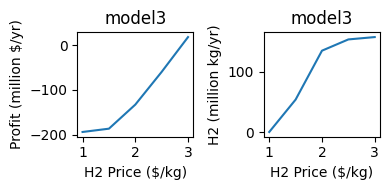

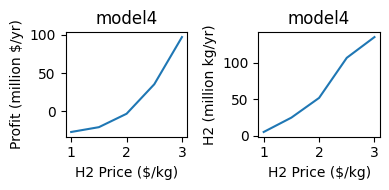

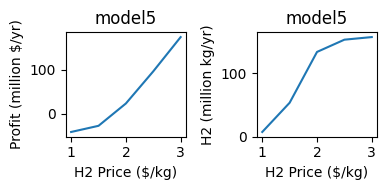

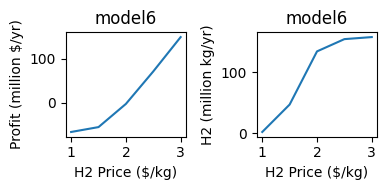

NETL_ERCOT_GEN_50


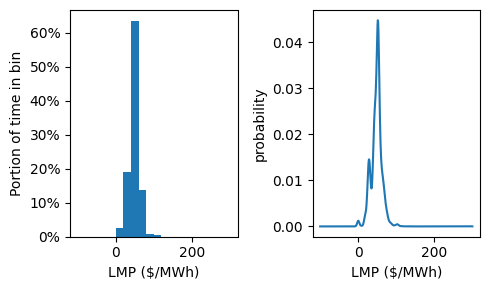

LMP Range ($/MWh) = (0.12631382, 841.2453115)
LMP Median ($/MWh) = 50.32
LMP number of data = 8760
LMP Mean ($/MWh) = 48.45
LMP Variance = 311.52
LMP Skew = 12.843115955594138
LMP Kurtosis = 513.4105367907425
Bimodality Coefficient = 0.32134374756710576
Natural Gas Price ($/million BTU) = 4.42

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)        -152.4   17.07    7.13 -66.82
Fuel Cost (Million $/yr)      157.1  128.83  143.27    0.0
CO2 Tax (Million $/yr)         3.13    1.72    1.91    0.0
Power Capacity Factor (%)     85.58    94.2   94.82    NaN
Hydrogen Capacity Factor (%)   0.37    2.76     4.1   1.43
Power (Million MWh/yr)         4.87    5.36    5.91  -0.09
Hydrogen (Million kg/yr)       0.58    4.35    6.47   2.25
Power only mode (%)            93.6    97.2   94.92    0.0
Hydrogen only mode (%)          0.0     2.8     0.0   2.03
Hydrogen + power mode (%)      0.49     0.0    5.08    0.0
Off mode (%)                   5.91     0.0     0.0  97.97


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -145.13   22.44   17.47 -60.21
Fuel Cost (Million $/yr)      180.36  117.59  143.51    0.0
CO2 Tax (Million $/yr)          3.59    1.57    1.92    0.0
Power Capacity Factor (%)      79.38   72.17   80.51    NaN
Hydrogen Capacity Factor (%)    19.0   13.81   18.51   17.7
Power (Million MWh/yr)          4.52    4.11    5.02  -1.11
Hydrogen (Million kg/yr)       29.96   21.78   29.19  27.91
Power only mode (%)            80.35   86.19   80.47    0.0
Hydrogen only mode (%)           0.0   13.81     0.0  31.42
Hydrogen + power mode (%)      19.65     0.0   19.53    0.0
Off mode (%)                     0.0     0.0     0.0  68.58


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5 model6
Profit (Million $/yr)         -98.81   20.39 -118.65   35.27   42.88 -34.25
Fuel Cost (Million $/yr)      147.34  129.18  180.09  112.96  143.73    0.0
CO2 Tax (Million $/yr)          2.93    1.72    3.59    1.51    1.92    0.0
Power Capacity Factor (%)      81.67   97.86   42.64   63.25   50.24    NaN
Hydrogen Capacity Factor (%)     NaN     NaN   52.87   18.24   48.85  52.76
Power (Million MWh/yr)          4.65    5.57    2.43     3.6    3.13  -3.31
Hydrogen (Million kg/yr)         0.0     0.0   83.37   28.76   77.02   83.2
Power only mode (%)            81.67   100.0    43.2   81.76   48.03    0.0
Hydrogen only mode (%)           0.0     0.0     0.0   18.24     0.0  83.32
Hydrogen + power mode (%)        0.0     0.0    56.8     0.0   51.97    0.0
Off mode (%)                   18.33     0.0     0.0     0.0     0.0  16.68


H2 Price ($/kg) = 2.5


model3 model4  model5  model6
Profit (Million $/yr)         -57.66  53.52  102.76   27.02
Fuel Cost (Million $/yr)      180.38  99.15  144.24     0.0
CO2 Tax (Million $/yr)          3.59   1.32    1.93     0.0
Power Capacity Factor (%)       3.53  36.63   10.87     NaN
Hydrogen Capacity Factor (%)   88.93  31.45    88.3    89.1
Power (Million MWh/yr)           0.2   2.09    0.68   -5.61
Hydrogen (Million kg/yr)      140.23  49.59  139.23  140.49
Power only mode (%)            10.07  68.55   11.14     0.0
Hydrogen only mode (%)           0.0  31.45     0.0   97.09
Hydrogen + power mode (%)      89.93    0.0   88.86     0.0
Off mode (%)                     0.0    0.0     0.0    2.91


H2 Price ($/kg) = 3.0


model3 model4  model5  model6
Profit (Million $/yr)          16.77  85.67  176.87  101.68
Fuel Cost (Million $/yr)      180.49  77.86  144.34     0.0
CO2 Tax (Million $/yr)          3.59   1.04    1.93     0.0
Power Capacity Factor (%)      -6.02   -4.4    1.53     NaN
Hydrogen Capacity Factor (%)   97.73  51.82   97.65   97.87
Power (Million MWh/yr)         -0.34  -0.25     0.1   -6.17
Hydrogen (Million kg/yr)       154.1   81.7  153.98  154.32
Power only mode (%)             1.79  48.18    2.11     0.0
Hydrogen only mode (%)           0.0  51.82     0.0   100.0
Hydrogen + power mode (%)      98.21    0.0   97.89     0.0
Off mode (%)                     0.0    0.0     0.0     0.0

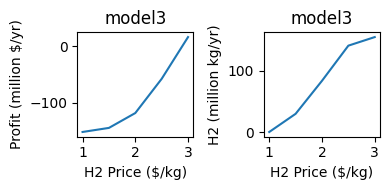

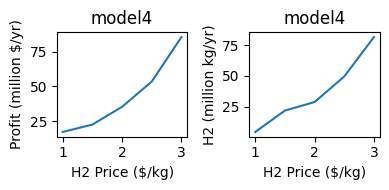

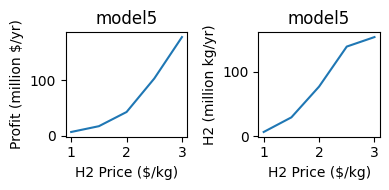

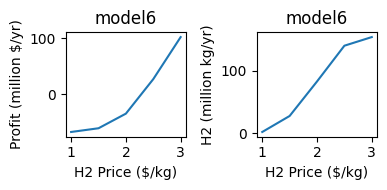

NETL_ERCOT_GEN_100


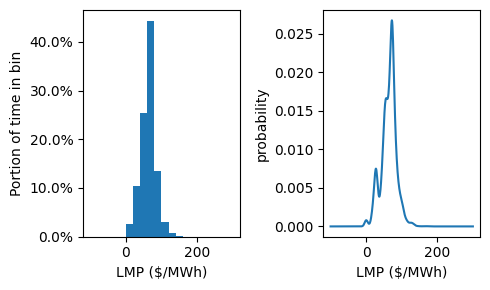

LMP Range ($/MWh) = (0.12631382, 1167.406372)
LMP Median ($/MWh) = 67.53
LMP number of data = 8760
LMP Mean ($/MWh) = 64.34
LMP Variance = 739.92
LMP Skew = 11.421037873825133
LMP Kurtosis = 387.1288915731059
Bimodality Coefficient = 0.336913678218999
Natural Gas Price ($/million BTU) = 4.42

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)          -62.9  107.53  106.21 -66.85
Fuel Cost (Million $/yr)      164.13  128.96  143.34    0.0
CO2 Tax (Million $/yr)          6.57    3.44    3.83    0.0
Power Capacity Factor (%)      89.74   94.28   95.01    NaN
Hydrogen Capacity Factor (%)     0.4    2.77    3.97   1.42
Power (Million MWh/yr)          5.11    5.37    5.93  -0.09
Hydrogen (Million kg/yr)        0.62    4.37    6.25   2.24
Power only mode (%)            95.53   97.23   95.03    0.0
Hydrogen only mode (%)           0.0    2.77     0.0    2.0
Hydrogen + power mode (%)       0.53     0.0    4.97    0.0
Off mode (%)                    3.95     0.0     0.0   98.0


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)        -57.38  112.35   114.0 -63.24
Fuel Cost (Million $/yr)      180.4  120.94  143.49    0.0
CO2 Tax (Million $/yr)         7.22    3.23    3.83    0.0
Power Capacity Factor (%)      86.5   78.63   86.61    NaN
Hydrogen Capacity Factor (%)  12.43   10.61    12.4   8.67
Power (Million MWh/yr)         4.93    4.48     5.4  -0.55
Hydrogen (Million kg/yr)      19.61   16.72   19.56  13.68
Power only mode (%)           87.37   89.39   87.44    0.0
Hydrogen only mode (%)          0.0   10.61     0.0  12.18
Hydrogen + power mode (%)     12.63     0.0   12.56    0.0
Off mode (%)                    0.0     0.0     0.0  87.82


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5 model6
Profit (Million $/yr)         -10.23  110.85  -44.68  121.47  126.42 -50.67
Fuel Cost (Million $/yr)      158.11   129.3  180.33  119.13  143.52    0.0
CO2 Tax (Million $/yr)          6.33    3.45    7.22    3.18    3.83    0.0
Power Capacity Factor (%)      87.64   97.95   76.95   75.14   78.19    NaN
Hydrogen Capacity Factor (%)     NaN     NaN   21.24   12.34   20.85  20.93
Power (Million MWh/yr)          4.99    5.58    4.38    4.28    4.88  -1.31
Hydrogen (Million kg/yr)         0.0     0.0    33.5   19.46   32.87  33.01
Power only mode (%)            87.64   100.0   78.13   87.66   77.63    0.0
Hydrogen only mode (%)           0.0     0.0     0.0   12.34     0.0  33.94
Hydrogen + power mode (%)        0.0     0.0   21.87     0.0   22.37    0.0
Off mode (%)                   12.36     0.0     0.0     0.0     0.0  66.06


H2 Price ($/kg) = 2.5


model3  model4  model5 model6
Profit (Million $/yr)         -18.36   132.0  151.93 -27.02
Fuel Cost (Million $/yr)      180.28  116.41  143.71    0.0
CO2 Tax (Million $/yr)          7.22    3.11    3.84    0.0
Power Capacity Factor (%)      52.54   69.89   56.42    NaN
Hydrogen Capacity Factor (%)   43.75   14.94   42.66  42.54
Power (Million MWh/yr)          2.99    3.98    3.52  -2.67
Hydrogen (Million kg/yr)       68.98   23.56   67.27  67.07
Power only mode (%)            54.24   85.06   54.77    0.0
Hydrogen only mode (%)           0.0   14.94     0.0  62.68
Hydrogen + power mode (%)      45.76     0.0   45.23    0.0
Off mode (%)                     0.0     0.0     0.0  37.32


H2 Price ($/kg) = 3.0


model3  model4  model5  model6
Profit (Million $/yr)           27.3  146.22  196.18   19.29
Fuel Cost (Million $/yr)      180.14  109.92  144.05     0.0
CO2 Tax (Million $/yr)          7.21    2.93    3.85     0.0
Power Capacity Factor (%)      17.45   57.38   23.43     NaN
Hydrogen Capacity Factor (%)    76.1   21.15   75.72   76.31
Power (Million MWh/yr)          0.99    3.27    1.46    -4.8
Hydrogen (Million kg/yr)       120.0   33.35  119.39  120.33
Power only mode (%)            20.11   78.85   21.93     0.0
Hydrogen only mode (%)           0.0   21.15     0.0   90.91
Hydrogen + power mode (%)      79.89     0.0   78.07     0.0
Off mode (%)                     0.0     0.0     0.0    9.09

NETL_ERCOT_GEN_250


LMP Range ($/MWh) = (0.12631382, 1289.150704)
LMP Median ($/MWh) = 125.27
LMP number of data = 8760
LMP Mean ($/MWh) = 111.26
LMP Variance = 3153.22
LMP Skew = 4.5687269080045745
LMP Kurtosis = 90.98583373344377
Bimodality Coefficient = 0.23272684294127668
Natural Gas Price ($/million BTU) = 4.42

H2 Price ($/kg) = 1.0


model3  model4  model5 model6
Profit (Million $/yr)         203.67  374.47  398.71 -66.96
Fuel Cost (Million $/yr)      168.26  129.03  143.34    0.0
CO2 Tax (Million $/yr)         16.79    8.58    9.53    0.0
Power Capacity Factor (%)      90.78   94.44   95.12    NaN
Hydrogen Capacity Factor (%)     1.3     2.7    3.86    1.4
Power (Million MWh/yr)          5.17    5.38    5.93  -0.09
Hydrogen (Million kg/yr)        2.05    4.25    6.09   2.21
Power only mode (%)            97.61   97.29   95.16    0.0
Hydrogen only mode (%)           0.0    2.71     0.0   1.99
Hydrogen + power mode (%)       2.39     0.0    4.84    0.0
Off mode (%)                     0.0     0.0     0.0  98.01


H2 Price ($/kg) = 1.5


model3  model4  model5 model6
Profit (Million $/yr)          209.7  379.14  406.53 -64.14
Fuel Cost (Million $/yr)      180.41  121.05  143.53    0.0
CO2 Tax (Million $/yr)          18.0    8.05    9.55    0.0
Power Capacity Factor (%)      86.55   78.84    86.7    NaN
Hydrogen Capacity Factor (%)   12.39    10.5   12.35   6.47
Power (Million MWh/yr)          4.93    4.49    5.41  -0.41
Hydrogen (Million kg/yr)       19.54   16.56   19.48  10.21
Power only mode (%)            87.48    89.5    87.6    0.0
Hydrogen only mode (%)           0.0    10.5     0.0   7.39
Hydrogen + power mode (%)      12.52     0.0    12.4    0.0
Off mode (%)                     0.0     0.0     0.0  92.61


H2 Price ($/kg) = 2.0


model0  model1  model3  model4  model5 model6
Profit (Million $/yr)         256.86  377.95  221.55  388.34  418.22 -56.13
Fuel Cost (Million $/yr)      158.11  129.37  180.39  119.09  143.58    0.0
CO2 Tax (Million $/yr)         15.78    8.61    18.0    7.92    9.55    0.0
Power Capacity Factor (%)      87.64   98.01   80.74   75.07   81.37    NaN
Hydrogen Capacity Factor (%)     NaN     NaN   17.75   12.37    17.7  13.25
Power (Million MWh/yr)          4.99    5.58     4.6    4.27    5.08  -0.83
Hydrogen (Million kg/yr)         0.0     0.0   27.99   19.51   27.91  20.89
Power only mode (%)            87.64   100.0   81.76   87.63   82.11    0.0
Hydrogen only mode (%)           0.0     0.0     0.0   12.37     0.0  16.51
Hydrogen + power mode (%)        0.0     0.0   18.24     0.0   17.89    0.0
Off mode (%)                   12.36     0.0     0.0     0.0     0.0  83.49


H2 Price ($/kg) = 2.5


model3  model4  model5 model6
Profit (Million $/yr)         238.78  398.69  435.27 -42.24
Fuel Cost (Million $/yr)      180.43  116.87  143.65    0.0
CO2 Tax (Million $/yr)          18.0    7.77    9.55    0.0
Power Capacity Factor (%)      74.45   70.79    75.5    NaN
Hydrogen Capacity Factor (%)   23.55    14.5   23.58  19.94
Power (Million MWh/yr)          4.24    4.03    4.71  -1.25
Hydrogen (Million kg/yr)       37.13   22.86   37.19  31.44
Power only mode (%)            76.38    85.5   76.38    0.0
Hydrogen only mode (%)           0.0    14.5     0.0  27.28
Hydrogen + power mode (%)      23.62     0.0   23.62    0.0
Off mode (%)                     0.0     0.0     0.0  72.72


H2 Price ($/kg) = 3.0


model3  model4  model5 model6
Profit (Million $/yr)         257.53  411.57   454.0 -24.78
Fuel Cost (Million $/yr)      180.43  113.49  143.65    0.0
CO2 Tax (Million $/yr)          18.0    7.55    9.56    0.0
Power Capacity Factor (%)      73.71   64.26   74.87    NaN
Hydrogen Capacity Factor (%)   24.22   17.74   24.21  24.09
Power (Million MWh/yr)           4.2    3.66    4.67  -1.51
Hydrogen (Million kg/yr)        38.2   27.97   38.18  37.99
Power only mode (%)            75.62   82.26   75.66    0.0
Hydrogen only mode (%)           0.0   17.74     0.0  36.63
Hydrogen + power mode (%)      24.38     0.0   24.34    0.0
Off mode (%)                     0.0     0.0     0.0  63.37

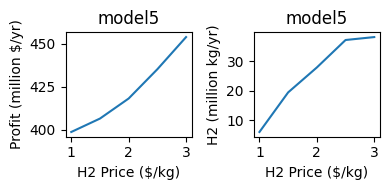

In [3]:
pd.set_option('display.precision', 2)
result_dir = "../market_results_20"
groups = ["historical", "nrel", "princeton", "netl"]
models = ["model0", "model1", "model3", "model4", "model5", "model6"]
hist_min = -100
hist_max = 300

x_vec = np.linspace(hist_min, hist_max, 500)


profit_table = pd.DataFrame(
    columns=models,
)
for data_set in data.metadata:
    if data.metadata[data_set]["group"] not in groups:
        continue
    for model in models:
        result_file = os.path.join(result_dir, f"{data_set}_{model}.csv")
        df = pd.read_csv(result_file)
        n = len(df["profit ($/hr)"])
        profit = (sum(df["profit ($/hr)"]) - sum(df["start_cost"]) - sum(df["stop_cost"]))/n*365*24/1e6
        profit_table.loc[data_set, model] = profit

display(profit_table)
profit_table.to_csv("profit_20.csv")

print("=========================================================================")
print("Model Descriptions")
print("=========================================================================")  
for model in models:
    pcap, hcap = cap_func(model)
    print(f"{model} {model_data[model]['description']}")
    print(f"    Power Capcity (million MWh/yr): {pcap}")
    print(f"    Hydrogen Capcity (million kg/yr): {hcap}")
print("")

for data_set in data.metadata:
    if data.metadata[data_set]["group"] not in groups:
        continue
    print("=========================================================================")
    print(data_set)
    print("=========================================================================")
    plt.figure(figsize=(5,3))
    plt.subplot(1, 2, 1)
    lmp_hist(data.data[data_set], range=(hist_min, hist_max))
    plt.subplot(1, 2, 2)
    gobj = scipy.stats.gaussian_kde(data.data[data_set].dropna())
    plt.plot(x_vec, gobj.pdf(x_vec))
    plt.xlabel("LMP ($/MWh)")
    plt.ylabel("probability")
    plt.tight_layout()
    plt.show()
    
    print(f"LMP Range ($/MWh) = ({min(data.data[data_set])}, {max(data.data[data_set])})")
    print(f"LMP Median ($/MWh) = {data.data[data_set].median():.2f}")
    g = data.data[data_set].skew()
    k = data.data[data_set].kurtosis()
    n = data.data[data_set].count()
    bc = (g**2 + 1)/(k + ((3*(n -1)**2)/((n-2)*(n-3))))
    print(f"LMP number of data = {n}")
    print(f"LMP Mean ($/MWh) = {data.data[data_set].mean():.2f}")
    print(f"LMP Variance = {data.data[data_set].var():.2f}")
    print(f"LMP Skew = {g}")
    print(f"LMP Kurtosis = {k}")
    print(f"Bimodality Coefficient = {bc}")
    print(f"Natural Gas Price ($/million BTU) = {data.metadata[data_set]['ng_price']:.2f}")    
    print()
    
    h_models = ["model3", "model4", "model5", "model6"]
    h_price_vec = [1.0, 1.5, 2.0, 2.5, 3.0]
    profit_vecs = {
        "model3": [], 
        "model4": [],
        "model5": [],
        "model6": [],   
    }
    hprod_vecs = {
        "model3": [], 
        "model4": [],
        "model5": [],
        "model6": [],   
    }
    
    for h2_price in h_price_vec:
        result_dir = f"../market_results_{int(h2_price*10)}"
        if h2_price == 2.0:
            models = ["model0", "model1", "model3", "model4", "model5", "model6"]
        else:
            models = h_models
        print(f"H2 Price ($/kg) = {h2_price}")
        table = pd.DataFrame(
            columns=models, 
            index=[
                "Profit (Million $/yr)",
                "Fuel Cost (Million $/yr)",
                "CO2 Tax (Million $/yr)",
                "Power Capacity Factor (%)",
                "Hydrogen Capacity Factor (%)",
                "Power (Million MWh/yr)",
                "Hydrogen (Million kg/yr)",
                "Power only mode (%)",
                "Hydrogen only mode (%)",
                "Hydrogen + power mode (%)",
                "Off mode (%)",
            ]
        )
        for model in models:
            result_file = os.path.join(result_dir, f"{data_set}_{model}.csv")
            try:
                df = pd.read_csv(result_file)
            except:
                continue
            pcap, hcap = cap_func(model)
            n = len(df["profit ($/hr)"])
            profit = (sum(df["profit ($/hr)"]) - sum(df["start_cost"]) - sum(df["stop_cost"]))/n*365*24/1e6
            if model in ["model0", "model3"]:
                co2_tax = sum(df["ng_cost ($/hr)"])/data.metadata[data_set]['ng_price']*data.metadata[data_set]['ng_price_co2_tax_cap97']/n*365*24/1e6
            else:
                co2_tax = sum(df["ng_cost ($/hr)"])/data.metadata[data_set]['ng_price']*data.metadata[data_set]['ng_price_co2_tax_cap98']/n*365*24/1e6
            fuel_cost = sum(df["ng_cost ($/hr)"])/n*365*24/1e6
            total_power = sum(df["net_power (MW)"])/n*365*24/1e6
            total_h2 = sum(df["h_prod (kg/s)"])/n*365*24/1e6*3600
            pct_time_off = sum(df["mode_off"])/n * 100
            pct_time_power_only = sum(df["mode_power_only"])/n * 100
            pct_time_hydrogen = sum(df["mode_hydrogen"])/n * 100
            pct_time_hydrogen_only = sum(df["mode_hydrogen_only"])/n * 100
            

            table.loc["Profit (Million $/yr)", model] = profit
            table.loc["CO2 Tax (Million $/yr)", model] = co2_tax
            table.loc["Fuel Cost (Million $/yr)", model] = fuel_cost
            if pcap is not None and pcap != 0:
                table.loc["Power Capacity Factor (%)", model] = sum(df["net_power (MW)"])/n*365*24/1e6/pcap*100
            if hcap is not None and hcap != 0:
                table.loc["Hydrogen Capacity Factor (%)", model] = sum(df["h_prod (kg/s)"])/n*365*24/1e6*3600/hcap*100
            table.loc["Power (Million MWh/yr)", model] = total_power
            table.loc["Hydrogen (Million kg/yr)", model] = total_h2
            table.loc["Power only mode (%)", model] = pct_time_power_only
            table.loc["Hydrogen only mode (%)", model] = pct_time_hydrogen_only
            table.loc["Hydrogen + power mode (%)", model] = pct_time_hydrogen
            table.loc["Off mode (%)", model] = pct_time_off
            if model in h_models:
                profit_vecs[model].append(profit)
                hprod_vecs[model].append(total_h2)
        display(table)
        print("")
    for model in h_models:
        plt.figure(figsize=(4, 2))
        plt.subplot(1, 2, 1)
        plt.plot(h_price_vec, profit_vecs[model])
        plt.title(model)
        plt.xlabel("H2 Price ($/kg)")
        plt.ylabel("Profit (million $/yr)")
        plt.subplot(1, 2, 2)
        plt.plot(h_price_vec, hprod_vecs[model])
        plt.title(model)
        plt.xlabel("H2 Price ($/kg)")
        plt.ylabel("H2 (million kg/yr)")
        plt.tight_layout()
        plt.show()
            